In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

In [2]:
files = []
categories = []

for directory_path in glob.glob('C:/Users/Natalie/Desktop/Project/Alzheimer_s Dataset_1/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename          Category
0     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
1     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
2     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
3     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
4     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
...                                                 ...               ...
5116  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5117  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5118  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5119  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5120  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

NonDemented         2560
VeryMildDemented    1792
MildDemented         717
ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG16(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|          | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/5121 [00:01<2:00:03,  1.41s/it]

1/1 [==============================] - 0s 83ms/step


  0%|          | 2/5121 [00:01<59:02,  1.44it/s]  

1/1 [==============================] - 0s 83ms/step


  0%|          | 3/5121 [00:01<39:31,  2.16it/s]

1/1 [==============================] - 0s 77ms/step


  0%|          | 4/5121 [00:01<30:43,  2.78it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 5/5121 [00:02<25:04,  3.40it/s]

1/1 [==============================] - 0s 68ms/step


  0%|          | 6/5121 [00:02<22:07,  3.85it/s]

1/1 [==============================] - 0s 66ms/step


  0%|          | 7/5121 [00:02<19:46,  4.31it/s]

1/1 [==============================] - 0s 83ms/step


  0%|          | 8/5121 [00:02<18:52,  4.52it/s]

1/1 [==============================] - 0s 96ms/step


  0%|          | 9/5121 [00:02<19:18,  4.41it/s]

1/1 [==============================] - 0s 84ms/step


  0%|          | 10/5121 [00:03<19:18,  4.41it/s]

1/1 [==============================] - 0s 81ms/step


  0%|          | 11/5121 [00:03<20:29,  4.15it/s]

1/1 [==============================] - 0s 76ms/step


  0%|          | 12/5121 [00:03<20:13,  4.21it/s]

1/1 [==============================] - 0s 73ms/step


  0%|          | 13/5121 [00:03<18:48,  4.53it/s]

1/1 [==============================] - 0s 73ms/step


  0%|          | 14/5121 [00:04<18:01,  4.72it/s]

1/1 [==============================] - 0s 89ms/step


  0%|          | 15/5121 [00:04<18:28,  4.61it/s]

1/1 [==============================] - 0s 71ms/step


  0%|          | 16/5121 [00:04<18:02,  4.72it/s]

1/1 [==============================] - 0s 66ms/step


  0%|          | 17/5121 [00:04<17:19,  4.91it/s]

1/1 [==============================] - 0s 73ms/step


  0%|          | 18/5121 [00:04<16:56,  5.02it/s]

1/1 [==============================] - 0s 81ms/step


  0%|          | 19/5121 [00:05<16:22,  5.19it/s]

1/1 [==============================] - 0s 76ms/step


  0%|          | 20/5121 [00:05<16:08,  5.26it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 21/5121 [00:05<15:59,  5.32it/s]

1/1 [==============================] - 0s 80ms/step


  0%|          | 22/5121 [00:05<16:05,  5.28it/s]

1/1 [==============================] - 0s 84ms/step


  0%|          | 23/5121 [00:05<15:45,  5.39it/s]

1/1 [==============================] - 0s 73ms/step


  0%|          | 24/5121 [00:05<15:51,  5.36it/s]

1/1 [==============================] - 0s 88ms/step


  0%|          | 25/5121 [00:06<16:14,  5.23it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 26/5121 [00:06<16:37,  5.11it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 27/5121 [00:06<16:55,  5.02it/s]

1/1 [==============================] - 0s 80ms/step


  1%|          | 28/5121 [00:06<17:15,  4.92it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 29/5121 [00:07<17:07,  4.96it/s]

1/1 [==============================] - 0s 82ms/step


  1%|          | 30/5121 [00:07<17:39,  4.80it/s]

1/1 [==============================] - 0s 82ms/step


  1%|          | 31/5121 [00:07<17:52,  4.75it/s]

1/1 [==============================] - 0s 82ms/step


  1%|          | 32/5121 [00:07<18:02,  4.70it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 33/5121 [00:07<18:18,  4.63it/s]

1/1 [==============================] - 0s 84ms/step


  1%|          | 34/5121 [00:08<17:49,  4.76it/s]

1/1 [==============================] - 0s 80ms/step


  1%|          | 35/5121 [00:08<17:45,  4.77it/s]

1/1 [==============================] - 0s 76ms/step


  1%|          | 36/5121 [00:08<17:19,  4.89it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 37/5121 [00:08<17:05,  4.96it/s]

1/1 [==============================] - 0s 83ms/step


  1%|          | 38/5121 [00:08<17:16,  4.90it/s]

1/1 [==============================] - 0s 84ms/step


  1%|          | 39/5121 [00:09<17:24,  4.87it/s]

1/1 [==============================] - 0s 69ms/step


  1%|          | 40/5121 [00:09<17:19,  4.89it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 41/5121 [00:09<17:08,  4.94it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 42/5121 [00:09<17:36,  4.81it/s]

1/1 [==============================] - 0s 77ms/step


  1%|          | 43/5121 [00:09<16:56,  4.99it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 44/5121 [00:10<16:55,  5.00it/s]

1/1 [==============================] - 0s 80ms/step


  1%|          | 45/5121 [00:10<16:50,  5.02it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 46/5121 [00:10<16:30,  5.12it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 47/5121 [00:10<16:48,  5.03it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 48/5121 [00:10<16:49,  5.03it/s]

1/1 [==============================] - 0s 71ms/step


  1%|          | 49/5121 [00:11<15:57,  5.30it/s]

1/1 [==============================] - 0s 64ms/step


  1%|          | 50/5121 [00:11<15:54,  5.31it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 51/5121 [00:11<16:57,  4.98it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 52/5121 [00:11<17:01,  4.96it/s]

1/1 [==============================] - 0s 85ms/step


  1%|          | 53/5121 [00:11<17:10,  4.92it/s]

1/1 [==============================] - 0s 64ms/step


  1%|          | 54/5121 [00:12<17:03,  4.95it/s]

1/1 [==============================] - 0s 82ms/step


  1%|          | 55/5121 [00:12<17:10,  4.92it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 56/5121 [00:12<16:42,  5.05it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 57/5121 [00:12<15:15,  5.53it/s]

1/1 [==============================] - 0s 76ms/step


  1%|          | 58/5121 [00:12<15:32,  5.43it/s]

1/1 [==============================] - 0s 90ms/step


  1%|          | 59/5121 [00:12<15:40,  5.38it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 60/5121 [00:13<16:40,  5.06it/s]

1/1 [==============================] - 0s 80ms/step


  1%|          | 61/5121 [00:13<16:23,  5.14it/s]

1/1 [==============================] - 0s 65ms/step


  1%|          | 62/5121 [00:13<16:27,  5.13it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 63/5121 [00:13<16:03,  5.25it/s]

1/1 [==============================] - 0s 74ms/step


  1%|          | 64/5121 [00:13<15:19,  5.50it/s]

1/1 [==============================] - 0s 73ms/step


  1%|▏         | 65/5121 [00:14<14:39,  5.75it/s]

1/1 [==============================] - 0s 73ms/step


  1%|▏         | 66/5121 [00:14<14:19,  5.88it/s]

1/1 [==============================] - 0s 72ms/step


  1%|▏         | 67/5121 [00:14<14:28,  5.82it/s]

1/1 [==============================] - 0s 76ms/step


  1%|▏         | 68/5121 [00:14<14:47,  5.69it/s]

1/1 [==============================] - 0s 73ms/step


  1%|▏         | 69/5121 [00:14<15:08,  5.56it/s]

1/1 [==============================] - 0s 91ms/step


  1%|▏         | 70/5121 [00:14<15:14,  5.53it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▏         | 71/5121 [00:15<15:42,  5.36it/s]

1/1 [==============================] - 0s 90ms/step


  1%|▏         | 72/5121 [00:15<15:34,  5.40it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 73/5121 [00:15<15:22,  5.47it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▏         | 74/5121 [00:15<15:35,  5.39it/s]

1/1 [==============================] - 0s 84ms/step


  1%|▏         | 75/5121 [00:15<15:57,  5.27it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▏         | 76/5121 [00:16<16:00,  5.25it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▏         | 77/5121 [00:16<15:49,  5.31it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 78/5121 [00:16<16:21,  5.14it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 79/5121 [00:16<16:05,  5.22it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 80/5121 [00:16<16:42,  5.03it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 81/5121 [00:17<16:16,  5.16it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 82/5121 [00:17<16:24,  5.12it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 83/5121 [00:17<16:18,  5.15it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 84/5121 [00:17<15:26,  5.44it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▏         | 85/5121 [00:17<15:06,  5.56it/s]

1/1 [==============================] - 0s 76ms/step


  2%|▏         | 86/5121 [00:18<14:42,  5.71it/s]

1/1 [==============================] - 0s 84ms/step


  2%|▏         | 87/5121 [00:18<15:56,  5.26it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 88/5121 [00:18<15:59,  5.25it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 89/5121 [00:18<16:35,  5.05it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 90/5121 [00:18<16:28,  5.09it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 91/5121 [00:19<16:09,  5.19it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 92/5121 [00:19<15:41,  5.34it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▏         | 93/5121 [00:19<16:21,  5.12it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 94/5121 [00:19<16:16,  5.15it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 95/5121 [00:19<16:15,  5.15it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 96/5121 [00:19<16:20,  5.12it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 97/5121 [00:20<16:29,  5.08it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▏         | 98/5121 [00:20<15:42,  5.33it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 99/5121 [00:20<15:28,  5.41it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 100/5121 [00:20<15:08,  5.53it/s]

1/1 [==============================] - 0s 77ms/step


  2%|▏         | 101/5121 [00:20<15:09,  5.52it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▏         | 102/5121 [00:21<15:27,  5.41it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 103/5121 [00:21<15:28,  5.40it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 104/5121 [00:21<15:34,  5.37it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▏         | 105/5121 [00:21<16:07,  5.18it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 106/5121 [00:21<15:36,  5.36it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 107/5121 [00:22<15:50,  5.28it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 108/5121 [00:22<15:48,  5.28it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▏         | 109/5121 [00:22<15:42,  5.32it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 110/5121 [00:22<15:55,  5.24it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 111/5121 [00:22<16:16,  5.13it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 112/5121 [00:22<16:00,  5.21it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▏         | 113/5121 [00:23<16:33,  5.04it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 114/5121 [00:23<16:37,  5.02it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 115/5121 [00:23<16:48,  4.96it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 116/5121 [00:23<16:37,  5.02it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 117/5121 [00:23<16:14,  5.14it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▏         | 118/5121 [00:24<15:52,  5.25it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 119/5121 [00:24<15:59,  5.21it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▏         | 120/5121 [00:24<15:54,  5.24it/s]

1/1 [==============================] - 0s 84ms/step


  2%|▏         | 121/5121 [00:24<16:08,  5.16it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 122/5121 [00:24<15:53,  5.24it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▏         | 123/5121 [00:25<16:31,  5.04it/s]

1/1 [==============================] - 0s 102ms/step


  2%|▏         | 124/5121 [00:25<16:39,  5.00it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 125/5121 [00:25<16:43,  4.98it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 126/5121 [00:25<16:35,  5.02it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 127/5121 [00:25<16:52,  4.93it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 128/5121 [00:26<16:15,  5.12it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 129/5121 [00:26<16:37,  5.00it/s]

1/1 [==============================] - 0s 83ms/step


  3%|▎         | 130/5121 [00:26<16:59,  4.90it/s]

1/1 [==============================] - 0s 80ms/step


  3%|▎         | 131/5121 [00:26<16:44,  4.97it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 132/5121 [00:26<17:13,  4.83it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 133/5121 [00:27<16:49,  4.94it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 134/5121 [00:27<16:48,  4.95it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 135/5121 [00:27<16:07,  5.16it/s]

1/1 [==============================] - 0s 59ms/step


  3%|▎         | 136/5121 [00:27<15:15,  5.45it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 137/5121 [00:27<14:51,  5.59it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 138/5121 [00:28<14:29,  5.73it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 139/5121 [00:28<14:07,  5.88it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 140/5121 [00:28<14:39,  5.66it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 141/5121 [00:28<15:02,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 142/5121 [00:28<15:30,  5.35it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 143/5121 [00:28<15:33,  5.33it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 144/5121 [00:29<16:01,  5.17it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 145/5121 [00:29<15:50,  5.23it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 146/5121 [00:29<16:28,  5.03it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 147/5121 [00:29<16:37,  4.99it/s]

1/1 [==============================] - 0s 115ms/step


  3%|▎         | 148/5121 [00:30<17:17,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 149/5121 [00:30<18:57,  4.37it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 150/5121 [00:30<18:16,  4.53it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 151/5121 [00:30<17:34,  4.71it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 152/5121 [00:30<17:13,  4.81it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 153/5121 [00:31<16:48,  4.93it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 154/5121 [00:31<16:44,  4.95it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 155/5121 [00:31<16:53,  4.90it/s]

1/1 [==============================] - 0s 80ms/step


  3%|▎         | 156/5121 [00:31<16:38,  4.97it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 157/5121 [00:31<16:57,  4.88it/s]

1/1 [==============================] - 0s 80ms/step


  3%|▎         | 158/5121 [00:32<16:39,  4.96it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 159/5121 [00:32<16:58,  4.87it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 160/5121 [00:32<16:41,  4.96it/s]

1/1 [==============================] - 0s 82ms/step


  3%|▎         | 161/5121 [00:32<16:38,  4.97it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 162/5121 [00:32<16:51,  4.90it/s]

1/1 [==============================] - 0s 74ms/step


  3%|▎         | 163/5121 [00:33<16:14,  5.09it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 164/5121 [00:33<16:20,  5.06it/s]

1/1 [==============================] - 0s 80ms/step


  3%|▎         | 165/5121 [00:33<16:02,  5.15it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 166/5121 [00:33<15:57,  5.18it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 167/5121 [00:33<16:18,  5.06it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 168/5121 [00:34<16:34,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 169/5121 [00:34<17:21,  4.75it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 170/5121 [00:34<17:28,  4.72it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 171/5121 [00:34<17:00,  4.85it/s]

1/1 [==============================] - 0s 59ms/step


  3%|▎         | 172/5121 [00:34<16:26,  5.01it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 173/5121 [00:35<15:40,  5.26it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 174/5121 [00:35<15:33,  5.30it/s]

1/1 [==============================] - 0s 57ms/step


  3%|▎         | 175/5121 [00:35<15:04,  5.47it/s]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 176/5121 [00:35<15:02,  5.48it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 177/5121 [00:35<15:58,  5.16it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 178/5121 [00:36<16:04,  5.13it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 179/5121 [00:36<16:01,  5.14it/s]

1/1 [==============================] - 0s 83ms/step


  4%|▎         | 180/5121 [00:36<15:45,  5.22it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▎         | 181/5121 [00:36<15:58,  5.15it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▎         | 182/5121 [00:36<15:15,  5.39it/s]

1/1 [==============================] - 0s 77ms/step


  4%|▎         | 183/5121 [00:36<14:38,  5.62it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▎         | 184/5121 [00:37<14:09,  5.81it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▎         | 185/5121 [00:37<13:22,  6.15it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▎         | 186/5121 [00:37<14:04,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 187/5121 [00:37<14:12,  5.79it/s]

1/1 [==============================] - 0s 82ms/step


  4%|▎         | 188/5121 [00:37<13:48,  5.96it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▎         | 189/5121 [00:37<13:47,  5.96it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 190/5121 [00:38<13:15,  6.20it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▎         | 191/5121 [00:38<13:28,  6.09it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▎         | 192/5121 [00:38<14:08,  5.81it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 193/5121 [00:38<14:49,  5.54it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 194/5121 [00:38<15:17,  5.37it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 195/5121 [00:39<15:47,  5.20it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 196/5121 [00:39<15:25,  5.32it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 197/5121 [00:39<15:54,  5.16it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 198/5121 [00:39<16:15,  5.05it/s]

1/1 [==============================] - 0s 96ms/step


  4%|▍         | 199/5121 [00:39<16:19,  5.03it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 200/5121 [00:40<16:08,  5.08it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 201/5121 [00:40<16:08,  5.08it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 202/5121 [00:40<16:04,  5.10it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▍         | 203/5121 [00:40<16:15,  5.04it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 204/5121 [00:40<16:21,  5.01it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▍         | 205/5121 [00:41<16:08,  5.08it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 206/5121 [00:41<15:40,  5.23it/s]

1/1 [==============================] - 0s 96ms/step


  4%|▍         | 207/5121 [00:41<15:33,  5.26it/s]

1/1 [==============================] - 0s 80ms/step


  4%|▍         | 208/5121 [00:41<15:42,  5.21it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▍         | 209/5121 [00:41<15:50,  5.17it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▍         | 210/5121 [00:41<15:31,  5.27it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 211/5121 [00:42<14:40,  5.58it/s]

1/1 [==============================] - 0s 83ms/step


  4%|▍         | 212/5121 [00:42<14:33,  5.62it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 213/5121 [00:42<15:06,  5.41it/s]

1/1 [==============================] - 0s 77ms/step


  4%|▍         | 214/5121 [00:42<15:46,  5.18it/s]

1/1 [==============================] - 0s 83ms/step


  4%|▍         | 215/5121 [00:42<16:11,  5.05it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 216/5121 [00:43<15:54,  5.14it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 217/5121 [00:43<15:47,  5.18it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 218/5121 [00:43<15:33,  5.25it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 219/5121 [00:43<15:47,  5.17it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 220/5121 [00:43<15:47,  5.17it/s]

1/1 [==============================] - 0s 80ms/step


  4%|▍         | 221/5121 [00:44<15:36,  5.23it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 222/5121 [00:44<15:56,  5.12it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 223/5121 [00:44<16:02,  5.09it/s]

1/1 [==============================] - 0s 67ms/step


  4%|▍         | 224/5121 [00:44<15:56,  5.12it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 225/5121 [00:44<16:02,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▍         | 226/5121 [00:45<15:39,  5.21it/s]

1/1 [==============================] - 0s 84ms/step


  4%|▍         | 227/5121 [00:45<15:44,  5.18it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 228/5121 [00:45<15:52,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


  4%|▍         | 229/5121 [00:45<16:29,  4.94it/s]

1/1 [==============================] - 0s 83ms/step


  4%|▍         | 230/5121 [00:45<16:19,  4.99it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 231/5121 [00:46<16:31,  4.93it/s]

1/1 [==============================] - 0s 80ms/step


  5%|▍         | 232/5121 [00:46<16:27,  4.95it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▍         | 233/5121 [00:46<16:01,  5.08it/s]

1/1 [==============================] - 0s 96ms/step


  5%|▍         | 234/5121 [00:46<15:55,  5.12it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▍         | 235/5121 [00:46<16:03,  5.07it/s]

1/1 [==============================] - 0s 83ms/step


  5%|▍         | 236/5121 [00:46<15:51,  5.14it/s]

1/1 [==============================] - 0s 58ms/step


  5%|▍         | 237/5121 [00:47<16:09,  5.04it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▍         | 238/5121 [00:47<15:53,  5.12it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▍         | 239/5121 [00:47<15:55,  5.11it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▍         | 240/5121 [00:47<15:44,  5.17it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 241/5121 [00:47<15:54,  5.11it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▍         | 242/5121 [00:48<15:49,  5.14it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▍         | 243/5121 [00:48<15:59,  5.09it/s]

1/1 [==============================] - 0s 84ms/step


  5%|▍         | 244/5121 [00:48<15:52,  5.12it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 245/5121 [00:48<15:54,  5.11it/s]

1/1 [==============================] - 0s 58ms/step


  5%|▍         | 246/5121 [00:48<15:51,  5.12it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▍         | 247/5121 [00:49<16:17,  4.99it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 248/5121 [00:49<15:56,  5.09it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▍         | 249/5121 [00:49<16:15,  4.99it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▍         | 250/5121 [00:49<15:43,  5.16it/s]

1/1 [==============================] - 0s 58ms/step


  5%|▍         | 251/5121 [00:49<15:59,  5.08it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▍         | 252/5121 [00:50<16:05,  5.04it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▍         | 253/5121 [00:50<16:46,  4.84it/s]

1/1 [==============================] - 0s 77ms/step


  5%|▍         | 254/5121 [00:50<16:37,  4.88it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▍         | 255/5121 [00:50<16:44,  4.84it/s]

1/1 [==============================] - 0s 78ms/step


  5%|▍         | 256/5121 [00:50<15:54,  5.10it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▌         | 257/5121 [00:51<15:03,  5.38it/s]

1/1 [==============================] - 0s 78ms/step


  5%|▌         | 258/5121 [00:51<15:16,  5.31it/s]

1/1 [==============================] - 0s 75ms/step


  5%|▌         | 259/5121 [00:51<15:32,  5.22it/s]

1/1 [==============================] - 0s 80ms/step


  5%|▌         | 260/5121 [00:51<15:10,  5.34it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▌         | 261/5121 [00:51<15:13,  5.32it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▌         | 262/5121 [00:52<14:13,  5.69it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▌         | 263/5121 [00:52<14:29,  5.59it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 264/5121 [00:52<14:26,  5.60it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 265/5121 [00:52<14:23,  5.62it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▌         | 266/5121 [00:52<14:39,  5.52it/s]

1/1 [==============================] - 0s 75ms/step


  5%|▌         | 267/5121 [00:52<15:06,  5.36it/s]

1/1 [==============================] - 0s 84ms/step


  5%|▌         | 268/5121 [00:53<15:37,  5.18it/s]

1/1 [==============================] - 0s 108ms/step


  5%|▌         | 269/5121 [00:53<15:46,  5.12it/s]

1/1 [==============================] - 0s 80ms/step


  5%|▌         | 270/5121 [00:53<15:47,  5.12it/s]

1/1 [==============================] - 0s 75ms/step


  5%|▌         | 271/5121 [00:53<16:00,  5.05it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▌         | 272/5121 [00:53<15:28,  5.22it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▌         | 273/5121 [00:54<15:18,  5.28it/s]

1/1 [==============================] - 0s 83ms/step


  5%|▌         | 274/5121 [00:54<15:05,  5.35it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▌         | 275/5121 [00:54<14:59,  5.39it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 276/5121 [00:54<15:10,  5.32it/s]

1/1 [==============================] - 0s 84ms/step


  5%|▌         | 277/5121 [00:54<15:17,  5.28it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▌         | 278/5121 [00:55<15:41,  5.14it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▌         | 279/5121 [00:55<15:45,  5.12it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▌         | 280/5121 [00:55<15:56,  5.06it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▌         | 281/5121 [00:55<16:00,  5.04it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 282/5121 [00:55<15:11,  5.31it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 283/5121 [00:56<14:29,  5.56it/s]

1/1 [==============================] - 0s 108ms/step


  6%|▌         | 284/5121 [00:56<15:46,  5.11it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 285/5121 [00:56<15:53,  5.07it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 286/5121 [00:56<15:29,  5.20it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 287/5121 [00:56<15:31,  5.19it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▌         | 288/5121 [00:57<15:30,  5.20it/s]

1/1 [==============================] - 0s 59ms/step


  6%|▌         | 289/5121 [00:57<15:16,  5.27it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 290/5121 [00:57<15:08,  5.32it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 291/5121 [00:57<15:14,  5.28it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 292/5121 [00:57<15:06,  5.33it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 293/5121 [00:57<14:57,  5.38it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▌         | 294/5121 [00:58<15:29,  5.19it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 295/5121 [00:58<16:04,  5.01it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 296/5121 [00:58<16:27,  4.89it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 297/5121 [00:58<16:13,  4.96it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 298/5121 [00:58<16:57,  4.74it/s]

1/1 [==============================] - 0s 82ms/step


  6%|▌         | 299/5121 [00:59<16:50,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 300/5121 [00:59<16:28,  4.87it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 301/5121 [00:59<16:35,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 302/5121 [00:59<16:08,  4.98it/s]

1/1 [==============================] - 0s 75ms/step


  6%|▌         | 303/5121 [01:00<16:29,  4.87it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 304/5121 [01:00<15:53,  5.05it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 305/5121 [01:00<15:10,  5.29it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 306/5121 [01:00<15:15,  5.26it/s]

1/1 [==============================] - 0s 80ms/step


  6%|▌         | 307/5121 [01:00<15:23,  5.21it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 308/5121 [01:00<15:36,  5.14it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▌         | 309/5121 [01:01<15:37,  5.13it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▌         | 310/5121 [01:01<16:00,  5.01it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 311/5121 [01:01<15:37,  5.13it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 312/5121 [01:01<16:08,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 313/5121 [01:01<16:24,  4.88it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 314/5121 [01:02<16:29,  4.86it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 315/5121 [01:02<16:10,  4.95it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 316/5121 [01:02<16:13,  4.93it/s]

1/1 [==============================] - 0s 80ms/step


  6%|▌         | 317/5121 [01:02<16:15,  4.92it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 318/5121 [01:02<16:03,  4.99it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 319/5121 [01:03<16:05,  4.97it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 320/5121 [01:03<15:42,  5.09it/s]

1/1 [==============================] - 0s 80ms/step


  6%|▋         | 321/5121 [01:03<16:38,  4.81it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▋         | 322/5121 [01:03<15:51,  5.04it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▋         | 323/5121 [01:03<15:54,  5.02it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▋         | 324/5121 [01:04<16:13,  4.93it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▋         | 325/5121 [01:04<15:49,  5.05it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▋         | 326/5121 [01:04<15:55,  5.02it/s]

1/1 [==============================] - 0s 77ms/step


  6%|▋         | 327/5121 [01:04<15:57,  5.00it/s]

1/1 [==============================] - 0s 77ms/step


  6%|▋         | 328/5121 [01:04<16:02,  4.98it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▋         | 329/5121 [01:05<16:01,  4.98it/s]

1/1 [==============================] - 0s 84ms/step


  6%|▋         | 330/5121 [01:05<16:13,  4.92it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▋         | 331/5121 [01:05<16:01,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▋         | 332/5121 [01:05<15:20,  5.21it/s]

1/1 [==============================] - 0s 84ms/step


  7%|▋         | 333/5121 [01:05<15:20,  5.20it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 334/5121 [01:06<15:29,  5.15it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 335/5121 [01:06<15:15,  5.23it/s]

1/1 [==============================] - 0s 82ms/step


  7%|▋         | 336/5121 [01:06<15:12,  5.24it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 337/5121 [01:06<15:12,  5.24it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 338/5121 [01:06<14:52,  5.36it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 339/5121 [01:07<14:52,  5.36it/s]

1/1 [==============================] - 0s 73ms/step


  7%|▋         | 340/5121 [01:07<14:39,  5.43it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 341/5121 [01:07<14:28,  5.50it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 342/5121 [01:07<14:43,  5.41it/s]

1/1 [==============================] - 0s 82ms/step


  7%|▋         | 343/5121 [01:07<14:31,  5.48it/s]

1/1 [==============================] - 0s 76ms/step


  7%|▋         | 344/5121 [01:07<14:06,  5.65it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 345/5121 [01:08<14:15,  5.58it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 346/5121 [01:08<14:23,  5.53it/s]

1/1 [==============================] - 0s 116ms/step


  7%|▋         | 347/5121 [01:08<14:51,  5.36it/s]

1/1 [==============================] - 0s 93ms/step


  7%|▋         | 348/5121 [01:08<15:33,  5.11it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 349/5121 [01:08<15:44,  5.05it/s]

1/1 [==============================] - 0s 77ms/step


  7%|▋         | 350/5121 [01:09<15:44,  5.05it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 351/5121 [01:09<15:42,  5.06it/s]

1/1 [==============================] - 0s 73ms/step


  7%|▋         | 352/5121 [01:09<15:25,  5.15it/s]

1/1 [==============================] - 0s 81ms/step


  7%|▋         | 353/5121 [01:09<15:27,  5.14it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 354/5121 [01:09<15:23,  5.16it/s]

1/1 [==============================] - 0s 65ms/step


  7%|▋         | 355/5121 [01:10<15:11,  5.23it/s]

1/1 [==============================] - 0s 67ms/step


  7%|▋         | 356/5121 [01:10<14:36,  5.44it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 357/5121 [01:10<15:08,  5.24it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 358/5121 [01:10<15:34,  5.10it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 359/5121 [01:10<15:31,  5.11it/s]

1/1 [==============================] - 0s 66ms/step


  7%|▋         | 360/5121 [01:11<15:22,  5.16it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 361/5121 [01:11<15:23,  5.16it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 362/5121 [01:11<15:04,  5.26it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 363/5121 [01:11<14:56,  5.31it/s]

1/1 [==============================] - 0s 84ms/step


  7%|▋         | 364/5121 [01:11<14:34,  5.44it/s]

1/1 [==============================] - 0s 65ms/step


  7%|▋         | 365/5121 [01:11<14:07,  5.61it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 366/5121 [01:12<14:16,  5.55it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 367/5121 [01:12<14:10,  5.59it/s]

1/1 [==============================] - 0s 61ms/step


  7%|▋         | 368/5121 [01:12<14:19,  5.53it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 369/5121 [01:12<14:09,  5.59it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 370/5121 [01:12<14:28,  5.47it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 371/5121 [01:13<14:52,  5.32it/s]

1/1 [==============================] - 0s 77ms/step


  7%|▋         | 372/5121 [01:13<14:31,  5.45it/s]

1/1 [==============================] - 0s 79ms/step


  7%|▋         | 373/5121 [01:13<14:11,  5.57it/s]

1/1 [==============================] - 0s 90ms/step


  7%|▋         | 374/5121 [01:13<14:10,  5.58it/s]

1/1 [==============================] - 0s 76ms/step


  7%|▋         | 375/5121 [01:13<14:57,  5.29it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 376/5121 [01:13<14:45,  5.36it/s]

1/1 [==============================] - 0s 81ms/step


  7%|▋         | 377/5121 [01:14<15:20,  5.15it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 378/5121 [01:14<15:35,  5.07it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 379/5121 [01:14<15:54,  4.97it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 380/5121 [01:14<16:06,  4.91it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 381/5121 [01:15<18:07,  4.36it/s]

1/1 [==============================] - 0s 84ms/step


  7%|▋         | 382/5121 [01:15<17:27,  4.53it/s]

1/1 [==============================] - 0s 85ms/step


  7%|▋         | 383/5121 [01:15<16:18,  4.84it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 384/5121 [01:15<15:58,  4.94it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 385/5121 [01:15<15:42,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 386/5121 [01:16<15:14,  5.18it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 387/5121 [01:16<14:49,  5.32it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 388/5121 [01:16<14:11,  5.56it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 389/5121 [01:16<14:07,  5.58it/s]

1/1 [==============================] - 0s 84ms/step


  8%|▊         | 390/5121 [01:16<14:21,  5.49it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 391/5121 [01:16<14:56,  5.28it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 392/5121 [01:17<14:46,  5.34it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 393/5121 [01:17<15:07,  5.21it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 394/5121 [01:17<14:46,  5.33it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 395/5121 [01:17<13:50,  5.69it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 396/5121 [01:17<13:12,  5.96it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 397/5121 [01:18<13:34,  5.80it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 398/5121 [01:18<13:56,  5.65it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 399/5121 [01:18<14:12,  5.54it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 400/5121 [01:18<13:58,  5.63it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 401/5121 [01:18<13:57,  5.63it/s]

1/1 [==============================] - 0s 82ms/step


  8%|▊         | 402/5121 [01:18<15:17,  5.14it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 403/5121 [01:19<14:50,  5.30it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 404/5121 [01:19<14:29,  5.42it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 405/5121 [01:19<14:52,  5.28it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 406/5121 [01:19<14:53,  5.28it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 407/5121 [01:19<15:13,  5.16it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 408/5121 [01:20<15:33,  5.05it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 409/5121 [01:20<15:30,  5.06it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 410/5121 [01:20<15:36,  5.03it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 411/5121 [01:20<16:12,  4.84it/s]

1/1 [==============================] - 0s 81ms/step


  8%|▊         | 412/5121 [01:20<15:52,  4.94it/s]

1/1 [==============================] - 0s 85ms/step


  8%|▊         | 413/5121 [01:21<16:21,  4.80it/s]

1/1 [==============================] - 0s 82ms/step


  8%|▊         | 414/5121 [01:21<15:56,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 415/5121 [01:21<15:46,  4.97it/s]

1/1 [==============================] - 0s 84ms/step


  8%|▊         | 416/5121 [01:21<15:45,  4.98it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 417/5121 [01:21<15:51,  4.95it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 418/5121 [01:22<16:11,  4.84it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 419/5121 [01:22<16:26,  4.77it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 420/5121 [01:22<16:23,  4.78it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 421/5121 [01:22<15:47,  4.96it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 422/5121 [01:22<15:23,  5.09it/s]

1/1 [==============================] - 0s 81ms/step


  8%|▊         | 423/5121 [01:23<15:34,  5.03it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 424/5121 [01:23<15:07,  5.18it/s]

1/1 [==============================] - 0s 76ms/step


  8%|▊         | 425/5121 [01:23<15:02,  5.20it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 426/5121 [01:23<14:36,  5.36it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 427/5121 [01:23<13:58,  5.60it/s]

1/1 [==============================] - 0s 75ms/step


  8%|▊         | 428/5121 [01:24<13:50,  5.65it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 429/5121 [01:24<14:34,  5.36it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 430/5121 [01:24<14:31,  5.38it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 431/5121 [01:24<13:57,  5.60it/s]

1/1 [==============================] - 0s 81ms/step


  8%|▊         | 432/5121 [01:24<13:32,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 433/5121 [01:24<13:13,  5.91it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 434/5121 [01:25<13:00,  6.00it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 435/5121 [01:25<12:51,  6.07it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▊         | 436/5121 [01:25<12:28,  6.26it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▊         | 437/5121 [01:25<12:36,  6.20it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▊         | 438/5121 [01:25<12:54,  6.04it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▊         | 439/5121 [01:25<13:45,  5.67it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▊         | 440/5121 [01:26<13:47,  5.65it/s]

1/1 [==============================] - 0s 82ms/step


  9%|▊         | 441/5121 [01:26<13:37,  5.72it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▊         | 442/5121 [01:26<13:42,  5.69it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▊         | 443/5121 [01:26<13:56,  5.59it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▊         | 444/5121 [01:26<13:58,  5.58it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▊         | 445/5121 [01:27<14:17,  5.45it/s]

1/1 [==============================] - 0s 84ms/step


  9%|▊         | 446/5121 [01:27<14:24,  5.41it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▊         | 447/5121 [01:27<15:04,  5.17it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▊         | 448/5121 [01:27<14:45,  5.28it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 449/5121 [01:27<14:44,  5.28it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 450/5121 [01:27<15:00,  5.19it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 451/5121 [01:28<14:33,  5.35it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 452/5121 [01:28<14:41,  5.30it/s]

1/1 [==============================] - 0s 124ms/step


  9%|▉         | 453/5121 [01:28<16:17,  4.77it/s]

1/1 [==============================] - 0s 117ms/step


  9%|▉         | 454/5121 [01:28<16:28,  4.72it/s]

1/1 [==============================] - 0s 133ms/step


  9%|▉         | 455/5121 [01:29<16:58,  4.58it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▉         | 456/5121 [01:29<17:07,  4.54it/s]

1/1 [==============================] - 0s 69ms/step


  9%|▉         | 457/5121 [01:29<16:09,  4.81it/s]

1/1 [==============================] - 0s 86ms/step


  9%|▉         | 458/5121 [01:29<15:34,  4.99it/s]

1/1 [==============================] - 0s 118ms/step


  9%|▉         | 459/5121 [01:29<16:04,  4.83it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▉         | 460/5121 [01:30<15:55,  4.88it/s]

1/1 [==============================] - 0s 85ms/step


  9%|▉         | 461/5121 [01:30<15:36,  4.97it/s]

1/1 [==============================] - 0s 77ms/step


  9%|▉         | 462/5121 [01:30<15:34,  4.99it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 463/5121 [01:30<15:57,  4.87it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 464/5121 [01:30<15:40,  4.95it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 465/5121 [01:31<15:48,  4.91it/s]

1/1 [==============================] - 0s 82ms/step


  9%|▉         | 466/5121 [01:31<15:28,  5.01it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 467/5121 [01:31<15:04,  5.14it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 468/5121 [01:31<14:55,  5.20it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 469/5121 [01:31<14:37,  5.30it/s]

1/1 [==============================] - 0s 83ms/step


  9%|▉         | 470/5121 [01:31<14:15,  5.44it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 471/5121 [01:32<14:15,  5.43it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 472/5121 [01:32<14:38,  5.29it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 473/5121 [01:32<15:01,  5.16it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 474/5121 [01:32<15:00,  5.16it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 475/5121 [01:32<15:22,  5.03it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▉         | 476/5121 [01:33<14:35,  5.31it/s]

1/1 [==============================] - 0s 104ms/step


  9%|▉         | 477/5121 [01:33<14:52,  5.20it/s]

1/1 [==============================] - 0s 84ms/step


  9%|▉         | 478/5121 [01:33<14:40,  5.27it/s]

1/1 [==============================] - 0s 106ms/step


  9%|▉         | 479/5121 [01:33<15:17,  5.06it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 480/5121 [01:33<15:09,  5.10it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 481/5121 [01:34<15:14,  5.07it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 482/5121 [01:34<15:02,  5.14it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 483/5121 [01:34<14:27,  5.35it/s]

1/1 [==============================] - 0s 75ms/step


  9%|▉         | 484/5121 [01:34<14:21,  5.38it/s]

1/1 [==============================] - 0s 82ms/step


  9%|▉         | 485/5121 [01:34<14:29,  5.33it/s]

1/1 [==============================] - 0s 84ms/step


  9%|▉         | 486/5121 [01:35<14:13,  5.43it/s]

1/1 [==============================] - 0s 91ms/step


 10%|▉         | 487/5121 [01:35<14:33,  5.31it/s]

1/1 [==============================] - 0s 72ms/step


 10%|▉         | 488/5121 [01:35<14:27,  5.34it/s]

1/1 [==============================] - 0s 84ms/step


 10%|▉         | 489/5121 [01:35<15:08,  5.10it/s]

1/1 [==============================] - 0s 101ms/step


 10%|▉         | 490/5121 [01:35<15:25,  5.00it/s]

1/1 [==============================] - 0s 88ms/step


 10%|▉         | 491/5121 [01:36<15:19,  5.03it/s]

1/1 [==============================] - 0s 110ms/step


 10%|▉         | 492/5121 [01:36<16:03,  4.81it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 493/5121 [01:36<15:58,  4.83it/s]

1/1 [==============================] - 0s 84ms/step


 10%|▉         | 494/5121 [01:36<16:15,  4.74it/s]

1/1 [==============================] - 0s 91ms/step


 10%|▉         | 495/5121 [01:36<17:44,  4.35it/s]

1/1 [==============================] - 0s 75ms/step


 10%|▉         | 496/5121 [01:37<17:12,  4.48it/s]

1/1 [==============================] - 0s 80ms/step


 10%|▉         | 497/5121 [01:37<16:51,  4.57it/s]

1/1 [==============================] - 0s 82ms/step


 10%|▉         | 498/5121 [01:37<16:50,  4.58it/s]

1/1 [==============================] - 0s 74ms/step


 10%|▉         | 499/5121 [01:37<16:35,  4.64it/s]

1/1 [==============================] - 0s 75ms/step


 10%|▉         | 500/5121 [01:38<16:36,  4.64it/s]

1/1 [==============================] - 0s 58ms/step


 10%|▉         | 501/5121 [01:38<17:00,  4.53it/s]

1/1 [==============================] - 0s 100ms/step


 10%|▉         | 502/5121 [01:38<17:06,  4.50it/s]

1/1 [==============================] - 0s 84ms/step


 10%|▉         | 503/5121 [01:38<16:41,  4.61it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 504/5121 [01:38<16:37,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 505/5121 [01:39<16:25,  4.68it/s]

1/1 [==============================] - 0s 103ms/step


 10%|▉         | 506/5121 [01:39<16:11,  4.75it/s]

1/1 [==============================] - 0s 86ms/step


 10%|▉         | 507/5121 [01:39<16:20,  4.71it/s]

1/1 [==============================] - 0s 83ms/step


 10%|▉         | 508/5121 [01:39<16:21,  4.70it/s]

1/1 [==============================] - 0s 99ms/step


 10%|▉         | 509/5121 [01:39<15:40,  4.91it/s]

1/1 [==============================] - 0s 71ms/step


 10%|▉         | 510/5121 [01:40<15:44,  4.88it/s]

1/1 [==============================] - 0s 94ms/step


 10%|▉         | 511/5121 [01:40<15:08,  5.08it/s]

1/1 [==============================] - 0s 82ms/step


 10%|▉         | 512/5121 [01:40<15:30,  4.95it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 513/5121 [01:40<15:16,  5.03it/s]

1/1 [==============================] - 0s 81ms/step


 10%|█         | 514/5121 [01:40<15:03,  5.10it/s]

1/1 [==============================] - 0s 88ms/step


 10%|█         | 515/5121 [01:41<14:58,  5.13it/s]

1/1 [==============================] - 0s 82ms/step


 10%|█         | 516/5121 [01:41<14:54,  5.15it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 517/5121 [01:41<15:06,  5.08it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 518/5121 [01:41<15:02,  5.10it/s]

1/1 [==============================] - 0s 65ms/step


 10%|█         | 519/5121 [01:41<15:20,  5.00it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 520/5121 [01:42<14:34,  5.26it/s]

1/1 [==============================] - 0s 68ms/step


 10%|█         | 521/5121 [01:42<14:48,  5.18it/s]

1/1 [==============================] - 0s 90ms/step


 10%|█         | 522/5121 [01:42<14:47,  5.18it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 523/5121 [01:42<15:11,  5.05it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 524/5121 [01:42<15:00,  5.10it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 525/5121 [01:43<15:00,  5.10it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 526/5121 [01:43<15:19,  5.00it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 527/5121 [01:43<14:59,  5.11it/s]

1/1 [==============================] - 0s 104ms/step


 10%|█         | 528/5121 [01:43<16:08,  4.74it/s]

1/1 [==============================] - 0s 86ms/step


 10%|█         | 529/5121 [01:43<16:11,  4.73it/s]

1/1 [==============================] - 0s 66ms/step


 10%|█         | 530/5121 [01:44<16:04,  4.76it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 531/5121 [01:44<15:57,  4.79it/s]

1/1 [==============================] - 0s 70ms/step


 10%|█         | 532/5121 [01:44<15:37,  4.90it/s]

1/1 [==============================] - 0s 76ms/step


 10%|█         | 533/5121 [01:44<15:43,  4.86it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 534/5121 [01:44<15:48,  4.83it/s]

1/1 [==============================] - 0s 72ms/step


 10%|█         | 535/5121 [01:45<15:18,  4.99it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 536/5121 [01:45<15:06,  5.06it/s]

1/1 [==============================] - 0s 84ms/step


 10%|█         | 537/5121 [01:45<15:39,  4.88it/s]

1/1 [==============================] - 0s 85ms/step


 11%|█         | 538/5121 [01:45<15:11,  5.03it/s]

1/1 [==============================] - 0s 72ms/step


 11%|█         | 539/5121 [01:45<15:31,  4.92it/s]

1/1 [==============================] - 0s 77ms/step


 11%|█         | 540/5121 [01:46<14:59,  5.09it/s]

1/1 [==============================] - 0s 75ms/step


 11%|█         | 541/5121 [01:46<14:49,  5.15it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█         | 542/5121 [01:46<15:19,  4.98it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 543/5121 [01:46<15:42,  4.86it/s]

1/1 [==============================] - 0s 84ms/step


 11%|█         | 544/5121 [01:46<15:15,  5.00it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 545/5121 [01:47<15:46,  4.84it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 546/5121 [01:47<15:40,  4.87it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 547/5121 [01:47<16:00,  4.76it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 548/5121 [01:47<15:46,  4.83it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 549/5121 [01:47<15:16,  4.99it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█         | 550/5121 [01:48<14:43,  5.17it/s]

1/1 [==============================] - 0s 83ms/step


 11%|█         | 551/5121 [01:48<14:47,  5.15it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 552/5121 [01:48<14:55,  5.10it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█         | 553/5121 [01:48<15:01,  5.07it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█         | 554/5121 [01:48<15:05,  5.04it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 555/5121 [01:49<15:37,  4.87it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█         | 556/5121 [01:49<15:08,  5.02it/s]

1/1 [==============================] - 0s 57ms/step


 11%|█         | 557/5121 [01:49<15:19,  4.97it/s]

1/1 [==============================] - 0s 74ms/step


 11%|█         | 558/5121 [01:49<14:57,  5.08it/s]

1/1 [==============================] - 0s 74ms/step


 11%|█         | 559/5121 [01:49<14:58,  5.08it/s]

1/1 [==============================] - 0s 73ms/step


 11%|█         | 560/5121 [01:50<14:52,  5.11it/s]

1/1 [==============================] - 0s 89ms/step


 11%|█         | 561/5121 [01:50<14:59,  5.07it/s]

1/1 [==============================] - 0s 59ms/step


 11%|█         | 562/5121 [01:50<14:40,  5.18it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█         | 563/5121 [01:50<14:39,  5.19it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█         | 564/5121 [01:50<14:49,  5.12it/s]

1/1 [==============================] - 0s 77ms/step


 11%|█         | 565/5121 [01:51<14:45,  5.15it/s]

1/1 [==============================] - 0s 80ms/step


 11%|█         | 566/5121 [01:51<14:45,  5.15it/s]

1/1 [==============================] - 0s 82ms/step


 11%|█         | 567/5121 [01:51<14:36,  5.19it/s]

1/1 [==============================] - 0s 80ms/step


 11%|█         | 568/5121 [01:51<14:46,  5.14it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 569/5121 [01:51<15:37,  4.86it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 570/5121 [01:52<15:30,  4.89it/s]

1/1 [==============================] - 0s 75ms/step


 11%|█         | 571/5121 [01:52<15:03,  5.04it/s]

1/1 [==============================] - 0s 80ms/step


 11%|█         | 572/5121 [01:52<16:05,  4.71it/s]

1/1 [==============================] - 0s 82ms/step


 11%|█         | 573/5121 [01:52<16:16,  4.66it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 574/5121 [01:52<15:55,  4.76it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 575/5121 [01:53<15:53,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 576/5121 [01:53<15:48,  4.79it/s]

1/1 [==============================] - 0s 69ms/step


 11%|█▏        | 577/5121 [01:53<15:55,  4.76it/s]

1/1 [==============================] - 0s 66ms/step


 11%|█▏        | 578/5121 [01:53<15:44,  4.81it/s]

1/1 [==============================] - 0s 63ms/step


 11%|█▏        | 579/5121 [01:54<15:31,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█▏        | 580/5121 [01:54<15:46,  4.80it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█▏        | 581/5121 [01:54<15:44,  4.81it/s]

1/1 [==============================] - 0s 66ms/step


 11%|█▏        | 582/5121 [01:54<15:44,  4.81it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█▏        | 583/5121 [01:54<15:26,  4.90it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█▏        | 584/5121 [01:55<15:06,  5.01it/s]

1/1 [==============================] - 0s 74ms/step


 11%|█▏        | 585/5121 [01:55<15:14,  4.96it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█▏        | 586/5121 [01:55<15:06,  5.01it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█▏        | 587/5121 [01:55<15:27,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 11%|█▏        | 588/5121 [01:55<15:03,  5.02it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 589/5121 [01:56<14:48,  5.10it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 590/5121 [01:56<14:55,  5.06it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 591/5121 [01:56<15:35,  4.84it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 592/5121 [01:56<15:18,  4.93it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 593/5121 [01:56<15:14,  4.95it/s]

1/1 [==============================] - 0s 68ms/step


 12%|█▏        | 594/5121 [01:57<14:48,  5.09it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 595/5121 [01:57<14:39,  5.14it/s]

1/1 [==============================] - 0s 68ms/step


 12%|█▏        | 596/5121 [01:57<14:19,  5.27it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 597/5121 [01:57<14:26,  5.22it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 598/5121 [01:57<14:27,  5.22it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 599/5121 [01:57<14:49,  5.09it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 600/5121 [01:58<15:42,  4.80it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 601/5121 [01:58<15:15,  4.94it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 602/5121 [01:58<15:18,  4.92it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 603/5121 [01:58<15:19,  4.91it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 604/5121 [01:59<15:36,  4.82it/s]

1/1 [==============================] - 0s 115ms/step


 12%|█▏        | 605/5121 [01:59<15:32,  4.84it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 606/5121 [01:59<15:44,  4.78it/s]

1/1 [==============================] - 0s 71ms/step


 12%|█▏        | 607/5121 [01:59<15:32,  4.84it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 608/5121 [01:59<15:18,  4.91it/s]

1/1 [==============================] - 0s 68ms/step


 12%|█▏        | 609/5121 [02:00<15:16,  4.93it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 610/5121 [02:00<14:45,  5.10it/s]

1/1 [==============================] - 0s 82ms/step


 12%|█▏        | 611/5121 [02:00<15:00,  5.01it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 612/5121 [02:00<14:06,  5.33it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 613/5121 [02:00<14:00,  5.36it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 614/5121 [02:00<13:53,  5.40it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 615/5121 [02:01<13:57,  5.38it/s]

1/1 [==============================] - 0s 81ms/step


 12%|█▏        | 616/5121 [02:01<13:34,  5.53it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 617/5121 [02:01<12:55,  5.81it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 618/5121 [02:01<13:15,  5.66it/s]

1/1 [==============================] - 0s 68ms/step


 12%|█▏        | 619/5121 [02:01<13:20,  5.62it/s]

1/1 [==============================] - 0s 83ms/step


 12%|█▏        | 620/5121 [02:02<13:48,  5.43it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 621/5121 [02:02<13:45,  5.45it/s]

1/1 [==============================] - 0s 85ms/step


 12%|█▏        | 622/5121 [02:02<14:13,  5.27it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 623/5121 [02:02<14:23,  5.21it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 624/5121 [02:02<14:33,  5.15it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 625/5121 [02:03<14:29,  5.17it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 626/5121 [02:03<14:30,  5.16it/s]

1/1 [==============================] - 0s 84ms/step


 12%|█▏        | 627/5121 [02:03<15:11,  4.93it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█▏        | 628/5121 [02:03<14:58,  5.00it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 629/5121 [02:03<14:58,  5.00it/s]

1/1 [==============================] - 0s 73ms/step


 12%|█▏        | 630/5121 [02:04<15:01,  4.98it/s]

1/1 [==============================] - 0s 65ms/step


 12%|█▏        | 631/5121 [02:04<14:55,  5.01it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 632/5121 [02:04<14:53,  5.02it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 633/5121 [02:04<14:49,  5.04it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 634/5121 [02:04<14:57,  5.00it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 635/5121 [02:05<14:43,  5.08it/s]

1/1 [==============================] - 0s 73ms/step


 12%|█▏        | 636/5121 [02:05<15:12,  4.92it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 637/5121 [02:05<15:07,  4.94it/s]

1/1 [==============================] - 0s 104ms/step


 12%|█▏        | 638/5121 [02:05<15:08,  4.93it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 639/5121 [02:05<15:11,  4.92it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 640/5121 [02:06<14:55,  5.00it/s]

1/1 [==============================] - 0s 85ms/step


 13%|█▎        | 641/5121 [02:06<15:17,  4.88it/s]

1/1 [==============================] - 0s 89ms/step


 13%|█▎        | 642/5121 [02:06<14:48,  5.04it/s]

1/1 [==============================] - 0s 83ms/step


 13%|█▎        | 643/5121 [02:06<14:16,  5.23it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 644/5121 [02:06<14:08,  5.28it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 645/5121 [02:06<14:31,  5.14it/s]

1/1 [==============================] - 0s 80ms/step


 13%|█▎        | 646/5121 [02:07<14:44,  5.06it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 647/5121 [02:07<14:18,  5.21it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 648/5121 [02:07<14:10,  5.26it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 649/5121 [02:07<14:19,  5.20it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 650/5121 [02:07<14:30,  5.13it/s]

1/1 [==============================] - 0s 68ms/step


 13%|█▎        | 651/5121 [02:08<14:27,  5.15it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 652/5121 [02:08<14:35,  5.10it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 653/5121 [02:08<14:51,  5.01it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 654/5121 [02:08<14:47,  5.03it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 655/5121 [02:08<14:55,  4.99it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 656/5121 [02:09<14:51,  5.01it/s]

1/1 [==============================] - 0s 80ms/step


 13%|█▎        | 657/5121 [02:09<14:45,  5.04it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 658/5121 [02:09<14:30,  5.13it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█▎        | 659/5121 [02:09<14:28,  5.14it/s]

1/1 [==============================] - 0s 107ms/step


 13%|█▎        | 660/5121 [02:09<14:42,  5.05it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 661/5121 [02:10<14:58,  4.96it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 662/5121 [02:10<15:06,  4.92it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 663/5121 [02:10<15:12,  4.88it/s]

1/1 [==============================] - 0s 74ms/step


 13%|█▎        | 664/5121 [02:10<14:53,  4.99it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█▎        | 665/5121 [02:10<14:43,  5.04it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 666/5121 [02:11<14:03,  5.28it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 667/5121 [02:11<13:54,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 668/5121 [02:11<13:50,  5.36it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 669/5121 [02:11<13:20,  5.56it/s]

1/1 [==============================] - 0s 56ms/step


 13%|█▎        | 670/5121 [02:11<13:06,  5.66it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 671/5121 [02:11<12:44,  5.82it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█▎        | 672/5121 [02:12<13:05,  5.66it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 673/5121 [02:12<14:34,  5.09it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 674/5121 [02:12<15:22,  4.82it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 675/5121 [02:12<14:58,  4.95it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 676/5121 [02:13<14:07,  5.24it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 677/5121 [02:13<14:04,  5.27it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 678/5121 [02:13<13:30,  5.48it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 679/5121 [02:13<12:38,  5.86it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 680/5121 [02:13<12:22,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 13%|█▎        | 681/5121 [02:13<12:24,  5.96it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█▎        | 682/5121 [02:14<12:39,  5.85it/s]

1/1 [==============================] - 0s 78ms/step


 13%|█▎        | 683/5121 [02:14<12:26,  5.95it/s]

1/1 [==============================] - 0s 84ms/step


 13%|█▎        | 684/5121 [02:14<11:59,  6.17it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 685/5121 [02:14<11:52,  6.23it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 686/5121 [02:14<12:11,  6.06it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 687/5121 [02:14<12:15,  6.03it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 688/5121 [02:14<11:30,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 689/5121 [02:15<11:36,  6.36it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 690/5121 [02:15<11:34,  6.38it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 691/5121 [02:15<11:50,  6.23it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▎        | 692/5121 [02:15<11:34,  6.38it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▎        | 693/5121 [02:15<11:56,  6.18it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▎        | 694/5121 [02:15<11:53,  6.21it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▎        | 695/5121 [02:16<11:50,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▎        | 696/5121 [02:16<11:37,  6.34it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▎        | 697/5121 [02:16<11:59,  6.15it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▎        | 698/5121 [02:16<12:13,  6.03it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▎        | 699/5121 [02:16<12:18,  5.99it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▎        | 700/5121 [02:16<12:14,  6.02it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▎        | 701/5121 [02:17<12:26,  5.92it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▎        | 702/5121 [02:17<12:25,  5.93it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▎        | 703/5121 [02:17<12:33,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▎        | 704/5121 [02:17<12:09,  6.06it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 705/5121 [02:17<11:53,  6.19it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 706/5121 [02:17<11:19,  6.49it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 707/5121 [02:18<11:56,  6.16it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 708/5121 [02:18<12:25,  5.92it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▍        | 709/5121 [02:18<12:43,  5.78it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▍        | 710/5121 [02:18<12:34,  5.85it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 711/5121 [02:18<12:27,  5.90it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 712/5121 [02:18<12:07,  6.06it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 713/5121 [02:19<12:37,  5.82it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 714/5121 [02:19<12:52,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 715/5121 [02:19<12:30,  5.87it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 716/5121 [02:19<12:14,  6.00it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▍        | 717/5121 [02:19<12:35,  5.83it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 718/5121 [02:19<12:16,  5.98it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 719/5121 [02:20<12:06,  6.06it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▍        | 720/5121 [02:20<12:19,  5.95it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 721/5121 [02:20<11:49,  6.20it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▍        | 722/5121 [02:20<11:42,  6.26it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▍        | 723/5121 [02:20<11:27,  6.40it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 724/5121 [02:20<11:43,  6.25it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 725/5121 [02:21<11:38,  6.29it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 726/5121 [02:21<12:02,  6.08it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 727/5121 [02:21<12:02,  6.08it/s]

1/1 [==============================] - 0s 84ms/step


 14%|█▍        | 728/5121 [02:21<12:17,  5.96it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█▍        | 729/5121 [02:21<12:28,  5.87it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 730/5121 [02:21<12:04,  6.06it/s]

1/1 [==============================] - 0s 82ms/step


 14%|█▍        | 731/5121 [02:22<12:10,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▍        | 732/5121 [02:22<12:13,  5.98it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 733/5121 [02:22<12:21,  5.92it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 734/5121 [02:22<11:57,  6.11it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 735/5121 [02:22<12:22,  5.91it/s]

1/1 [==============================] - 0s 73ms/step


 14%|█▍        | 736/5121 [02:22<12:07,  6.03it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 737/5121 [02:23<11:37,  6.29it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 738/5121 [02:23<11:55,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 739/5121 [02:23<12:13,  5.97it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▍        | 740/5121 [02:23<11:49,  6.17it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 741/5121 [02:23<11:45,  6.21it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▍        | 742/5121 [02:23<11:50,  6.17it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 743/5121 [02:24<12:29,  5.84it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█▍        | 744/5121 [02:24<12:32,  5.82it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 745/5121 [02:24<13:06,  5.57it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▍        | 746/5121 [02:24<12:56,  5.63it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 747/5121 [02:24<12:47,  5.70it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▍        | 748/5121 [02:24<12:38,  5.77it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 749/5121 [02:25<12:41,  5.74it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▍        | 750/5121 [02:25<12:08,  6.00it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 751/5121 [02:25<11:37,  6.26it/s]

1/1 [==============================] - 0s 68ms/step


 15%|█▍        | 752/5121 [02:25<11:23,  6.39it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▍        | 753/5121 [02:25<11:37,  6.26it/s]

1/1 [==============================] - 0s 74ms/step


 15%|█▍        | 754/5121 [02:25<11:21,  6.41it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▍        | 755/5121 [02:26<11:25,  6.37it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█▍        | 756/5121 [02:26<11:29,  6.33it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▍        | 757/5121 [02:26<10:55,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▍        | 758/5121 [02:26<11:04,  6.56it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▍        | 759/5121 [02:26<11:13,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 760/5121 [02:26<11:21,  6.40it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▍        | 761/5121 [02:26<11:11,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▍        | 762/5121 [02:27<11:40,  6.22it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▍        | 763/5121 [02:27<23:02,  3.15it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█▍        | 764/5121 [02:27<19:42,  3.69it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▍        | 765/5121 [02:28<17:04,  4.25it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▍        | 766/5121 [02:28<15:12,  4.77it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▍        | 767/5121 [02:28<13:57,  5.20it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█▍        | 768/5121 [02:28<13:10,  5.51it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▌        | 769/5121 [02:28<12:52,  5.64it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█▌        | 770/5121 [02:28<12:14,  5.92it/s]

1/1 [==============================] - 0s 88ms/step


 15%|█▌        | 771/5121 [02:29<12:13,  5.93it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▌        | 772/5121 [02:29<12:08,  5.97it/s]

1/1 [==============================] - 0s 76ms/step


 15%|█▌        | 773/5121 [02:29<11:57,  6.06it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 774/5121 [02:29<11:58,  6.05it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▌        | 775/5121 [02:29<11:37,  6.23it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▌        | 776/5121 [02:29<11:42,  6.19it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█▌        | 777/5121 [02:30<11:21,  6.37it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 778/5121 [02:30<10:59,  6.58it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▌        | 779/5121 [02:30<11:06,  6.51it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█▌        | 780/5121 [02:30<11:08,  6.50it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▌        | 781/5121 [02:30<11:45,  6.15it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█▌        | 782/5121 [02:30<12:08,  5.95it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▌        | 783/5121 [02:30<12:05,  5.98it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▌        | 784/5121 [02:31<11:35,  6.24it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 785/5121 [02:31<11:44,  6.16it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█▌        | 786/5121 [02:31<11:38,  6.21it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█▌        | 787/5121 [02:31<11:42,  6.17it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█▌        | 788/5121 [02:31<11:53,  6.07it/s]

1/1 [==============================] - 0s 82ms/step


 15%|█▌        | 789/5121 [02:31<12:01,  6.00it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 790/5121 [02:32<12:01,  6.00it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▌        | 791/5121 [02:32<11:06,  6.49it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█▌        | 792/5121 [02:32<11:13,  6.43it/s]

1/1 [==============================] - 0s 81ms/step


 15%|█▌        | 793/5121 [02:32<11:17,  6.39it/s]

1/1 [==============================] - 0s 88ms/step


 16%|█▌        | 794/5121 [02:32<11:29,  6.28it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 795/5121 [02:32<11:36,  6.21it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▌        | 796/5121 [02:33<11:25,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▌        | 797/5121 [02:33<11:12,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 798/5121 [02:33<11:59,  6.01it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█▌        | 799/5121 [02:33<12:11,  5.90it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▌        | 800/5121 [02:33<12:27,  5.78it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 801/5121 [02:33<12:31,  5.75it/s]

1/1 [==============================] - 0s 83ms/step


 16%|█▌        | 802/5121 [02:34<12:33,  5.73it/s]

1/1 [==============================] - 0s 88ms/step


 16%|█▌        | 803/5121 [02:34<12:27,  5.78it/s]

1/1 [==============================] - 0s 88ms/step


 16%|█▌        | 804/5121 [02:34<12:25,  5.79it/s]

1/1 [==============================] - 0s 64ms/step


 16%|█▌        | 805/5121 [02:34<12:42,  5.66it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 806/5121 [02:34<12:36,  5.71it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 807/5121 [02:34<12:12,  5.89it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 808/5121 [02:35<12:08,  5.92it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 809/5121 [02:35<12:18,  5.84it/s]

1/1 [==============================] - 0s 84ms/step


 16%|█▌        | 810/5121 [02:35<12:34,  5.72it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█▌        | 811/5121 [02:35<12:31,  5.73it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▌        | 812/5121 [02:35<12:48,  5.61it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 813/5121 [02:36<12:40,  5.67it/s]

1/1 [==============================] - 0s 84ms/step


 16%|█▌        | 814/5121 [02:36<12:28,  5.75it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 815/5121 [02:36<11:52,  6.05it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 816/5121 [02:36<12:00,  5.97it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 817/5121 [02:36<12:21,  5.81it/s]

1/1 [==============================] - 0s 83ms/step


 16%|█▌        | 818/5121 [02:36<12:41,  5.65it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 819/5121 [02:37<13:11,  5.44it/s]

1/1 [==============================] - 0s 90ms/step


 16%|█▌        | 820/5121 [02:37<14:14,  5.03it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 821/5121 [02:37<13:44,  5.22it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▌        | 822/5121 [02:37<12:58,  5.53it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█▌        | 823/5121 [02:37<12:21,  5.80it/s]

1/1 [==============================] - 0s 64ms/step


 16%|█▌        | 824/5121 [02:37<11:48,  6.07it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▌        | 825/5121 [02:38<12:04,  5.93it/s]

1/1 [==============================] - 0s 58ms/step


 16%|█▌        | 826/5121 [02:38<12:44,  5.62it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▌        | 827/5121 [02:38<11:55,  6.00it/s]

1/1 [==============================] - 0s 86ms/step


 16%|█▌        | 828/5121 [02:38<11:51,  6.03it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█▌        | 829/5121 [02:38<12:00,  5.96it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▌        | 830/5121 [02:38<11:44,  6.09it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▌        | 831/5121 [02:39<11:28,  6.23it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 832/5121 [02:39<11:48,  6.05it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 833/5121 [02:39<12:20,  5.79it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 834/5121 [02:39<12:28,  5.73it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 835/5121 [02:39<12:35,  5.67it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▋        | 836/5121 [02:40<12:25,  5.75it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 837/5121 [02:40<12:29,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▋        | 838/5121 [02:40<12:25,  5.75it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▋        | 839/5121 [02:40<12:28,  5.72it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 840/5121 [02:40<12:25,  5.74it/s]

1/1 [==============================] - 0s 71ms/step


 16%|█▋        | 841/5121 [02:40<12:45,  5.59it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▋        | 842/5121 [02:41<12:40,  5.63it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▋        | 843/5121 [02:41<12:27,  5.72it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▋        | 844/5121 [02:41<12:19,  5.79it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 845/5121 [02:41<12:08,  5.87it/s]

1/1 [==============================] - 0s 79ms/step


 17%|█▋        | 846/5121 [02:41<11:44,  6.07it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 847/5121 [02:41<11:44,  6.06it/s]

1/1 [==============================] - 0s 57ms/step


 17%|█▋        | 848/5121 [02:42<11:47,  6.04it/s]

1/1 [==============================] - 0s 74ms/step


 17%|█▋        | 849/5121 [02:42<11:46,  6.04it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 850/5121 [02:42<11:31,  6.18it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 851/5121 [02:42<11:23,  6.24it/s]

1/1 [==============================] - 0s 83ms/step


 17%|█▋        | 852/5121 [02:42<11:30,  6.18it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 853/5121 [02:42<11:16,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 854/5121 [02:42<11:10,  6.36it/s]

1/1 [==============================] - 0s 74ms/step


 17%|█▋        | 855/5121 [02:43<11:17,  6.30it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 856/5121 [02:43<11:16,  6.30it/s]

1/1 [==============================] - 0s 59ms/step


 17%|█▋        | 857/5121 [02:43<10:44,  6.62it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 858/5121 [02:43<10:44,  6.61it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 859/5121 [02:43<10:47,  6.58it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 860/5121 [02:43<11:03,  6.43it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 861/5121 [02:44<11:01,  6.44it/s]

1/1 [==============================] - 0s 58ms/step


 17%|█▋        | 862/5121 [02:44<11:17,  6.29it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 863/5121 [02:44<11:33,  6.14it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 864/5121 [02:44<11:20,  6.26it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 865/5121 [02:44<11:29,  6.17it/s]

1/1 [==============================] - 0s 86ms/step


 17%|█▋        | 866/5121 [02:44<11:44,  6.04it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 867/5121 [02:45<11:57,  5.93it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 868/5121 [02:45<11:20,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 869/5121 [02:45<10:59,  6.44it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 870/5121 [02:45<11:18,  6.26it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 871/5121 [02:45<11:06,  6.37it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█▋        | 872/5121 [02:45<11:02,  6.42it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 873/5121 [02:45<11:00,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 874/5121 [02:46<11:00,  6.43it/s]

1/1 [==============================] - 0s 79ms/step


 17%|█▋        | 875/5121 [02:46<11:06,  6.37it/s]

1/1 [==============================] - 0s 84ms/step


 17%|█▋        | 876/5121 [02:46<10:56,  6.46it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 877/5121 [02:46<11:20,  6.23it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 878/5121 [02:46<11:38,  6.08it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 879/5121 [02:46<12:10,  5.81it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 880/5121 [02:47<12:14,  5.78it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 881/5121 [02:47<11:57,  5.91it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 882/5121 [02:47<11:46,  6.00it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 883/5121 [02:47<11:22,  6.21it/s]

1/1 [==============================] - 0s 84ms/step


 17%|█▋        | 884/5121 [02:47<11:27,  6.16it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 885/5121 [02:47<11:46,  6.00it/s]

1/1 [==============================] - 0s 63ms/step


 17%|█▋        | 886/5121 [02:48<11:38,  6.06it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 887/5121 [02:48<12:07,  5.82it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 888/5121 [02:48<12:01,  5.87it/s]

1/1 [==============================] - 0s 68ms/step


 17%|█▋        | 889/5121 [02:48<12:08,  5.81it/s]

1/1 [==============================] - 0s 65ms/step


 17%|█▋        | 890/5121 [02:48<11:57,  5.89it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 891/5121 [02:48<11:42,  6.02it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 892/5121 [02:49<11:44,  6.00it/s]

1/1 [==============================] - 0s 81ms/step


 17%|█▋        | 893/5121 [02:49<11:41,  6.03it/s]

1/1 [==============================] - 0s 81ms/step


 17%|█▋        | 894/5121 [02:49<11:44,  6.00it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█▋        | 895/5121 [02:49<11:35,  6.08it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█▋        | 896/5121 [02:49<11:26,  6.15it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 897/5121 [02:49<11:12,  6.28it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 898/5121 [02:50<11:24,  6.17it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 899/5121 [02:50<11:55,  5.90it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 900/5121 [02:50<11:39,  6.04it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 901/5121 [02:50<11:59,  5.87it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 902/5121 [02:50<12:06,  5.80it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 903/5121 [02:50<11:42,  6.01it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 904/5121 [02:51<11:17,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 905/5121 [02:51<11:22,  6.18it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 906/5121 [02:51<11:34,  6.07it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 907/5121 [02:51<11:05,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 908/5121 [02:51<11:25,  6.15it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 909/5121 [02:51<12:13,  5.74it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 910/5121 [02:52<12:56,  5.42it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 911/5121 [02:52<12:35,  5.57it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 912/5121 [02:52<12:29,  5.62it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 913/5121 [02:52<12:10,  5.76it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 914/5121 [02:52<11:42,  5.98it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 915/5121 [02:53<11:20,  6.18it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 916/5121 [02:53<11:42,  5.99it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 917/5121 [02:53<12:00,  5.83it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 918/5121 [02:53<12:02,  5.82it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 919/5121 [02:53<12:18,  5.69it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 920/5121 [02:53<12:08,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 921/5121 [02:54<11:57,  5.86it/s]

1/1 [==============================] - 0s 84ms/step


 18%|█▊        | 922/5121 [02:54<11:43,  5.97it/s]

1/1 [==============================] - 0s 80ms/step


 18%|█▊        | 923/5121 [02:54<11:43,  5.97it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 924/5121 [02:54<11:49,  5.92it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 925/5121 [02:54<12:17,  5.69it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 926/5121 [02:54<12:18,  5.68it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 927/5121 [02:55<11:54,  5.87it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 928/5121 [02:55<12:00,  5.82it/s]

1/1 [==============================] - 0s 78ms/step


 18%|█▊        | 929/5121 [02:55<11:55,  5.85it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 930/5121 [02:55<11:47,  5.92it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 931/5121 [02:55<12:05,  5.78it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 932/5121 [02:55<11:58,  5.83it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 933/5121 [02:56<11:53,  5.87it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 934/5121 [02:56<11:56,  5.84it/s]

1/1 [==============================] - 0s 92ms/step


 18%|█▊        | 935/5121 [02:56<12:12,  5.71it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 936/5121 [02:56<12:12,  5.71it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 937/5121 [02:56<11:51,  5.88it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 938/5121 [02:56<11:34,  6.02it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 939/5121 [02:57<11:04,  6.29it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 940/5121 [02:57<11:23,  6.12it/s]

1/1 [==============================] - 0s 62ms/step


 18%|█▊        | 941/5121 [02:57<11:08,  6.26it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 942/5121 [02:57<10:46,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 943/5121 [02:57<10:59,  6.34it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 944/5121 [02:57<10:46,  6.46it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 945/5121 [02:58<10:47,  6.45it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 946/5121 [02:58<10:58,  6.34it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 947/5121 [02:58<11:08,  6.24it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▊        | 948/5121 [02:58<10:52,  6.39it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▊        | 949/5121 [02:58<10:36,  6.55it/s]

1/1 [==============================] - 0s 51ms/step


 19%|█▊        | 950/5121 [02:58<10:29,  6.63it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▊        | 951/5121 [02:58<11:03,  6.28it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▊        | 952/5121 [02:59<11:39,  5.96it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▊        | 953/5121 [02:59<11:42,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▊        | 954/5121 [02:59<11:49,  5.87it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▊        | 955/5121 [02:59<11:32,  6.02it/s]

1/1 [==============================] - 0s 81ms/step


 19%|█▊        | 956/5121 [02:59<11:35,  5.99it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▊        | 957/5121 [02:59<11:16,  6.16it/s]

1/1 [==============================] - 0s 80ms/step


 19%|█▊        | 958/5121 [03:00<11:14,  6.17it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▊        | 959/5121 [03:00<10:46,  6.44it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▊        | 960/5121 [03:00<10:38,  6.51it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 961/5121 [03:00<10:42,  6.47it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▉        | 962/5121 [03:00<10:58,  6.31it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 963/5121 [03:00<11:23,  6.08it/s]

1/1 [==============================] - 0s 78ms/step


 19%|█▉        | 964/5121 [03:01<11:25,  6.06it/s]

1/1 [==============================] - 0s 68ms/step


 19%|█▉        | 965/5121 [03:01<11:04,  6.25it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▉        | 966/5121 [03:01<10:40,  6.49it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 967/5121 [03:01<10:34,  6.54it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 968/5121 [03:01<10:30,  6.59it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 969/5121 [03:01<10:30,  6.59it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 970/5121 [03:01<10:19,  6.70it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 971/5121 [03:02<10:15,  6.74it/s]

1/1 [==============================] - 0s 68ms/step


 19%|█▉        | 972/5121 [03:02<10:17,  6.71it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 973/5121 [03:02<09:55,  6.96it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▉        | 974/5121 [03:02<10:29,  6.58it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 975/5121 [03:02<10:56,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 976/5121 [03:02<11:24,  6.05it/s]

1/1 [==============================] - 0s 72ms/step


 19%|█▉        | 977/5121 [03:03<11:27,  6.02it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 978/5121 [03:03<10:56,  6.31it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 979/5121 [03:03<11:07,  6.21it/s]

1/1 [==============================] - 0s 70ms/step


 19%|█▉        | 980/5121 [03:03<11:20,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 981/5121 [03:03<11:15,  6.13it/s]

1/1 [==============================] - 0s 72ms/step


 19%|█▉        | 982/5121 [03:03<11:25,  6.04it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 983/5121 [03:04<11:23,  6.06it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 984/5121 [03:04<11:33,  5.96it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 985/5121 [03:04<11:22,  6.06it/s]

1/1 [==============================] - 0s 93ms/step


 19%|█▉        | 986/5121 [03:04<11:16,  6.11it/s]

1/1 [==============================] - 0s 84ms/step


 19%|█▉        | 987/5121 [03:04<11:27,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 988/5121 [03:04<11:48,  5.83it/s]

1/1 [==============================] - 0s 72ms/step


 19%|█▉        | 989/5121 [03:05<11:57,  5.76it/s]

1/1 [==============================] - 0s 83ms/step


 19%|█▉        | 990/5121 [03:05<11:43,  5.87it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 991/5121 [03:05<11:47,  5.84it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▉        | 992/5121 [03:05<11:31,  5.97it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 993/5121 [03:05<11:39,  5.90it/s]

1/1 [==============================] - 0s 72ms/step


 19%|█▉        | 994/5121 [03:05<11:40,  5.89it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 995/5121 [03:06<11:35,  5.93it/s]

1/1 [==============================] - 0s 58ms/step


 19%|█▉        | 996/5121 [03:06<11:32,  5.95it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 997/5121 [03:06<11:36,  5.92it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 998/5121 [03:06<10:56,  6.28it/s]

1/1 [==============================] - 0s 57ms/step


 20%|█▉        | 999/5121 [03:06<10:54,  6.30it/s]

1/1 [==============================] - 0s 74ms/step


 20%|█▉        | 1000/5121 [03:06<10:54,  6.30it/s]

1/1 [==============================] - 0s 75ms/step


 20%|█▉        | 1001/5121 [03:07<10:43,  6.40it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 1002/5121 [03:07<10:48,  6.35it/s]

1/1 [==============================] - 0s 83ms/step


 20%|█▉        | 1003/5121 [03:07<10:58,  6.25it/s]

1/1 [==============================] - 0s 92ms/step


 20%|█▉        | 1004/5121 [03:07<11:05,  6.19it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 1005/5121 [03:07<11:22,  6.03it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 1006/5121 [03:07<12:34,  5.45it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 1007/5121 [03:08<12:54,  5.31it/s]

1/1 [==============================] - 0s 75ms/step


 20%|█▉        | 1008/5121 [03:08<12:39,  5.42it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 1009/5121 [03:08<12:28,  5.49it/s]

1/1 [==============================] - 0s 84ms/step


 20%|█▉        | 1010/5121 [03:08<12:06,  5.66it/s]

1/1 [==============================] - 0s 84ms/step


 20%|█▉        | 1011/5121 [03:08<11:35,  5.91it/s]

1/1 [==============================] - 0s 92ms/step


 20%|█▉        | 1012/5121 [03:08<11:30,  5.95it/s]

1/1 [==============================] - 0s 82ms/step


 20%|█▉        | 1013/5121 [03:09<11:26,  5.98it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 1014/5121 [03:09<11:28,  5.96it/s]

1/1 [==============================] - 0s 89ms/step


 20%|█▉        | 1015/5121 [03:09<11:42,  5.85it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 1016/5121 [03:09<11:25,  5.98it/s]

1/1 [==============================] - 0s 84ms/step


 20%|█▉        | 1017/5121 [03:09<11:22,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 20%|█▉        | 1018/5121 [03:09<11:10,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 20%|█▉        | 1019/5121 [03:10<11:25,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 20%|█▉        | 1020/5121 [03:10<11:12,  6.10it/s]

1/1 [==============================] - 0s 79ms/step


 20%|█▉        | 1021/5121 [03:10<10:56,  6.25it/s]

1/1 [==============================] - 0s 71ms/step


 20%|█▉        | 1022/5121 [03:10<10:55,  6.26it/s]

1/1 [==============================] - 0s 70ms/step


 20%|█▉        | 1023/5121 [03:10<11:15,  6.07it/s]

1/1 [==============================] - 0s 77ms/step


 20%|█▉        | 1024/5121 [03:10<11:47,  5.79it/s]

1/1 [==============================] - 0s 79ms/step


 20%|██        | 1025/5121 [03:11<11:53,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 20%|██        | 1026/5121 [03:11<11:44,  5.81it/s]

1/1 [==============================] - 0s 91ms/step


 20%|██        | 1027/5121 [03:11<12:04,  5.65it/s]

1/1 [==============================] - 0s 92ms/step


 20%|██        | 1028/5121 [03:11<11:50,  5.76it/s]

1/1 [==============================] - 0s 80ms/step


 20%|██        | 1029/5121 [03:11<11:41,  5.83it/s]

1/1 [==============================] - 0s 60ms/step


 20%|██        | 1030/5121 [03:12<11:14,  6.06it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 1031/5121 [03:12<11:09,  6.11it/s]

1/1 [==============================] - 0s 84ms/step


 20%|██        | 1032/5121 [03:12<11:00,  6.19it/s]

1/1 [==============================] - 0s 76ms/step


 20%|██        | 1033/5121 [03:12<11:37,  5.86it/s]

1/1 [==============================] - 0s 68ms/step


 20%|██        | 1034/5121 [03:12<11:44,  5.80it/s]

1/1 [==============================] - 0s 83ms/step


 20%|██        | 1035/5121 [03:12<11:33,  5.89it/s]

1/1 [==============================] - 0s 80ms/step


 20%|██        | 1036/5121 [03:13<11:31,  5.91it/s]

1/1 [==============================] - 0s 59ms/step


 20%|██        | 1037/5121 [03:13<11:59,  5.68it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 1038/5121 [03:13<11:55,  5.71it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 1039/5121 [03:13<11:41,  5.82it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 1040/5121 [03:13<11:28,  5.93it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 1041/5121 [03:13<11:09,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 1042/5121 [03:14<10:57,  6.21it/s]

1/1 [==============================] - 0s 56ms/step


 20%|██        | 1043/5121 [03:14<10:45,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 1044/5121 [03:14<10:24,  6.53it/s]

1/1 [==============================] - 0s 69ms/step


 20%|██        | 1045/5121 [03:14<10:32,  6.45it/s]

1/1 [==============================] - 0s 89ms/step


 20%|██        | 1046/5121 [03:14<10:34,  6.42it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 1047/5121 [03:14<10:57,  6.20it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 1048/5121 [03:14<10:54,  6.23it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 1049/5121 [03:15<10:44,  6.32it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 1050/5121 [03:15<11:08,  6.09it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 1051/5121 [03:15<11:03,  6.13it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 1052/5121 [03:15<11:25,  5.93it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1053/5121 [03:15<11:06,  6.10it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██        | 1054/5121 [03:15<10:49,  6.26it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1055/5121 [03:16<11:02,  6.13it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 1056/5121 [03:16<10:21,  6.54it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 1057/5121 [03:16<10:17,  6.58it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 1058/5121 [03:16<10:24,  6.51it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 1059/5121 [03:16<10:41,  6.33it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 1060/5121 [03:16<12:07,  5.58it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 1061/5121 [03:17<11:36,  5.83it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1062/5121 [03:17<10:56,  6.18it/s]

1/1 [==============================] - 0s 65ms/step


 21%|██        | 1063/5121 [03:17<11:15,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 1064/5121 [03:17<11:01,  6.14it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 1065/5121 [03:17<11:00,  6.14it/s]

1/1 [==============================] - 0s 81ms/step


 21%|██        | 1066/5121 [03:17<10:53,  6.20it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1067/5121 [03:18<11:02,  6.12it/s]

1/1 [==============================] - 0s 82ms/step


 21%|██        | 1068/5121 [03:18<10:53,  6.20it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 1069/5121 [03:18<10:54,  6.19it/s]

1/1 [==============================] - 0s 65ms/step


 21%|██        | 1070/5121 [03:18<11:04,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 1071/5121 [03:18<11:09,  6.05it/s]

1/1 [==============================] - 0s 106ms/step


 21%|██        | 1072/5121 [03:18<12:09,  5.55it/s]

1/1 [==============================] - 0s 78ms/step


 21%|██        | 1073/5121 [03:19<12:24,  5.43it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 1074/5121 [03:19<12:26,  5.42it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██        | 1075/5121 [03:19<12:33,  5.37it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 1076/5121 [03:19<12:36,  5.35it/s]

1/1 [==============================] - 0s 82ms/step


 21%|██        | 1077/5121 [03:19<13:07,  5.14it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 1078/5121 [03:20<13:22,  5.04it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 1079/5121 [03:20<12:20,  5.46it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 1080/5121 [03:20<11:52,  5.67it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 1081/5121 [03:20<11:30,  5.85it/s]

1/1 [==============================] - 0s 76ms/step


 21%|██        | 1082/5121 [03:20<11:45,  5.73it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 1083/5121 [03:20<11:20,  5.94it/s]

1/1 [==============================] - 0s 82ms/step


 21%|██        | 1084/5121 [03:21<11:22,  5.91it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 1085/5121 [03:21<10:27,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██        | 1086/5121 [03:21<10:11,  6.60it/s]

1/1 [==============================] - 0s 70ms/step


 21%|██        | 1087/5121 [03:21<10:09,  6.61it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 1088/5121 [03:21<10:30,  6.40it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██▏       | 1089/5121 [03:21<11:03,  6.07it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 1090/5121 [03:22<11:53,  5.65it/s]

1/1 [==============================] - 0s 100ms/step


 21%|██▏       | 1091/5121 [03:22<12:06,  5.55it/s]

1/1 [==============================] - 0s 84ms/step


 21%|██▏       | 1092/5121 [03:22<12:11,  5.51it/s]

1/1 [==============================] - 0s 83ms/step


 21%|██▏       | 1093/5121 [03:22<12:18,  5.45it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██▏       | 1094/5121 [03:22<12:22,  5.43it/s]

1/1 [==============================] - 0s 76ms/step


 21%|██▏       | 1095/5121 [03:22<12:27,  5.39it/s]

1/1 [==============================] - 0s 76ms/step


 21%|██▏       | 1096/5121 [03:23<12:24,  5.41it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██▏       | 1097/5121 [03:23<12:32,  5.35it/s]

1/1 [==============================] - 0s 75ms/step


 21%|██▏       | 1098/5121 [03:23<12:16,  5.46it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██▏       | 1099/5121 [03:23<11:46,  5.69it/s]

1/1 [==============================] - 0s 84ms/step


 21%|██▏       | 1100/5121 [03:23<11:18,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 21%|██▏       | 1101/5121 [03:24<11:33,  5.80it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 1102/5121 [03:24<11:17,  5.93it/s]

1/1 [==============================] - 0s 94ms/step


 22%|██▏       | 1103/5121 [03:24<11:48,  5.67it/s]

1/1 [==============================] - 0s 77ms/step


 22%|██▏       | 1104/5121 [03:24<11:44,  5.70it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 1105/5121 [03:24<11:38,  5.75it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 1106/5121 [03:24<11:46,  5.68it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 1107/5121 [03:25<12:00,  5.57it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 1108/5121 [03:25<11:44,  5.70it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1109/5121 [03:25<11:15,  5.93it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 1110/5121 [03:25<11:11,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 1111/5121 [03:25<11:02,  6.05it/s]

1/1 [==============================] - 0s 73ms/step


 22%|██▏       | 1112/5121 [03:25<10:42,  6.24it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 1113/5121 [03:26<10:51,  6.15it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 1114/5121 [03:26<11:17,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


 22%|██▏       | 1115/5121 [03:26<11:12,  5.96it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 1116/5121 [03:26<11:11,  5.97it/s]

1/1 [==============================] - 0s 81ms/step


 22%|██▏       | 1117/5121 [03:26<11:05,  6.02it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 1118/5121 [03:26<11:18,  5.90it/s]

1/1 [==============================] - 0s 67ms/step


 22%|██▏       | 1119/5121 [03:27<11:46,  5.67it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 1120/5121 [03:27<11:54,  5.60it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 1121/5121 [03:27<12:00,  5.55it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1122/5121 [03:27<11:53,  5.60it/s]

1/1 [==============================] - 0s 82ms/step


 22%|██▏       | 1123/5121 [03:27<12:29,  5.34it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 1124/5121 [03:28<11:55,  5.59it/s]

1/1 [==============================] - 0s 73ms/step


 22%|██▏       | 1125/5121 [03:28<11:16,  5.90it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 1126/5121 [03:28<11:05,  6.00it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 1127/5121 [03:28<11:05,  6.00it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 1128/5121 [03:28<11:16,  5.90it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 1129/5121 [03:28<11:24,  5.83it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 1130/5121 [03:29<11:16,  5.90it/s]

1/1 [==============================] - 0s 82ms/step


 22%|██▏       | 1131/5121 [03:29<11:22,  5.84it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 1132/5121 [03:29<11:03,  6.01it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 1133/5121 [03:29<11:06,  5.98it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 1134/5121 [03:29<11:06,  5.98it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 1135/5121 [03:29<10:58,  6.05it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1136/5121 [03:30<11:26,  5.80it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 1137/5121 [03:30<11:30,  5.77it/s]

1/1 [==============================] - 0s 81ms/step


 22%|██▏       | 1138/5121 [03:30<11:10,  5.94it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 1139/5121 [03:30<11:00,  6.03it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 1140/5121 [03:30<10:46,  6.16it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1141/5121 [03:30<10:25,  6.37it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1142/5121 [03:30<10:29,  6.33it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1143/5121 [03:31<10:08,  6.54it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 1144/5121 [03:31<10:26,  6.35it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 1145/5121 [03:31<10:34,  6.27it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1146/5121 [03:31<10:34,  6.26it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▏       | 1147/5121 [03:31<10:20,  6.40it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 1148/5121 [03:31<10:06,  6.55it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1149/5121 [03:32<10:29,  6.31it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 1150/5121 [03:32<10:31,  6.29it/s]

1/1 [==============================] - 0s 65ms/step


 22%|██▏       | 1151/5121 [03:32<10:19,  6.41it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 1152/5121 [03:32<10:25,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 23%|██▎       | 1153/5121 [03:32<10:32,  6.28it/s]

1/1 [==============================] - 0s 58ms/step


 23%|██▎       | 1154/5121 [03:32<10:11,  6.49it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 1155/5121 [03:33<10:47,  6.13it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 1156/5121 [03:33<10:49,  6.11it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1157/5121 [03:33<10:33,  6.25it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 1158/5121 [03:33<10:21,  6.38it/s]

1/1 [==============================] - 0s 58ms/step


 23%|██▎       | 1159/5121 [03:33<10:21,  6.37it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 1160/5121 [03:33<10:25,  6.33it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 1161/5121 [03:33<10:15,  6.44it/s]

1/1 [==============================] - 0s 75ms/step


 23%|██▎       | 1162/5121 [03:34<10:18,  6.40it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 1163/5121 [03:34<10:32,  6.25it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 1164/5121 [03:34<10:26,  6.32it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 1165/5121 [03:34<10:38,  6.20it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██▎       | 1166/5121 [03:34<10:45,  6.13it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 1167/5121 [03:34<11:05,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 1168/5121 [03:35<11:45,  5.61it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 1169/5121 [03:35<11:57,  5.51it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 1170/5121 [03:35<12:21,  5.33it/s]

1/1 [==============================] - 0s 66ms/step


 23%|██▎       | 1171/5121 [03:35<12:16,  5.36it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 1172/5121 [03:35<12:08,  5.42it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 1173/5121 [03:36<12:12,  5.39it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1174/5121 [03:36<11:53,  5.53it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1175/5121 [03:36<11:51,  5.54it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 1176/5121 [03:36<11:27,  5.74it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██▎       | 1177/5121 [03:36<11:45,  5.59it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1178/5121 [03:36<11:33,  5.69it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 1179/5121 [03:37<11:40,  5.63it/s]

1/1 [==============================] - 0s 85ms/step


 23%|██▎       | 1180/5121 [03:37<11:18,  5.80it/s]

1/1 [==============================] - 0s 85ms/step


 23%|██▎       | 1181/5121 [03:37<11:22,  5.77it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 1182/5121 [03:37<11:27,  5.73it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 1183/5121 [03:37<11:32,  5.69it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 1184/5121 [03:38<11:40,  5.62it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1185/5121 [03:38<11:47,  5.56it/s]

1/1 [==============================] - 0s 60ms/step


 23%|██▎       | 1186/5121 [03:38<12:42,  5.16it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 1187/5121 [03:38<12:25,  5.28it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 1188/5121 [03:38<12:00,  5.46it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 1189/5121 [03:38<11:43,  5.59it/s]

1/1 [==============================] - 0s 76ms/step


 23%|██▎       | 1190/5121 [03:39<11:39,  5.62it/s]

1/1 [==============================] - 0s 66ms/step


 23%|██▎       | 1191/5121 [03:39<11:32,  5.68it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 1192/5121 [03:39<11:04,  5.91it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 1193/5121 [03:39<11:08,  5.88it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 1194/5121 [03:39<11:05,  5.90it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 1195/5121 [03:39<11:01,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 23%|██▎       | 1196/5121 [03:40<11:04,  5.90it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 1197/5121 [03:40<10:54,  5.99it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 1198/5121 [03:40<11:09,  5.86it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 1199/5121 [03:40<11:08,  5.87it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 1200/5121 [03:40<11:05,  5.89it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 1201/5121 [03:41<11:19,  5.77it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 1202/5121 [03:41<11:13,  5.82it/s]

1/1 [==============================] - 0s 76ms/step


 23%|██▎       | 1203/5121 [03:41<10:40,  6.11it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▎       | 1204/5121 [03:41<10:50,  6.02it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▎       | 1205/5121 [03:41<10:42,  6.09it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▎       | 1206/5121 [03:41<10:48,  6.04it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▎       | 1207/5121 [03:41<10:34,  6.17it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▎       | 1208/5121 [03:42<10:51,  6.01it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▎       | 1209/5121 [03:42<10:40,  6.11it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▎       | 1210/5121 [03:42<10:34,  6.16it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▎       | 1211/5121 [03:42<10:50,  6.01it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▎       | 1212/5121 [03:42<11:04,  5.88it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▎       | 1213/5121 [03:43<11:30,  5.66it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▎       | 1214/5121 [03:43<11:51,  5.49it/s]

1/1 [==============================] - 0s 82ms/step


 24%|██▎       | 1215/5121 [03:43<11:54,  5.46it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▎       | 1216/5121 [03:43<12:07,  5.37it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 1217/5121 [03:43<12:13,  5.32it/s]

1/1 [==============================] - 0s 60ms/step


 24%|██▍       | 1218/5121 [03:43<12:01,  5.41it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 1219/5121 [03:44<12:20,  5.27it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 1220/5121 [03:44<12:02,  5.40it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 1221/5121 [03:44<11:50,  5.49it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 1222/5121 [03:44<12:03,  5.39it/s]

1/1 [==============================] - 0s 82ms/step


 24%|██▍       | 1223/5121 [03:44<12:08,  5.35it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 1224/5121 [03:45<11:56,  5.44it/s]

1/1 [==============================] - 0s 78ms/step


 24%|██▍       | 1225/5121 [03:45<12:08,  5.35it/s]

1/1 [==============================] - 0s 82ms/step


 24%|██▍       | 1226/5121 [03:45<12:09,  5.34it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 1227/5121 [03:45<12:10,  5.33it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 1228/5121 [03:45<12:01,  5.40it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▍       | 1229/5121 [03:45<11:37,  5.58it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 1230/5121 [03:46<11:33,  5.61it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 1231/5121 [03:46<11:26,  5.66it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 1232/5121 [03:46<11:18,  5.73it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▍       | 1233/5121 [03:46<11:15,  5.76it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 1234/5121 [03:46<11:00,  5.88it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██▍       | 1235/5121 [03:46<10:44,  6.03it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▍       | 1236/5121 [03:47<10:54,  5.94it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 1237/5121 [03:47<10:54,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 1238/5121 [03:47<10:40,  6.06it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 1239/5121 [03:47<10:40,  6.06it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▍       | 1240/5121 [03:47<11:02,  5.86it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 1241/5121 [03:48<10:58,  5.89it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 1242/5121 [03:48<10:44,  6.02it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 1243/5121 [03:48<10:55,  5.92it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 1244/5121 [03:48<11:22,  5.68it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 1245/5121 [03:48<11:31,  5.60it/s]

1/1 [==============================] - 0s 73ms/step


 24%|██▍       | 1246/5121 [03:48<11:16,  5.73it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▍       | 1247/5121 [03:49<11:29,  5.62it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██▍       | 1248/5121 [03:49<11:32,  5.59it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 1249/5121 [03:49<11:26,  5.64it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▍       | 1250/5121 [03:49<11:16,  5.73it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 1251/5121 [03:49<11:05,  5.82it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 1252/5121 [03:49<10:46,  5.98it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 1253/5121 [03:50<10:29,  6.15it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 1254/5121 [03:50<10:21,  6.22it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▍       | 1255/5121 [03:50<10:11,  6.32it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▍       | 1256/5121 [03:50<10:33,  6.10it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▍       | 1257/5121 [03:50<10:55,  5.89it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██▍       | 1258/5121 [03:50<11:03,  5.82it/s]

1/1 [==============================] - 0s 78ms/step


 25%|██▍       | 1259/5121 [03:51<10:57,  5.88it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▍       | 1260/5121 [03:51<10:51,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▍       | 1261/5121 [03:51<10:36,  6.06it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▍       | 1262/5121 [03:51<10:58,  5.86it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▍       | 1263/5121 [03:51<11:14,  5.72it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▍       | 1264/5121 [03:51<11:15,  5.71it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▍       | 1265/5121 [03:52<11:02,  5.82it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▍       | 1266/5121 [03:52<11:06,  5.79it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▍       | 1267/5121 [03:52<11:22,  5.65it/s]

1/1 [==============================] - 0s 74ms/step


 25%|██▍       | 1268/5121 [03:52<11:33,  5.56it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▍       | 1269/5121 [03:52<11:29,  5.59it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▍       | 1270/5121 [03:53<11:25,  5.62it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▍       | 1271/5121 [03:53<11:41,  5.49it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▍       | 1272/5121 [03:53<11:43,  5.47it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▍       | 1273/5121 [03:53<11:31,  5.57it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▍       | 1274/5121 [03:53<11:50,  5.42it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▍       | 1275/5121 [03:53<11:44,  5.46it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▍       | 1276/5121 [03:54<11:46,  5.44it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▍       | 1277/5121 [03:54<11:48,  5.42it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▍       | 1278/5121 [03:54<11:29,  5.57it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▍       | 1279/5121 [03:54<11:18,  5.67it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▍       | 1280/5121 [03:54<11:32,  5.55it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 1281/5121 [03:55<11:39,  5.49it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 1282/5121 [03:55<11:23,  5.62it/s]

1/1 [==============================] - 0s 81ms/step


 25%|██▌       | 1283/5121 [03:55<11:14,  5.69it/s]

1/1 [==============================] - 0s 85ms/step


 25%|██▌       | 1284/5121 [03:55<11:10,  5.72it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▌       | 1285/5121 [03:55<11:11,  5.71it/s]

1/1 [==============================] - 0s 79ms/step


 25%|██▌       | 1286/5121 [03:55<11:25,  5.60it/s]

1/1 [==============================] - 0s 73ms/step


 25%|██▌       | 1287/5121 [03:56<11:36,  5.50it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▌       | 1288/5121 [03:56<11:30,  5.55it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▌       | 1289/5121 [03:56<11:36,  5.50it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▌       | 1290/5121 [03:56<11:31,  5.54it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▌       | 1291/5121 [03:56<11:31,  5.54it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▌       | 1292/5121 [03:56<11:26,  5.58it/s]

1/1 [==============================] - 0s 73ms/step


 25%|██▌       | 1293/5121 [03:57<11:37,  5.49it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▌       | 1294/5121 [03:57<11:25,  5.59it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▌       | 1295/5121 [03:57<11:44,  5.43it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 1296/5121 [03:57<10:53,  5.85it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 1297/5121 [03:57<10:37,  6.00it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 1298/5121 [03:57<10:11,  6.26it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 1299/5121 [03:58<09:39,  6.59it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 1300/5121 [03:58<09:50,  6.48it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 1301/5121 [03:58<10:10,  6.25it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 1302/5121 [03:58<10:19,  6.16it/s]

1/1 [==============================] - 0s 74ms/step


 25%|██▌       | 1303/5121 [03:58<10:14,  6.21it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▌       | 1304/5121 [03:58<10:11,  6.25it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▌       | 1305/5121 [03:59<10:11,  6.24it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 1306/5121 [03:59<10:16,  6.19it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1307/5121 [03:59<10:22,  6.13it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 1308/5121 [03:59<10:13,  6.22it/s]

1/1 [==============================] - 0s 81ms/step


 26%|██▌       | 1309/5121 [03:59<10:22,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1310/5121 [03:59<09:57,  6.38it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 1311/5121 [04:00<10:23,  6.11it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▌       | 1312/5121 [04:00<10:40,  5.95it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 1313/5121 [04:00<10:50,  5.85it/s]

1/1 [==============================] - 0s 81ms/step


 26%|██▌       | 1314/5121 [04:00<10:50,  5.85it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▌       | 1315/5121 [04:00<10:42,  5.93it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1316/5121 [04:00<10:36,  5.98it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▌       | 1317/5121 [04:01<10:34,  6.00it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 1318/5121 [04:01<10:44,  5.90it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 1319/5121 [04:01<10:36,  5.98it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 1320/5121 [04:01<10:11,  6.21it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 1321/5121 [04:01<10:13,  6.19it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 1322/5121 [04:01<10:16,  6.17it/s]

1/1 [==============================] - 0s 75ms/step


 26%|██▌       | 1323/5121 [04:02<10:00,  6.33it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 1324/5121 [04:02<09:57,  6.35it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 1325/5121 [04:02<10:00,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 1326/5121 [04:02<09:44,  6.49it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 1327/5121 [04:02<10:03,  6.29it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 1328/5121 [04:02<10:14,  6.17it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 1329/5121 [04:02<10:12,  6.19it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1330/5121 [04:03<10:06,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 1331/5121 [04:03<09:26,  6.69it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▌       | 1332/5121 [04:03<09:37,  6.56it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 1333/5121 [04:03<09:42,  6.51it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1334/5121 [04:03<09:57,  6.34it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1335/5121 [04:03<10:10,  6.20it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1336/5121 [04:04<09:46,  6.46it/s]

1/1 [==============================] - 0s 84ms/step


 26%|██▌       | 1337/5121 [04:04<09:52,  6.39it/s]

1/1 [==============================] - 0s 80ms/step


 26%|██▌       | 1338/5121 [04:04<09:47,  6.44it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▌       | 1339/5121 [04:04<09:54,  6.36it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▌       | 1340/5121 [04:04<09:45,  6.45it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██▌       | 1341/5121 [04:04<09:49,  6.41it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▌       | 1342/5121 [04:05<10:01,  6.29it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 1343/5121 [04:05<09:50,  6.40it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 1344/5121 [04:05<09:45,  6.45it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▋       | 1345/5121 [04:05<10:01,  6.28it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▋       | 1346/5121 [04:05<09:55,  6.33it/s]

1/1 [==============================] - 0s 84ms/step


 26%|██▋       | 1347/5121 [04:05<09:54,  6.35it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▋       | 1348/5121 [04:05<09:48,  6.41it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▋       | 1349/5121 [04:06<09:59,  6.29it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▋       | 1350/5121 [04:06<09:49,  6.40it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▋       | 1351/5121 [04:06<09:29,  6.62it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▋       | 1352/5121 [04:06<09:58,  6.30it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▋       | 1353/5121 [04:06<09:52,  6.36it/s]

1/1 [==============================] - 0s 70ms/step


 26%|██▋       | 1354/5121 [04:06<09:53,  6.35it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▋       | 1355/5121 [04:07<09:23,  6.69it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▋       | 1356/5121 [04:07<09:47,  6.41it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▋       | 1357/5121 [04:07<10:21,  6.06it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 1358/5121 [04:07<10:28,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 1359/5121 [04:07<10:25,  6.01it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1360/5121 [04:07<10:16,  6.10it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██▋       | 1361/5121 [04:08<10:07,  6.19it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 1362/5121 [04:08<10:18,  6.08it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 1363/5121 [04:08<09:55,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 1364/5121 [04:08<10:14,  6.12it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 1365/5121 [04:08<10:28,  5.98it/s]

1/1 [==============================] - 0s 82ms/step


 27%|██▋       | 1366/5121 [04:08<10:45,  5.82it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 1367/5121 [04:09<10:52,  5.75it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 1368/5121 [04:09<10:28,  5.97it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██▋       | 1369/5121 [04:09<10:31,  5.94it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1370/5121 [04:09<10:47,  5.80it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 1371/5121 [04:09<10:40,  5.85it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1372/5121 [04:09<10:06,  6.18it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 1373/5121 [04:10<10:12,  6.12it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██▋       | 1374/5121 [04:10<10:19,  6.05it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 1375/5121 [04:10<10:50,  5.76it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1376/5121 [04:10<10:28,  5.96it/s]

1/1 [==============================] - 0s 85ms/step


 27%|██▋       | 1377/5121 [04:10<10:27,  5.96it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 1378/5121 [04:10<10:26,  5.97it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 1379/5121 [04:11<10:14,  6.09it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 1380/5121 [04:11<10:02,  6.21it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 1381/5121 [04:11<10:05,  6.18it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 1382/5121 [04:11<10:12,  6.10it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 1383/5121 [04:11<10:12,  6.10it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 1384/5121 [04:11<10:24,  5.98it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 1385/5121 [04:12<10:16,  6.06it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 1386/5121 [04:12<10:25,  5.97it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 1387/5121 [04:12<10:17,  6.05it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 1388/5121 [04:12<10:11,  6.11it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 1389/5121 [04:12<10:02,  6.20it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██▋       | 1390/5121 [04:12<10:18,  6.03it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 1391/5121 [04:13<10:18,  6.04it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 1392/5121 [04:13<10:36,  5.86it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 1393/5121 [04:13<10:43,  5.79it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 1394/5121 [04:13<10:33,  5.88it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 1395/5121 [04:13<10:04,  6.16it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 1396/5121 [04:13<10:04,  6.16it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 1397/5121 [04:14<09:57,  6.23it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 1398/5121 [04:14<09:58,  6.22it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 1399/5121 [04:14<09:55,  6.25it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 1400/5121 [04:14<09:43,  6.38it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 1401/5121 [04:14<09:52,  6.28it/s]

1/1 [==============================] - 0s 81ms/step


 27%|██▋       | 1402/5121 [04:14<10:09,  6.10it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 1403/5121 [04:15<10:27,  5.92it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1404/5121 [04:15<10:34,  5.86it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 1405/5121 [04:15<10:12,  6.06it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 1406/5121 [04:15<10:14,  6.05it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 1407/5121 [04:15<09:38,  6.42it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██▋       | 1408/5121 [04:15<09:23,  6.59it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 1409/5121 [04:15<09:38,  6.42it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 1410/5121 [04:16<09:20,  6.62it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1411/5121 [04:16<09:56,  6.22it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1412/5121 [04:16<10:17,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 1413/5121 [04:16<09:47,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 1414/5121 [04:16<09:47,  6.31it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 1415/5121 [04:16<09:37,  6.41it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1416/5121 [04:17<09:19,  6.62it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 1417/5121 [04:17<09:29,  6.50it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 1418/5121 [04:17<09:16,  6.65it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 1419/5121 [04:17<09:15,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 1420/5121 [04:17<09:24,  6.56it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 1421/5121 [04:17<09:32,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 1422/5121 [04:17<09:24,  6.55it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 1423/5121 [04:18<09:18,  6.62it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 1424/5121 [04:18<09:13,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 1425/5121 [04:18<09:14,  6.67it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1426/5121 [04:18<09:13,  6.68it/s]

1/1 [==============================] - 0s 75ms/step


 28%|██▊       | 1427/5121 [04:18<09:11,  6.70it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 1428/5121 [04:18<09:02,  6.81it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██▊       | 1429/5121 [04:19<09:33,  6.44it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1430/5121 [04:19<10:03,  6.11it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1431/5121 [04:19<10:05,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 1432/5121 [04:19<09:55,  6.19it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██▊       | 1433/5121 [04:19<09:53,  6.21it/s]

1/1 [==============================] - 0s 75ms/step


 28%|██▊       | 1434/5121 [04:19<09:39,  6.36it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 1435/5121 [04:19<09:12,  6.67it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 1436/5121 [04:20<08:54,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 1437/5121 [04:20<09:09,  6.70it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 1438/5121 [04:20<09:20,  6.58it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 1439/5121 [04:20<08:49,  6.95it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 1440/5121 [04:20<09:04,  6.76it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 1441/5121 [04:20<09:04,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 1442/5121 [04:20<09:07,  6.71it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 1443/5121 [04:21<09:27,  6.48it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 1444/5121 [04:21<09:03,  6.77it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 1445/5121 [04:21<09:06,  6.73it/s]

1/1 [==============================] - 0s 83ms/step


 28%|██▊       | 1446/5121 [04:21<09:15,  6.61it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 1447/5121 [04:21<09:12,  6.65it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 1448/5121 [04:21<09:02,  6.77it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 1449/5121 [04:22<09:23,  6.52it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 1450/5121 [04:22<09:35,  6.38it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 1451/5121 [04:22<09:18,  6.57it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██▊       | 1452/5121 [04:22<09:40,  6.32it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██▊       | 1453/5121 [04:22<09:29,  6.44it/s]

1/1 [==============================] - 0s 73ms/step


 28%|██▊       | 1454/5121 [04:22<09:32,  6.41it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 1455/5121 [04:23<09:45,  6.26it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 1456/5121 [04:23<10:02,  6.08it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 1457/5121 [04:23<10:06,  6.04it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 1458/5121 [04:23<09:45,  6.25it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 1459/5121 [04:23<09:46,  6.25it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▊       | 1460/5121 [04:23<09:24,  6.49it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▊       | 1461/5121 [04:23<09:29,  6.43it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▊       | 1462/5121 [04:24<09:30,  6.42it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▊       | 1463/5121 [04:24<09:31,  6.40it/s]

1/1 [==============================] - 0s 70ms/step


 29%|██▊       | 1464/5121 [04:24<09:08,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▊       | 1465/5121 [04:24<09:24,  6.47it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▊       | 1466/5121 [04:24<09:27,  6.44it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▊       | 1467/5121 [04:24<09:13,  6.61it/s]

1/1 [==============================] - 0s 79ms/step


 29%|██▊       | 1468/5121 [04:25<09:29,  6.41it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▊       | 1469/5121 [04:25<09:33,  6.37it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▊       | 1470/5121 [04:25<09:58,  6.10it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▊       | 1471/5121 [04:25<09:54,  6.14it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▊       | 1472/5121 [04:25<09:42,  6.27it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 1473/5121 [04:25<09:37,  6.31it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 1474/5121 [04:26<09:48,  6.20it/s]

1/1 [==============================] - 0s 82ms/step


 29%|██▉       | 1475/5121 [04:26<09:51,  6.16it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 1476/5121 [04:26<09:50,  6.18it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▉       | 1477/5121 [04:26<09:29,  6.40it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▉       | 1478/5121 [04:26<09:41,  6.26it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 1479/5121 [04:26<09:48,  6.19it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 1480/5121 [04:26<09:43,  6.23it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 1481/5121 [04:27<09:57,  6.09it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 1482/5121 [04:27<09:26,  6.43it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 1483/5121 [04:27<09:30,  6.38it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 1484/5121 [04:27<09:04,  6.68it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 1485/5121 [04:27<09:22,  6.46it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 1486/5121 [04:27<09:24,  6.44it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▉       | 1487/5121 [04:28<09:17,  6.52it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 1488/5121 [04:28<09:29,  6.38it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 1489/5121 [04:28<09:02,  6.69it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 1490/5121 [04:28<09:20,  6.48it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▉       | 1491/5121 [04:28<09:07,  6.63it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 1492/5121 [04:28<09:15,  6.54it/s]

1/1 [==============================] - 0s 77ms/step


 29%|██▉       | 1493/5121 [04:28<09:12,  6.57it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 1494/5121 [04:29<09:11,  6.58it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 1495/5121 [04:29<09:26,  6.41it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 1496/5121 [04:29<09:37,  6.27it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 1497/5121 [04:29<09:26,  6.40it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 1498/5121 [04:29<09:39,  6.25it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 1499/5121 [04:29<09:23,  6.42it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 1500/5121 [04:30<09:30,  6.34it/s]

1/1 [==============================] - 0s 67ms/step


 29%|██▉       | 1501/5121 [04:30<09:23,  6.42it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 1502/5121 [04:30<09:33,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 1503/5121 [04:30<09:31,  6.33it/s]

1/1 [==============================] - 0s 81ms/step


 29%|██▉       | 1504/5121 [04:30<09:27,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 1505/5121 [04:30<09:41,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▉       | 1506/5121 [04:31<09:54,  6.08it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▉       | 1507/5121 [04:31<09:38,  6.25it/s]

1/1 [==============================] - 0s 69ms/step


 29%|██▉       | 1508/5121 [04:31<09:22,  6.42it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 1509/5121 [04:31<09:21,  6.43it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 1510/5121 [04:31<09:25,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 30%|██▉       | 1511/5121 [04:31<09:34,  6.28it/s]

1/1 [==============================] - 0s 66ms/step


 30%|██▉       | 1512/5121 [04:31<09:12,  6.53it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1513/5121 [04:32<08:59,  6.69it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1514/5121 [04:32<09:08,  6.58it/s]

1/1 [==============================] - 0s 66ms/step


 30%|██▉       | 1515/5121 [04:32<09:31,  6.30it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 1516/5121 [04:32<09:21,  6.42it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 1517/5121 [04:32<09:14,  6.50it/s]

1/1 [==============================] - 0s 59ms/step


 30%|██▉       | 1518/5121 [04:32<09:20,  6.43it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 1519/5121 [04:33<09:13,  6.51it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 1520/5121 [04:33<09:28,  6.33it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 1521/5121 [04:33<08:52,  6.76it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 1522/5121 [04:33<09:03,  6.62it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1523/5121 [04:33<09:01,  6.65it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 1524/5121 [04:33<08:44,  6.86it/s]

1/1 [==============================] - 0s 72ms/step


 30%|██▉       | 1525/5121 [04:33<08:58,  6.68it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 1526/5121 [04:34<09:07,  6.57it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 1527/5121 [04:34<08:53,  6.74it/s]

1/1 [==============================] - 0s 78ms/step


 30%|██▉       | 1528/5121 [04:34<08:57,  6.69it/s]

1/1 [==============================] - 0s 79ms/step


 30%|██▉       | 1529/5121 [04:34<08:51,  6.76it/s]

1/1 [==============================] - 0s 82ms/step


 30%|██▉       | 1530/5121 [04:34<08:58,  6.67it/s]

1/1 [==============================] - 0s 75ms/step


 30%|██▉       | 1531/5121 [04:34<09:06,  6.57it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1532/5121 [04:34<09:18,  6.43it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 1533/5121 [04:35<09:25,  6.35it/s]

1/1 [==============================] - 0s 66ms/step


 30%|██▉       | 1534/5121 [04:35<09:25,  6.34it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1535/5121 [04:35<08:57,  6.67it/s]

1/1 [==============================] - 0s 65ms/step


 30%|██▉       | 1536/5121 [04:35<09:02,  6.61it/s]

1/1 [==============================] - 0s 71ms/step


 30%|███       | 1537/5121 [04:35<08:59,  6.64it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1538/5121 [04:35<08:41,  6.87it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███       | 1539/5121 [04:36<09:09,  6.51it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1540/5121 [04:36<08:47,  6.79it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 1541/5121 [04:36<08:49,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1542/5121 [04:36<08:44,  6.83it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 1543/5121 [04:36<09:03,  6.59it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 1544/5121 [04:36<09:01,  6.61it/s]

1/1 [==============================] - 0s 76ms/step


 30%|███       | 1545/5121 [04:36<08:51,  6.72it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1546/5121 [04:37<09:01,  6.61it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███       | 1547/5121 [04:37<09:00,  6.61it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 1548/5121 [04:37<09:07,  6.53it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 1549/5121 [04:37<08:48,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 1550/5121 [04:37<08:31,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


 30%|███       | 1551/5121 [04:37<08:33,  6.95it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 1552/5121 [04:37<08:46,  6.77it/s]

1/1 [==============================] - 0s 76ms/step


 30%|███       | 1553/5121 [04:38<08:51,  6.72it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 1554/5121 [04:38<08:25,  7.06it/s]

1/1 [==============================] - 0s 72ms/step


 30%|███       | 1555/5121 [04:38<08:22,  7.10it/s]

1/1 [==============================] - 0s 83ms/step


 30%|███       | 1556/5121 [04:38<08:43,  6.81it/s]

1/1 [==============================] - 0s 87ms/step


 30%|███       | 1557/5121 [04:38<09:05,  6.53it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1558/5121 [04:38<09:09,  6.49it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 1559/5121 [04:39<09:05,  6.53it/s]

1/1 [==============================] - 0s 83ms/step


 30%|███       | 1560/5121 [04:39<08:50,  6.71it/s]

1/1 [==============================] - 0s 75ms/step


 30%|███       | 1561/5121 [04:39<09:10,  6.47it/s]

1/1 [==============================] - 0s 82ms/step


 31%|███       | 1562/5121 [04:39<08:54,  6.66it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███       | 1563/5121 [04:39<08:43,  6.79it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 1564/5121 [04:39<08:54,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 1565/5121 [04:39<08:54,  6.65it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 1566/5121 [04:40<09:11,  6.45it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 1567/5121 [04:40<09:24,  6.30it/s]

1/1 [==============================] - 0s 76ms/step


 31%|███       | 1568/5121 [04:40<09:14,  6.41it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 1569/5121 [04:40<09:16,  6.39it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 1570/5121 [04:40<09:16,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 31%|███       | 1571/5121 [04:40<09:01,  6.56it/s]

1/1 [==============================] - 0s 81ms/step


 31%|███       | 1572/5121 [04:41<09:14,  6.40it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 1573/5121 [04:41<09:31,  6.21it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 1574/5121 [04:41<09:16,  6.37it/s]

1/1 [==============================] - 0s 78ms/step


 31%|███       | 1575/5121 [04:41<09:38,  6.13it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 1576/5121 [04:41<09:40,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 31%|███       | 1577/5121 [04:41<09:42,  6.08it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 1578/5121 [04:42<09:37,  6.13it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███       | 1579/5121 [04:42<09:41,  6.09it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 1580/5121 [04:42<09:25,  6.26it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 1581/5121 [04:42<09:12,  6.40it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 1582/5121 [04:42<09:41,  6.09it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███       | 1583/5121 [04:42<09:43,  6.06it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 1584/5121 [04:42<09:16,  6.36it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 1585/5121 [04:43<09:19,  6.32it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███       | 1586/5121 [04:43<09:29,  6.20it/s]

1/1 [==============================] - 0s 111ms/step


 31%|███       | 1587/5121 [04:43<09:51,  5.98it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 1588/5121 [04:43<10:01,  5.87it/s]

1/1 [==============================] - 0s 75ms/step


 31%|███       | 1589/5121 [04:43<09:46,  6.02it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 1590/5121 [04:43<09:56,  5.92it/s]

1/1 [==============================] - 0s 76ms/step


 31%|███       | 1591/5121 [04:44<10:29,  5.61it/s]

1/1 [==============================] - 0s 72ms/step


 31%|███       | 1592/5121 [04:44<09:58,  5.90it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 1593/5121 [04:44<09:46,  6.01it/s]

1/1 [==============================] - 0s 84ms/step


 31%|███       | 1594/5121 [04:44<09:29,  6.19it/s]

1/1 [==============================] - 0s 75ms/step


 31%|███       | 1595/5121 [04:44<09:25,  6.24it/s]

1/1 [==============================] - 0s 83ms/step


 31%|███       | 1596/5121 [04:44<09:20,  6.28it/s]

1/1 [==============================] - 0s 83ms/step


 31%|███       | 1597/5121 [04:45<09:13,  6.37it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███       | 1598/5121 [04:45<09:23,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 1599/5121 [04:45<09:29,  6.19it/s]

1/1 [==============================] - 0s 74ms/step


 31%|███       | 1600/5121 [04:45<09:52,  5.94it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 1601/5121 [04:46<18:23,  3.19it/s]

1/1 [==============================] - 0s 63ms/step


 31%|███▏      | 1602/5121 [04:46<15:39,  3.75it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 1603/5121 [04:46<13:44,  4.27it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 1604/5121 [04:46<12:17,  4.77it/s]

1/1 [==============================] - 0s 74ms/step


 31%|███▏      | 1605/5121 [04:46<11:23,  5.15it/s]

1/1 [==============================] - 0s 78ms/step


 31%|███▏      | 1606/5121 [04:47<10:54,  5.37it/s]

1/1 [==============================] - 0s 79ms/step


 31%|███▏      | 1607/5121 [04:47<10:43,  5.46it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███▏      | 1608/5121 [04:47<10:33,  5.54it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███▏      | 1609/5121 [04:47<10:00,  5.85it/s]

1/1 [==============================] - 0s 70ms/step


 31%|███▏      | 1610/5121 [04:47<10:05,  5.80it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███▏      | 1611/5121 [04:47<09:43,  6.01it/s]

1/1 [==============================] - 0s 83ms/step


 31%|███▏      | 1612/5121 [04:48<09:34,  6.11it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███▏      | 1613/5121 [04:48<09:18,  6.28it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1614/5121 [04:48<09:09,  6.38it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 1615/5121 [04:48<08:59,  6.50it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 1616/5121 [04:48<08:44,  6.68it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 1617/5121 [04:48<08:42,  6.71it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 1618/5121 [04:48<08:35,  6.80it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 1619/5121 [04:49<09:21,  6.24it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 1620/5121 [04:49<09:16,  6.29it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 1621/5121 [04:49<09:01,  6.46it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 1622/5121 [04:49<08:53,  6.56it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 1623/5121 [04:49<08:44,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 1624/5121 [04:49<08:27,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 1625/5121 [04:50<08:57,  6.50it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 1626/5121 [04:50<08:45,  6.65it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 1627/5121 [04:50<08:54,  6.54it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 1628/5121 [04:50<08:41,  6.70it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 1629/5121 [04:50<08:47,  6.62it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 1630/5121 [04:50<08:37,  6.74it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 1631/5121 [04:50<08:29,  6.85it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 1632/5121 [04:51<08:17,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 1633/5121 [04:51<08:16,  7.02it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 1634/5121 [04:51<08:40,  6.70it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1635/5121 [04:51<08:39,  6.71it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 1636/5121 [04:51<08:48,  6.59it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 1637/5121 [04:51<08:56,  6.50it/s]

1/1 [==============================] - 0s 71ms/step


 32%|███▏      | 1638/5121 [04:51<09:01,  6.43it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 1639/5121 [04:52<08:59,  6.45it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 1640/5121 [04:52<08:51,  6.55it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 1641/5121 [04:52<08:46,  6.61it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 1642/5121 [04:52<08:37,  6.72it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 1643/5121 [04:52<08:56,  6.48it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 1644/5121 [04:52<08:42,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 1645/5121 [04:53<09:02,  6.40it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 1646/5121 [04:53<08:38,  6.71it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 1647/5121 [04:53<08:33,  6.77it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 1648/5121 [04:53<08:50,  6.54it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 1649/5121 [04:53<08:39,  6.69it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 1650/5121 [04:53<08:39,  6.68it/s]

1/1 [==============================] - 0s 71ms/step


 32%|███▏      | 1651/5121 [04:53<08:47,  6.58it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 1652/5121 [04:54<08:37,  6.70it/s]

1/1 [==============================] - 0s 83ms/step


 32%|███▏      | 1653/5121 [04:54<09:03,  6.38it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 1654/5121 [04:54<08:56,  6.46it/s]

1/1 [==============================] - 0s 83ms/step


 32%|███▏      | 1655/5121 [04:54<09:16,  6.23it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 1656/5121 [04:54<09:30,  6.08it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 1657/5121 [04:54<09:42,  5.95it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▏      | 1658/5121 [04:55<09:31,  6.06it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1659/5121 [04:55<09:49,  5.87it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1660/5121 [04:55<09:36,  6.00it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 1661/5121 [04:55<09:37,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 32%|███▏      | 1662/5121 [04:55<09:18,  6.19it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 1663/5121 [04:55<09:16,  6.21it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1664/5121 [04:56<09:22,  6.15it/s]

1/1 [==============================] - 0s 75ms/step


 33%|███▎      | 1665/5121 [04:56<09:09,  6.29it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 1666/5121 [04:56<09:18,  6.19it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 1667/5121 [04:56<09:20,  6.16it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 1668/5121 [04:56<09:13,  6.24it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 1669/5121 [04:56<09:26,  6.09it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 1670/5121 [04:57<09:03,  6.35it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 1671/5121 [04:57<08:56,  6.43it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 1672/5121 [04:57<09:29,  6.05it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 1673/5121 [04:57<09:22,  6.13it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 1674/5121 [04:57<08:59,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 33%|███▎      | 1675/5121 [04:57<09:16,  6.19it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1676/5121 [04:57<09:21,  6.13it/s]

1/1 [==============================] - 0s 78ms/step


 33%|███▎      | 1677/5121 [04:58<09:24,  6.10it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 1678/5121 [04:58<09:03,  6.34it/s]

1/1 [==============================] - 0s 141ms/step


 33%|███▎      | 1679/5121 [04:58<10:37,  5.40it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 1680/5121 [04:58<10:00,  5.73it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 1681/5121 [04:58<10:02,  5.71it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 1682/5121 [04:59<09:49,  5.83it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1683/5121 [04:59<09:38,  5.95it/s]

1/1 [==============================] - 0s 76ms/step


 33%|███▎      | 1684/5121 [04:59<09:26,  6.07it/s]

1/1 [==============================] - 0s 84ms/step


 33%|███▎      | 1685/5121 [04:59<09:36,  5.96it/s]

1/1 [==============================] - 0s 126ms/step


 33%|███▎      | 1686/5121 [04:59<10:22,  5.52it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 1687/5121 [04:59<10:17,  5.56it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 1688/5121 [05:00<09:55,  5.76it/s]

1/1 [==============================] - 0s 76ms/step


 33%|███▎      | 1689/5121 [05:00<09:29,  6.02it/s]

1/1 [==============================] - 0s 75ms/step


 33%|███▎      | 1690/5121 [05:00<09:28,  6.04it/s]

1/1 [==============================] - 0s 74ms/step


 33%|███▎      | 1691/5121 [05:00<09:22,  6.10it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 1692/5121 [05:00<09:06,  6.28it/s]

1/1 [==============================] - 0s 77ms/step


 33%|███▎      | 1693/5121 [05:00<09:00,  6.34it/s]

1/1 [==============================] - 0s 72ms/step


 33%|███▎      | 1694/5121 [05:00<08:40,  6.59it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 1695/5121 [05:01<08:30,  6.71it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1696/5121 [05:01<08:25,  6.78it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1697/5121 [05:01<08:10,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


 33%|███▎      | 1698/5121 [05:01<08:05,  7.05it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 1699/5121 [05:01<08:11,  6.96it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 1700/5121 [05:01<08:07,  7.02it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 1701/5121 [05:01<07:56,  7.17it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 1702/5121 [05:02<08:07,  7.01it/s]

1/1 [==============================] - 0s 61ms/step


 33%|███▎      | 1703/5121 [05:02<08:01,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 1704/5121 [05:02<08:14,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 1705/5121 [05:02<08:02,  7.08it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 1706/5121 [05:02<07:58,  7.14it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 1707/5121 [05:02<07:49,  7.26it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 1708/5121 [05:02<07:57,  7.14it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 1709/5121 [05:03<08:01,  7.09it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 1710/5121 [05:03<08:05,  7.03it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1711/5121 [05:03<08:06,  7.01it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 1712/5121 [05:03<08:11,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 1713/5121 [05:03<08:11,  6.94it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1714/5121 [05:03<08:14,  6.89it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 1715/5121 [05:03<08:11,  6.93it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 1716/5121 [05:04<08:01,  7.07it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 1717/5121 [05:04<07:55,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 1718/5121 [05:04<07:47,  7.28it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▎      | 1719/5121 [05:04<07:50,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▎      | 1720/5121 [05:04<07:53,  7.18it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▎      | 1721/5121 [05:04<07:36,  7.45it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▎      | 1722/5121 [05:04<07:38,  7.41it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▎      | 1723/5121 [05:05<07:17,  7.78it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▎      | 1724/5121 [05:05<07:22,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▎      | 1725/5121 [05:05<07:17,  7.75it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▎      | 1726/5121 [05:05<07:22,  7.67it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▎      | 1727/5121 [05:05<07:40,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 1728/5121 [05:05<07:25,  7.62it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 1729/5121 [05:05<07:21,  7.68it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 1730/5121 [05:05<07:14,  7.81it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▍      | 1731/5121 [05:06<07:21,  7.67it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 1732/5121 [05:06<07:32,  7.49it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 1733/5121 [05:06<07:23,  7.64it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 1734/5121 [05:06<07:20,  7.69it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 1735/5121 [05:06<07:29,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 1736/5121 [05:06<07:29,  7.53it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 1737/5121 [05:06<07:18,  7.72it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 1738/5121 [05:06<07:13,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1739/5121 [05:07<07:14,  7.78it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1740/5121 [05:07<07:18,  7.71it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 1741/5121 [05:07<07:04,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 1742/5121 [05:07<07:12,  7.81it/s]

1/1 [==============================] - 0s 74ms/step


 34%|███▍      | 1743/5121 [05:07<07:15,  7.76it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 1744/5121 [05:07<07:25,  7.57it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 1745/5121 [05:07<07:30,  7.49it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 1746/5121 [05:08<07:38,  7.37it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 1747/5121 [05:08<07:26,  7.55it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 1748/5121 [05:08<07:30,  7.49it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 1749/5121 [05:08<07:35,  7.40it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1750/5121 [05:08<07:16,  7.72it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 1751/5121 [05:08<07:23,  7.60it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▍      | 1752/5121 [05:08<07:13,  7.76it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▍      | 1753/5121 [05:08<07:26,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 1754/5121 [05:09<07:18,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 1755/5121 [05:09<07:12,  7.79it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1756/5121 [05:09<07:09,  7.83it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 1757/5121 [05:09<07:14,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 1758/5121 [05:09<07:11,  7.79it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 1759/5121 [05:09<07:21,  7.61it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 1760/5121 [05:09<07:16,  7.70it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1761/5121 [05:10<07:19,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 1762/5121 [05:10<07:31,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 1763/5121 [05:10<07:29,  7.47it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 1764/5121 [05:10<07:20,  7.63it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 1765/5121 [05:10<07:21,  7.60it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 1766/5121 [05:10<07:34,  7.39it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 1767/5121 [05:10<08:00,  6.98it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 1768/5121 [05:10<07:56,  7.04it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▍      | 1769/5121 [05:11<07:54,  7.06it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▍      | 1770/5121 [05:11<08:03,  6.93it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▍      | 1771/5121 [05:11<08:16,  6.75it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▍      | 1772/5121 [05:11<07:57,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 1773/5121 [05:11<08:04,  6.91it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▍      | 1774/5121 [05:11<07:46,  7.17it/s]

1/1 [==============================] - 0s 73ms/step


 35%|███▍      | 1775/5121 [05:11<07:55,  7.03it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 1776/5121 [05:12<07:47,  7.15it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▍      | 1777/5121 [05:12<07:51,  7.10it/s]

1/1 [==============================] - 0s 76ms/step


 35%|███▍      | 1778/5121 [05:12<07:50,  7.10it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▍      | 1779/5121 [05:12<08:00,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 1780/5121 [05:12<07:56,  7.01it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 1781/5121 [05:12<07:39,  7.27it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 1782/5121 [05:12<07:41,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 1783/5121 [05:13<07:38,  7.29it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▍      | 1784/5121 [05:13<07:45,  7.16it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 1785/5121 [05:13<07:39,  7.27it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 1786/5121 [05:13<07:42,  7.22it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 1787/5121 [05:13<07:39,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 1788/5121 [05:13<07:31,  7.39it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 1789/5121 [05:13<08:02,  6.90it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 1790/5121 [05:14<07:44,  7.18it/s]

1/1 [==============================] - 0s 52ms/step


 35%|███▍      | 1791/5121 [05:14<07:55,  7.00it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 1792/5121 [05:14<07:52,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▌      | 1793/5121 [05:14<07:52,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▌      | 1794/5121 [05:14<07:43,  7.18it/s]

1/1 [==============================] - 0s 82ms/step


 35%|███▌      | 1795/5121 [05:14<08:08,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 1796/5121 [05:14<08:01,  6.91it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▌      | 1797/5121 [05:15<07:48,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 1798/5121 [05:15<07:58,  6.94it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 1799/5121 [05:15<08:02,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 1800/5121 [05:15<07:51,  7.05it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▌      | 1801/5121 [05:15<08:00,  6.90it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 1802/5121 [05:15<07:39,  7.22it/s]

1/1 [==============================] - 0s 76ms/step


 35%|███▌      | 1803/5121 [05:15<07:51,  7.03it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▌      | 1804/5121 [05:16<07:34,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 1805/5121 [05:16<07:21,  7.51it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▌      | 1806/5121 [05:16<07:21,  7.50it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 1807/5121 [05:16<07:37,  7.24it/s]

1/1 [==============================] - 0s 81ms/step


 35%|███▌      | 1808/5121 [05:16<07:38,  7.23it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 1809/5121 [05:16<07:39,  7.21it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 1810/5121 [05:16<07:49,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 1811/5121 [05:17<07:58,  6.92it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 1812/5121 [05:17<07:38,  7.21it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 1813/5121 [05:17<07:57,  6.92it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 1814/5121 [05:17<08:05,  6.81it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▌      | 1815/5121 [05:17<08:00,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 1816/5121 [05:17<08:04,  6.82it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 1817/5121 [05:17<07:58,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1818/5121 [05:18<07:59,  6.89it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 1819/5121 [05:18<08:02,  6.84it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 1820/5121 [05:18<07:56,  6.93it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 1821/5121 [05:18<08:02,  6.84it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1822/5121 [05:18<08:05,  6.79it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 1823/5121 [05:18<07:52,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1824/5121 [05:18<07:58,  6.89it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 1825/5121 [05:19<07:57,  6.91it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 1826/5121 [05:19<07:52,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 1827/5121 [05:19<07:16,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1828/5121 [05:19<07:08,  7.68it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 1829/5121 [05:19<07:02,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 1830/5121 [05:19<06:59,  7.84it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 1831/5121 [05:19<06:56,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1832/5121 [05:19<07:01,  7.80it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 1833/5121 [05:20<06:52,  7.98it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 1834/5121 [05:20<07:16,  7.53it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1835/5121 [05:20<07:15,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 1836/5121 [05:20<07:01,  7.79it/s]

1/1 [==============================] - 0s 68ms/step


 36%|███▌      | 1837/5121 [05:20<07:05,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1838/5121 [05:20<06:52,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1839/5121 [05:20<07:03,  7.74it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 1840/5121 [05:20<07:07,  7.67it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 1841/5121 [05:21<07:09,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1842/5121 [05:21<07:10,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 1843/5121 [05:21<07:06,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 1844/5121 [05:21<07:17,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 1845/5121 [05:21<07:17,  7.50it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 1846/5121 [05:21<07:17,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 1847/5121 [05:21<07:24,  7.37it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1848/5121 [05:22<07:28,  7.29it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 1849/5121 [05:22<07:19,  7.45it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 1850/5121 [05:22<07:26,  7.33it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 1851/5121 [05:22<07:24,  7.36it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 1852/5121 [05:22<07:37,  7.14it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 1853/5121 [05:22<07:26,  7.31it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 1854/5121 [05:22<07:18,  7.45it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 1855/5121 [05:23<07:09,  7.61it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▌      | 1856/5121 [05:23<07:14,  7.51it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▋      | 1857/5121 [05:23<07:04,  7.69it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▋      | 1858/5121 [05:23<06:49,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▋      | 1859/5121 [05:23<06:31,  8.33it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▋      | 1860/5121 [05:23<06:33,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 1861/5121 [05:23<06:55,  7.85it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▋      | 1862/5121 [05:23<06:50,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▋      | 1863/5121 [05:24<07:01,  7.73it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▋      | 1864/5121 [05:24<06:57,  7.80it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 1865/5121 [05:24<06:57,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▋      | 1866/5121 [05:24<06:58,  7.77it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▋      | 1867/5121 [05:24<07:07,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 1868/5121 [05:24<06:54,  7.84it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 1869/5121 [05:24<06:56,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1870/5121 [05:24<07:00,  7.73it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1871/5121 [05:25<06:54,  7.84it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 1872/5121 [05:25<06:54,  7.85it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 1873/5121 [05:25<06:51,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 1874/5121 [05:25<06:53,  7.85it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1875/5121 [05:25<07:01,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 1876/5121 [05:25<07:06,  7.61it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 1877/5121 [05:25<07:08,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 1878/5121 [05:25<07:09,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 1879/5121 [05:26<07:12,  7.50it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1880/5121 [05:26<07:09,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 1881/5121 [05:26<07:37,  7.08it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 1882/5121 [05:26<07:44,  6.98it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 1883/5121 [05:26<07:31,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 1884/5121 [05:26<07:31,  7.16it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 1885/5121 [05:26<07:18,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 1886/5121 [05:27<07:47,  6.92it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 1887/5121 [05:27<07:30,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 1888/5121 [05:27<07:47,  6.91it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1889/5121 [05:27<07:35,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 1890/5121 [05:27<07:41,  7.01it/s]

1/1 [==============================] - 0s 75ms/step


 37%|███▋      | 1891/5121 [05:27<08:26,  6.38it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 1892/5121 [05:27<08:03,  6.68it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 1893/5121 [05:28<07:59,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 1894/5121 [05:28<07:55,  6.78it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 1895/5121 [05:28<07:36,  7.07it/s]

1/1 [==============================] - 0s 83ms/step


 37%|███▋      | 1896/5121 [05:28<07:43,  6.95it/s]

1/1 [==============================] - 0s 75ms/step


 37%|███▋      | 1897/5121 [05:28<07:50,  6.85it/s]

1/1 [==============================] - 0s 87ms/step


 37%|███▋      | 1898/5121 [05:28<08:36,  6.24it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1899/5121 [05:29<08:56,  6.00it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1900/5121 [05:29<09:04,  5.91it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1901/5121 [05:29<09:02,  5.94it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 1902/5121 [05:29<08:14,  6.51it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 1903/5121 [05:29<08:11,  6.55it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1904/5121 [05:29<08:30,  6.30it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 1905/5121 [05:30<08:13,  6.52it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1906/5121 [05:30<08:18,  6.45it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 1907/5121 [05:30<07:56,  6.74it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1908/5121 [05:30<07:58,  6.71it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 1909/5121 [05:30<08:14,  6.49it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 1910/5121 [05:30<07:55,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1911/5121 [05:30<07:47,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1912/5121 [05:31<07:44,  6.91it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 1913/5121 [05:31<07:45,  6.89it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1914/5121 [05:31<07:54,  6.76it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 1915/5121 [05:31<08:20,  6.40it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 1916/5121 [05:31<08:32,  6.25it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 1917/5121 [05:31<08:15,  6.47it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1918/5121 [05:31<08:01,  6.65it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1919/5121 [05:32<07:36,  7.01it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 1920/5121 [05:32<07:37,  7.00it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1921/5121 [05:32<07:42,  6.91it/s]

1/1 [==============================] - 0s 71ms/step


 38%|███▊      | 1922/5121 [05:32<07:59,  6.67it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 1923/5121 [05:32<08:04,  6.60it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███▊      | 1924/5121 [05:32<08:09,  6.53it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1925/5121 [05:32<08:05,  6.59it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 1926/5121 [05:33<07:43,  6.89it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 1927/5121 [05:33<07:31,  7.08it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 1928/5121 [05:33<07:23,  7.20it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 1929/5121 [05:33<07:24,  7.19it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1930/5121 [05:33<07:36,  6.98it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1931/5121 [05:33<07:34,  7.02it/s]

1/1 [==============================] - 0s 74ms/step


 38%|███▊      | 1932/5121 [05:33<07:34,  7.02it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 1933/5121 [05:34<07:41,  6.91it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███▊      | 1934/5121 [05:34<08:02,  6.60it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1935/5121 [05:34<08:08,  6.52it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 1936/5121 [05:34<07:58,  6.66it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1937/5121 [05:34<07:56,  6.68it/s]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 1938/5121 [05:34<07:43,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 1939/5121 [05:35<07:46,  6.83it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1940/5121 [05:35<07:50,  6.76it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 1941/5121 [05:35<07:36,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1942/5121 [05:35<08:04,  6.56it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1943/5121 [05:35<07:30,  7.05it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1944/5121 [05:35<07:29,  7.07it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 1945/5121 [05:35<07:18,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 1946/5121 [05:35<07:10,  7.38it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 1947/5121 [05:36<07:07,  7.43it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 1948/5121 [05:36<07:17,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 1949/5121 [05:36<07:18,  7.24it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1950/5121 [05:36<07:34,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 1951/5121 [05:36<07:42,  6.86it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1952/5121 [05:36<07:36,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1953/5121 [05:36<07:35,  6.95it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 1954/5121 [05:37<07:27,  7.07it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 1955/5121 [05:37<07:26,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 1956/5121 [05:37<07:35,  6.94it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 1957/5121 [05:37<07:43,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1958/5121 [05:37<07:47,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 1959/5121 [05:37<07:39,  6.88it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 1960/5121 [05:38<07:44,  6.81it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1961/5121 [05:38<07:38,  6.89it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 1962/5121 [05:38<07:45,  6.79it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1963/5121 [05:38<07:48,  6.74it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 1964/5121 [05:38<07:49,  6.72it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 1965/5121 [05:38<07:34,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1966/5121 [05:38<07:37,  6.90it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 1967/5121 [05:39<07:36,  6.90it/s]

1/1 [==============================] - 0s 73ms/step


 38%|███▊      | 1968/5121 [05:39<07:35,  6.92it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 1969/5121 [05:39<07:30,  6.99it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 1970/5121 [05:39<07:13,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1971/5121 [05:39<07:15,  7.23it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 1972/5121 [05:39<07:19,  7.16it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 1973/5121 [05:39<07:21,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 1974/5121 [05:40<07:23,  7.10it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▊      | 1975/5121 [05:40<07:23,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▊      | 1976/5121 [05:40<07:24,  7.08it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▊      | 1977/5121 [05:40<07:25,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 1978/5121 [05:40<07:31,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 1979/5121 [05:40<07:14,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▊      | 1980/5121 [05:40<07:02,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 1981/5121 [05:40<06:52,  7.62it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▊      | 1982/5121 [05:41<06:53,  7.59it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 1983/5121 [05:41<06:58,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 1984/5121 [05:41<06:57,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 1985/5121 [05:41<06:41,  7.81it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▉      | 1986/5121 [05:41<06:48,  7.68it/s]

1/1 [==============================] - 0s 74ms/step


 39%|███▉      | 1987/5121 [05:41<07:12,  7.24it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 1988/5121 [05:41<07:00,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1989/5121 [05:42<06:52,  7.59it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 1990/5121 [05:42<06:53,  7.57it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 1991/5121 [05:42<06:53,  7.57it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 1992/5121 [05:42<06:47,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 1993/5121 [05:42<06:58,  7.47it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 1994/5121 [05:42<07:05,  7.35it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 1995/5121 [05:42<06:55,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 1996/5121 [05:42<07:25,  7.01it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 1997/5121 [05:43<07:39,  6.80it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 1998/5121 [05:43<07:33,  6.89it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 1999/5121 [05:43<07:33,  6.89it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 2000/5121 [05:43<07:29,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 2001/5121 [05:43<07:17,  7.13it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 2002/5121 [05:43<07:13,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 2003/5121 [05:43<07:07,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 2004/5121 [05:44<07:03,  7.35it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 2005/5121 [05:44<07:25,  7.00it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 2006/5121 [05:44<07:23,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 2007/5121 [05:44<07:08,  7.27it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 2008/5121 [05:44<06:54,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 2009/5121 [05:44<07:09,  7.24it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 2010/5121 [05:44<06:53,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 2011/5121 [05:45<06:54,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 2012/5121 [05:45<07:02,  7.37it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 2013/5121 [05:45<06:58,  7.42it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███▉      | 2014/5121 [05:45<07:27,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 2015/5121 [05:45<07:08,  7.25it/s]

1/1 [==============================] - 0s 74ms/step


 39%|███▉      | 2016/5121 [05:45<07:31,  6.88it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 2017/5121 [05:45<07:18,  7.08it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 2018/5121 [05:46<07:32,  6.86it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 2019/5121 [05:46<07:27,  6.94it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 2020/5121 [05:46<07:16,  7.11it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 2021/5121 [05:46<07:16,  7.10it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███▉      | 2022/5121 [05:46<07:17,  7.08it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 2023/5121 [05:46<07:16,  7.09it/s]

1/1 [==============================] - 0s 71ms/step


 40%|███▉      | 2024/5121 [05:46<07:12,  7.17it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 2025/5121 [05:47<07:19,  7.04it/s]

1/1 [==============================] - 0s 65ms/step


 40%|███▉      | 2026/5121 [05:47<07:26,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 2027/5121 [05:47<07:24,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 2028/5121 [05:47<07:22,  6.99it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2029/5121 [05:47<07:12,  7.15it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2030/5121 [05:47<07:22,  6.99it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2031/5121 [05:47<07:12,  7.15it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 2032/5121 [05:48<07:10,  7.17it/s]

1/1 [==============================] - 0s 75ms/step


 40%|███▉      | 2033/5121 [05:48<07:01,  7.33it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 2034/5121 [05:48<07:03,  7.29it/s]

1/1 [==============================] - 0s 69ms/step


 40%|███▉      | 2035/5121 [05:48<06:57,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 2036/5121 [05:48<06:53,  7.47it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 2037/5121 [05:48<06:49,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2038/5121 [05:48<07:01,  7.31it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2039/5121 [05:48<07:13,  7.11it/s]

1/1 [==============================] - 0s 69ms/step


 40%|███▉      | 2040/5121 [05:49<07:16,  7.07it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 2041/5121 [05:49<07:37,  6.74it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 2042/5121 [05:49<07:30,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 2043/5121 [05:49<07:11,  7.13it/s]

1/1 [==============================] - 0s 52ms/step


 40%|███▉      | 2044/5121 [05:49<07:13,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 2045/5121 [05:49<07:15,  7.06it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 2046/5121 [05:49<07:10,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 2047/5121 [05:50<07:08,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 2048/5121 [05:50<07:09,  7.16it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 2049/5121 [05:50<07:18,  7.01it/s]

1/1 [==============================] - 0s 68ms/step


 40%|████      | 2050/5121 [05:50<07:25,  6.89it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 2051/5121 [05:50<07:20,  6.97it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2052/5121 [05:50<07:28,  6.84it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2053/5121 [05:50<07:09,  7.15it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2054/5121 [05:51<06:55,  7.39it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 2055/5121 [05:51<06:43,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2056/5121 [05:51<06:46,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 2057/5121 [05:51<06:39,  7.67it/s]

1/1 [==============================] - 0s 65ms/step


 40%|████      | 2058/5121 [05:51<06:24,  7.96it/s]

1/1 [==============================] - 0s 69ms/step


 40%|████      | 2059/5121 [05:51<06:41,  7.62it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 2060/5121 [05:51<06:49,  7.48it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 2061/5121 [05:52<06:52,  7.43it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2062/5121 [05:52<06:40,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 2063/5121 [05:52<06:49,  7.46it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 2064/5121 [05:52<06:47,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 2065/5121 [05:52<06:47,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 2066/5121 [05:52<06:44,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 2067/5121 [05:52<06:44,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 2068/5121 [05:52<06:45,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 2069/5121 [05:53<06:31,  7.80it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2070/5121 [05:53<06:49,  7.44it/s]

1/1 [==============================] - 0s 68ms/step


 40%|████      | 2071/5121 [05:53<06:50,  7.44it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 2072/5121 [05:53<06:44,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 2073/5121 [05:53<06:33,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 2074/5121 [05:53<06:30,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2075/5121 [05:53<06:41,  7.58it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 2076/5121 [05:54<06:41,  7.59it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 2077/5121 [05:54<06:52,  7.38it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 2078/5121 [05:54<06:37,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 2079/5121 [05:54<06:43,  7.53it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 2080/5121 [05:54<06:46,  7.47it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 2081/5121 [05:54<06:33,  7.73it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████      | 2082/5121 [05:54<06:34,  7.71it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 2083/5121 [05:54<06:24,  7.90it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2084/5121 [05:55<06:15,  8.08it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 2085/5121 [05:55<06:06,  8.27it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2086/5121 [05:55<06:32,  7.73it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 2087/5121 [05:55<06:21,  7.96it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2088/5121 [05:55<06:20,  7.98it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 2089/5121 [05:55<06:27,  7.83it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 2090/5121 [05:55<06:31,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 2091/5121 [05:55<06:27,  7.81it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 2092/5121 [05:56<06:39,  7.58it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 2093/5121 [05:56<06:35,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 2094/5121 [05:56<06:38,  7.60it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2095/5121 [05:56<06:55,  7.28it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2096/5121 [05:56<06:58,  7.23it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 2097/5121 [05:56<06:58,  7.23it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 2098/5121 [05:56<06:55,  7.28it/s]

1/1 [==============================] - 0s 67ms/step


 41%|████      | 2099/5121 [05:57<06:45,  7.45it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 2100/5121 [05:57<06:45,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 2101/5121 [05:57<06:49,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 2102/5121 [05:57<06:40,  7.54it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 2103/5121 [05:57<06:38,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 2104/5121 [05:57<06:37,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 2105/5121 [05:57<06:40,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 2106/5121 [05:57<06:40,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 2107/5121 [05:58<06:47,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 2108/5121 [05:58<06:35,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2109/5121 [05:58<06:31,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 2110/5121 [05:58<06:26,  7.79it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 2111/5121 [05:58<06:30,  7.71it/s]

1/1 [==============================] - 0s 76ms/step


 41%|████      | 2112/5121 [05:58<06:57,  7.21it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████▏     | 2113/5121 [05:58<07:08,  7.01it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████▏     | 2114/5121 [05:59<07:15,  6.90it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████▏     | 2115/5121 [05:59<07:17,  6.87it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 2116/5121 [05:59<07:15,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████▏     | 2117/5121 [05:59<07:02,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 2118/5121 [05:59<07:13,  6.93it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████▏     | 2119/5121 [05:59<07:29,  6.69it/s]

1/1 [==============================] - 0s 83ms/step


 41%|████▏     | 2120/5121 [05:59<07:46,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████▏     | 2121/5121 [06:00<07:43,  6.47it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 2122/5121 [06:00<07:36,  6.57it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████▏     | 2123/5121 [06:00<07:23,  6.75it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████▏     | 2124/5121 [06:00<07:10,  6.97it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████▏     | 2125/5121 [06:00<07:11,  6.95it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 2126/5121 [06:00<07:07,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 2127/5121 [06:00<06:50,  7.29it/s]

1/1 [==============================] - 0s 80ms/step


 42%|████▏     | 2128/5121 [06:01<06:51,  7.28it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 2129/5121 [06:01<06:43,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2130/5121 [06:01<06:32,  7.62it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 2131/5121 [06:01<06:43,  7.41it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 2132/5121 [06:01<06:49,  7.31it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 2133/5121 [06:01<06:46,  7.34it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 2134/5121 [06:01<06:51,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 2135/5121 [06:02<06:31,  7.62it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 2136/5121 [06:02<06:49,  7.29it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 2137/5121 [06:02<06:53,  7.22it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 2138/5121 [06:02<06:56,  7.17it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 2139/5121 [06:02<06:57,  7.14it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2140/5121 [06:02<07:07,  6.98it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▏     | 2141/5121 [06:02<07:13,  6.88it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 2142/5121 [06:03<07:11,  6.90it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 2143/5121 [06:03<07:06,  6.98it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 2144/5121 [06:03<06:48,  7.28it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 2145/5121 [06:03<06:51,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 2146/5121 [06:03<07:01,  7.06it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 2147/5121 [06:03<06:55,  7.15it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 2148/5121 [06:03<06:56,  7.14it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 2149/5121 [06:03<06:54,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2150/5121 [06:04<06:47,  7.30it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 2151/5121 [06:04<06:36,  7.48it/s]

1/1 [==============================] - 0s 72ms/step


 42%|████▏     | 2152/5121 [06:04<06:32,  7.56it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 2153/5121 [06:04<06:43,  7.35it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 2154/5121 [06:04<06:38,  7.45it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 2155/5121 [06:04<06:29,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2156/5121 [06:04<06:50,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 2157/5121 [06:05<06:46,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2158/5121 [06:05<06:56,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 2159/5121 [06:05<06:43,  7.35it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 2160/5121 [06:05<06:46,  7.29it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 2161/5121 [06:05<07:05,  6.96it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 2162/5121 [06:05<07:20,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 2163/5121 [06:05<07:25,  6.64it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 2164/5121 [06:06<07:06,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2165/5121 [06:06<07:10,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 2166/5121 [06:06<07:01,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 2167/5121 [06:06<07:07,  6.92it/s]

1/1 [==============================] - 0s 77ms/step


 42%|████▏     | 2168/5121 [06:06<07:06,  6.93it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 2169/5121 [06:06<07:00,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 2170/5121 [06:06<07:15,  6.78it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 2171/5121 [06:07<07:03,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 2172/5121 [06:07<06:52,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 2173/5121 [06:07<06:42,  7.32it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 2174/5121 [06:07<06:52,  7.15it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 2175/5121 [06:07<06:46,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 2176/5121 [06:07<06:49,  7.19it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 2177/5121 [06:07<06:43,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2178/5121 [06:08<06:32,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 2179/5121 [06:08<06:34,  7.47it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 2180/5121 [06:08<06:19,  7.76it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 2181/5121 [06:08<06:25,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2182/5121 [06:08<06:16,  7.81it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 2183/5121 [06:08<06:21,  7.69it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2184/5121 [06:08<06:24,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 2185/5121 [06:08<06:33,  7.45it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 2186/5121 [06:09<06:26,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 2187/5121 [06:09<06:27,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2188/5121 [06:09<06:23,  7.64it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2189/5121 [06:09<06:25,  7.61it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 2190/5121 [06:09<06:34,  7.42it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 2191/5121 [06:09<06:25,  7.60it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2192/5121 [06:09<06:27,  7.56it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 2193/5121 [06:10<06:36,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2194/5121 [06:10<06:34,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2195/5121 [06:10<06:24,  7.62it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 2196/5121 [06:10<06:19,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 2197/5121 [06:10<06:22,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 2198/5121 [06:10<06:31,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2199/5121 [06:10<06:25,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 2200/5121 [06:10<06:26,  7.56it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2201/5121 [06:11<06:40,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 2202/5121 [06:11<06:31,  7.46it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2203/5121 [06:11<06:32,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2204/5121 [06:11<06:29,  7.48it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 2205/5121 [06:11<06:21,  7.64it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2206/5121 [06:11<06:30,  7.47it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2207/5121 [06:11<06:22,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2208/5121 [06:11<06:18,  7.69it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 2209/5121 [06:12<06:20,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 2210/5121 [06:12<06:21,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2211/5121 [06:12<06:22,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 2212/5121 [06:12<06:19,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2213/5121 [06:12<06:13,  7.78it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 2214/5121 [06:12<06:16,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 2215/5121 [06:12<06:21,  7.61it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 2216/5121 [06:13<06:22,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 2217/5121 [06:13<06:17,  7.69it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2218/5121 [06:13<06:14,  7.75it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 2219/5121 [06:13<06:16,  7.71it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 2220/5121 [06:13<06:19,  7.65it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 2221/5121 [06:13<06:15,  7.72it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 2222/5121 [06:13<06:25,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 2223/5121 [06:13<06:11,  7.80it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2224/5121 [06:14<06:27,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 2225/5121 [06:14<06:29,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 2226/5121 [06:14<06:21,  7.59it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 2227/5121 [06:14<06:21,  7.59it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▎     | 2228/5121 [06:14<06:30,  7.41it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▎     | 2229/5121 [06:14<06:45,  7.14it/s]

1/1 [==============================] - 0s 84ms/step


 44%|████▎     | 2230/5121 [06:14<07:28,  6.44it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 2231/5121 [06:15<07:37,  6.32it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▎     | 2232/5121 [06:15<07:30,  6.41it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▎     | 2233/5121 [06:15<07:03,  6.81it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 2234/5121 [06:15<06:53,  6.99it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▎     | 2235/5121 [06:15<06:44,  7.14it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▎     | 2236/5121 [06:15<07:00,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 2237/5121 [06:15<06:59,  6.88it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 2238/5121 [06:16<06:58,  6.88it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 2239/5121 [06:16<06:43,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 2240/5121 [06:16<06:45,  7.10it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 2241/5121 [06:16<06:38,  7.23it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 2242/5121 [06:16<06:39,  7.21it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 2243/5121 [06:16<06:38,  7.22it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 2244/5121 [06:16<06:40,  7.18it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▍     | 2245/5121 [06:17<06:42,  7.14it/s]

1/1 [==============================] - 0s 71ms/step


 44%|████▍     | 2246/5121 [06:17<06:39,  7.19it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▍     | 2247/5121 [06:17<06:47,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 2248/5121 [06:17<07:03,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 2249/5121 [06:17<07:00,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 2250/5121 [06:17<07:11,  6.65it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 2251/5121 [06:17<07:02,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 2252/5121 [06:18<07:04,  6.76it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 2253/5121 [06:18<07:00,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 2254/5121 [06:18<06:42,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 2255/5121 [06:18<06:32,  7.29it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 2256/5121 [06:18<06:42,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 2257/5121 [06:18<07:20,  6.50it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▍     | 2258/5121 [06:19<07:23,  6.46it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 2259/5121 [06:19<07:11,  6.63it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 2260/5121 [06:19<06:56,  6.87it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 2261/5121 [06:19<06:47,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 2262/5121 [06:19<06:38,  7.18it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 2263/5121 [06:19<06:46,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 2264/5121 [06:19<06:54,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 2265/5121 [06:19<06:36,  7.20it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 2266/5121 [06:20<06:35,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 2267/5121 [06:20<06:24,  7.42it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 2268/5121 [06:20<06:18,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 2269/5121 [06:20<06:40,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 2270/5121 [06:20<06:37,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 2271/5121 [06:20<06:36,  7.19it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 2272/5121 [06:20<06:29,  7.32it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 2273/5121 [06:21<06:37,  7.17it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 2274/5121 [06:21<07:00,  6.77it/s]

1/1 [==============================] - 0s 72ms/step


 44%|████▍     | 2275/5121 [06:21<07:28,  6.34it/s]

1/1 [==============================] - 0s 74ms/step


 44%|████▍     | 2276/5121 [06:21<07:17,  6.50it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 2277/5121 [06:21<07:00,  6.76it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▍     | 2278/5121 [06:21<07:00,  6.76it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 2279/5121 [06:21<06:47,  6.97it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 2280/5121 [06:22<06:47,  6.97it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▍     | 2281/5121 [06:22<07:26,  6.37it/s]

1/1 [==============================] - 0s 71ms/step


 45%|████▍     | 2282/5121 [06:22<07:30,  6.30it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 2283/5121 [06:22<07:01,  6.74it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 2284/5121 [06:22<07:02,  6.71it/s]

1/1 [==============================] - 0s 73ms/step


 45%|████▍     | 2285/5121 [06:22<07:10,  6.58it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▍     | 2286/5121 [06:23<07:23,  6.40it/s]

1/1 [==============================] - 0s 76ms/step


 45%|████▍     | 2287/5121 [06:23<07:17,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 2288/5121 [06:23<06:58,  6.77it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▍     | 2289/5121 [06:23<06:49,  6.91it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 2290/5121 [06:23<06:42,  7.04it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 2291/5121 [06:23<06:29,  7.27it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▍     | 2292/5121 [06:23<06:25,  7.34it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 2293/5121 [06:24<06:23,  7.38it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 2294/5121 [06:24<06:18,  7.47it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 2295/5121 [06:24<06:07,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 2296/5121 [06:24<06:02,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 2297/5121 [06:24<05:59,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 2298/5121 [06:24<06:05,  7.72it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▍     | 2299/5121 [06:24<06:07,  7.67it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 2300/5121 [06:24<06:09,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 2301/5121 [06:25<06:09,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 2302/5121 [06:25<06:18,  7.45it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▍     | 2303/5121 [06:25<06:11,  7.59it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 2304/5121 [06:25<06:19,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 2305/5121 [06:25<06:10,  7.61it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 2306/5121 [06:25<06:12,  7.55it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 2307/5121 [06:25<06:07,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 2308/5121 [06:26<06:08,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 2309/5121 [06:26<06:04,  7.70it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 2310/5121 [06:26<06:10,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 2311/5121 [06:26<06:12,  7.54it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 2312/5121 [06:26<06:05,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 2313/5121 [06:26<06:08,  7.62it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 2314/5121 [06:26<06:02,  7.75it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 2315/5121 [06:26<06:13,  7.52it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 2316/5121 [06:27<06:13,  7.52it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▌     | 2317/5121 [06:27<06:05,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 2318/5121 [06:27<06:09,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▌     | 2319/5121 [06:27<06:09,  7.58it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▌     | 2320/5121 [06:27<06:28,  7.20it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 2321/5121 [06:27<06:24,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 2322/5121 [06:27<06:20,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 2323/5121 [06:28<06:17,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 2324/5121 [06:28<06:17,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 2325/5121 [06:28<06:08,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 2326/5121 [06:28<06:14,  7.46it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▌     | 2327/5121 [06:28<06:05,  7.64it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 2328/5121 [06:28<06:09,  7.55it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 2329/5121 [06:28<06:27,  7.20it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 2330/5121 [06:28<06:26,  7.21it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 2331/5121 [06:29<06:21,  7.31it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 2332/5121 [06:29<06:14,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 2333/5121 [06:29<06:10,  7.53it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 2334/5121 [06:29<06:07,  7.59it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▌     | 2335/5121 [06:29<06:06,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 2336/5121 [06:29<05:59,  7.74it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 2337/5121 [06:29<06:07,  7.58it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 2338/5121 [06:30<06:24,  7.24it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 2339/5121 [06:30<06:14,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 2340/5121 [06:30<06:15,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 2341/5121 [06:30<06:12,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 2342/5121 [06:30<06:32,  7.08it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 2343/5121 [06:30<06:24,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 2344/5121 [06:30<06:23,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 2345/5121 [06:30<06:37,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 2346/5121 [06:31<06:58,  6.63it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 2347/5121 [06:31<06:52,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 2348/5121 [06:31<06:30,  7.09it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2349/5121 [06:31<06:31,  7.08it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 2350/5121 [06:31<06:38,  6.95it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2351/5121 [06:31<07:09,  6.45it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 2352/5121 [06:32<07:16,  6.34it/s]

1/1 [==============================] - 0s 86ms/step


 46%|████▌     | 2353/5121 [06:32<07:25,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▌     | 2354/5121 [06:32<07:22,  6.26it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2355/5121 [06:32<07:26,  6.19it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 2356/5121 [06:32<07:37,  6.04it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 2357/5121 [06:32<07:31,  6.13it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 2358/5121 [06:33<07:33,  6.09it/s]

1/1 [==============================] - 0s 70ms/step


 46%|████▌     | 2359/5121 [06:33<07:23,  6.23it/s]

1/1 [==============================] - 0s 78ms/step


 46%|████▌     | 2360/5121 [06:33<07:28,  6.15it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▌     | 2361/5121 [06:33<07:40,  6.00it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▌     | 2362/5121 [06:33<07:11,  6.40it/s]

1/1 [==============================] - 0s 84ms/step


 46%|████▌     | 2363/5121 [06:33<07:12,  6.38it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2364/5121 [06:33<06:59,  6.57it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 2365/5121 [06:34<06:44,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2366/5121 [06:34<06:24,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 2367/5121 [06:34<06:12,  7.38it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 2368/5121 [06:34<06:14,  7.34it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▋     | 2369/5121 [06:34<06:31,  7.03it/s]

1/1 [==============================] - 0s 83ms/step


 46%|████▋     | 2370/5121 [06:34<06:37,  6.91it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▋     | 2371/5121 [06:34<06:56,  6.60it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 2372/5121 [06:35<06:56,  6.60it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▋     | 2373/5121 [06:35<06:39,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▋     | 2374/5121 [06:35<06:37,  6.92it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▋     | 2375/5121 [06:35<12:32,  3.65it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▋     | 2376/5121 [06:36<10:29,  4.36it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 2377/5121 [06:36<09:11,  4.98it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▋     | 2378/5121 [06:36<08:20,  5.48it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▋     | 2379/5121 [06:36<07:26,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▋     | 2380/5121 [06:36<07:09,  6.38it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▋     | 2381/5121 [06:36<06:48,  6.70it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 2382/5121 [06:36<06:50,  6.67it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 2383/5121 [06:37<06:29,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 2384/5121 [06:37<06:28,  7.04it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 2385/5121 [06:37<06:29,  7.02it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 2386/5121 [06:37<06:36,  6.90it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 2387/5121 [06:37<06:46,  6.72it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 2388/5121 [06:37<06:46,  6.72it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 2389/5121 [06:37<06:41,  6.81it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 2390/5121 [06:38<06:43,  6.76it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 2391/5121 [06:38<06:24,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 2392/5121 [06:38<06:25,  7.08it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 2393/5121 [06:38<06:23,  7.11it/s]

1/1 [==============================] - 0s 68ms/step


 47%|████▋     | 2394/5121 [06:38<06:39,  6.82it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 2395/5121 [06:38<06:31,  6.97it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 2396/5121 [06:38<06:28,  7.02it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 2397/5121 [06:39<06:18,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 2398/5121 [06:39<06:23,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 2399/5121 [06:39<06:16,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 2400/5121 [06:39<05:51,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2401/5121 [06:39<05:48,  7.80it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2402/5121 [06:39<05:51,  7.72it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 2403/5121 [06:39<05:55,  7.64it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 2404/5121 [06:39<05:50,  7.75it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2405/5121 [06:40<05:53,  7.68it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2406/5121 [06:40<05:54,  7.65it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 2407/5121 [06:40<05:47,  7.81it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 2408/5121 [06:40<05:51,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2409/5121 [06:40<05:53,  7.67it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 2410/5121 [06:40<05:56,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 2411/5121 [06:40<05:57,  7.58it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2412/5121 [06:41<05:58,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 2413/5121 [06:41<06:00,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 2414/5121 [06:41<05:53,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 2415/5121 [06:41<05:48,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2416/5121 [06:41<05:52,  7.67it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 2417/5121 [06:41<06:01,  7.48it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 2418/5121 [06:41<05:53,  7.65it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 2419/5121 [06:41<05:55,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 2420/5121 [06:42<05:55,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 2421/5121 [06:42<05:56,  7.58it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 2422/5121 [06:42<05:51,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 2423/5121 [06:42<05:53,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 2424/5121 [06:42<05:48,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 2425/5121 [06:42<05:53,  7.63it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 2426/5121 [06:42<05:53,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2427/5121 [06:42<05:51,  7.66it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 2428/5121 [06:43<06:06,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 2429/5121 [06:43<05:53,  7.61it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 2430/5121 [06:43<05:53,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 2431/5121 [06:43<06:00,  7.46it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 2432/5121 [06:43<06:04,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2433/5121 [06:43<05:58,  7.51it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 2434/5121 [06:43<06:01,  7.43it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 2435/5121 [06:44<06:06,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 2436/5121 [06:44<06:01,  7.43it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 2437/5121 [06:44<05:46,  7.75it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 2438/5121 [06:44<05:53,  7.59it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2439/5121 [06:44<05:51,  7.63it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2440/5121 [06:44<05:52,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 2441/5121 [06:44<05:54,  7.55it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 2442/5121 [06:44<05:55,  7.54it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 2443/5121 [06:45<05:50,  7.64it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 2444/5121 [06:45<05:48,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 2445/5121 [06:45<05:49,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 2446/5121 [06:45<05:49,  7.66it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 2447/5121 [06:45<06:02,  7.37it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 2448/5121 [06:45<06:00,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 2449/5121 [06:45<05:45,  7.73it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 2450/5121 [06:46<05:48,  7.66it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 2451/5121 [06:46<05:42,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2452/5121 [06:46<05:45,  7.73it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 2453/5121 [06:46<05:57,  7.46it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 2454/5121 [06:46<06:01,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2455/5121 [06:46<05:55,  7.50it/s]

1/1 [==============================] - 0s 71ms/step


 48%|████▊     | 2456/5121 [06:46<06:16,  7.08it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 2457/5121 [06:46<06:12,  7.14it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 2458/5121 [06:47<06:16,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2459/5121 [06:47<06:15,  7.09it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 2460/5121 [06:47<06:14,  7.10it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 2461/5121 [06:47<06:14,  7.11it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 2462/5121 [06:47<06:05,  7.27it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 2463/5121 [06:47<06:13,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 2464/5121 [06:47<06:13,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 2465/5121 [06:48<06:13,  7.11it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 2466/5121 [06:48<06:13,  7.10it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 2467/5121 [06:48<06:12,  7.12it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 2468/5121 [06:48<06:07,  7.22it/s]

1/1 [==============================] - 0s 79ms/step


 48%|████▊     | 2469/5121 [06:48<06:05,  7.26it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 2470/5121 [06:48<06:08,  7.20it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 2471/5121 [06:48<06:08,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 2472/5121 [06:49<06:19,  6.99it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 2473/5121 [06:49<06:23,  6.90it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 2474/5121 [06:49<06:38,  6.64it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 2475/5121 [06:49<06:38,  6.64it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 2476/5121 [06:49<06:37,  6.66it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 2477/5121 [06:49<06:26,  6.84it/s]

1/1 [==============================] - 0s 78ms/step


 48%|████▊     | 2478/5121 [06:50<06:40,  6.60it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 2479/5121 [06:50<06:29,  6.78it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 2480/5121 [06:50<06:20,  6.94it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 2481/5121 [06:50<06:12,  7.09it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 2482/5121 [06:50<06:18,  6.97it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 2483/5121 [06:50<06:18,  6.97it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▊     | 2484/5121 [06:50<06:12,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▊     | 2485/5121 [06:50<06:23,  6.87it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▊     | 2486/5121 [06:51<06:27,  6.80it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▊     | 2487/5121 [06:51<06:09,  7.12it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▊     | 2488/5121 [06:51<06:11,  7.09it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▊     | 2489/5121 [06:51<06:08,  7.14it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▊     | 2490/5121 [06:51<05:59,  7.32it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▊     | 2491/5121 [06:51<06:03,  7.23it/s]

1/1 [==============================] - 0s 74ms/step


 49%|████▊     | 2492/5121 [06:51<06:11,  7.07it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▊     | 2493/5121 [06:52<06:06,  7.16it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▊     | 2494/5121 [06:52<06:10,  7.10it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▊     | 2495/5121 [06:52<06:12,  7.05it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▊     | 2496/5121 [06:52<06:01,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 2497/5121 [06:52<06:03,  7.21it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▉     | 2498/5121 [06:52<06:21,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2499/5121 [06:52<06:11,  7.06it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 2500/5121 [06:53<06:11,  7.06it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 2501/5121 [06:53<06:30,  6.71it/s]

1/1 [==============================] - 0s 72ms/step


 49%|████▉     | 2502/5121 [06:53<06:29,  6.72it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 2503/5121 [06:53<06:34,  6.64it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2504/5121 [06:53<06:38,  6.56it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 2505/5121 [06:53<06:35,  6.61it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 2506/5121 [06:54<06:23,  6.81it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 2507/5121 [06:54<06:20,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 2508/5121 [06:54<06:15,  6.97it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 2509/5121 [06:54<06:11,  7.04it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▉     | 2510/5121 [06:54<06:23,  6.81it/s]

1/1 [==============================] - 0s 72ms/step


 49%|████▉     | 2511/5121 [06:54<06:28,  6.72it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 2512/5121 [06:54<06:37,  6.56it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 2513/5121 [06:55<06:36,  6.58it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 2514/5121 [06:55<06:34,  6.61it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 2515/5121 [06:55<06:32,  6.64it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 2516/5121 [06:55<06:31,  6.66it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▉     | 2517/5121 [06:55<06:35,  6.59it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 2518/5121 [06:55<06:28,  6.71it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 2519/5121 [06:55<06:48,  6.37it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 2520/5121 [06:56<06:44,  6.44it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2521/5121 [06:56<06:42,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2522/5121 [06:56<06:37,  6.54it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 2523/5121 [06:56<06:42,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2524/5121 [06:56<06:40,  6.49it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 2525/5121 [06:56<06:29,  6.67it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 2526/5121 [06:57<06:28,  6.68it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 2527/5121 [06:57<06:11,  6.98it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 2528/5121 [06:57<06:14,  6.93it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 2529/5121 [06:57<06:09,  7.01it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 2530/5121 [06:57<06:05,  7.08it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 2531/5121 [06:57<06:15,  6.91it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 2532/5121 [06:57<06:04,  7.10it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 2533/5121 [06:58<06:04,  7.11it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 2534/5121 [06:58<05:52,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 2535/5121 [06:58<05:48,  7.41it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 2536/5121 [06:58<05:43,  7.52it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 2537/5121 [06:58<05:55,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 2538/5121 [06:58<05:37,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 2539/5121 [06:58<05:34,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 2540/5121 [06:58<05:34,  7.71it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 2541/5121 [06:59<05:33,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 2542/5121 [06:59<05:41,  7.54it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 2543/5121 [06:59<05:42,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 2544/5121 [06:59<05:37,  7.63it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 2545/5121 [06:59<05:26,  7.89it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████▉     | 2546/5121 [06:59<05:36,  7.66it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 2547/5121 [06:59<05:37,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 2548/5121 [06:59<05:32,  7.73it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 2549/5121 [07:00<05:26,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 2550/5121 [07:00<05:32,  7.73it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████▉     | 2551/5121 [07:00<05:33,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 2552/5121 [07:00<05:35,  7.65it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 2553/5121 [07:00<05:39,  7.57it/s]

1/1 [==============================] - 0s 71ms/step


 50%|████▉     | 2554/5121 [07:00<05:32,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 2555/5121 [07:00<05:31,  7.75it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 2556/5121 [07:01<05:40,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 2557/5121 [07:01<05:48,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 2558/5121 [07:01<05:45,  7.41it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 2559/5121 [07:01<05:44,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 2560/5121 [07:01<05:37,  7.58it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 2561/5121 [07:01<05:31,  7.71it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 2562/5121 [07:01<05:35,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 2563/5121 [07:01<05:36,  7.60it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 2564/5121 [07:02<05:38,  7.54it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 2565/5121 [07:02<05:32,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 2566/5121 [07:02<05:34,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 2567/5121 [07:02<05:36,  7.59it/s]

1/1 [==============================] - 0s 74ms/step


 50%|█████     | 2568/5121 [07:02<05:43,  7.44it/s]

1/1 [==============================] - 0s 68ms/step


 50%|█████     | 2569/5121 [07:02<05:49,  7.30it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 2570/5121 [07:02<06:00,  7.08it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 2571/5121 [07:03<06:11,  6.86it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 2572/5121 [07:03<06:15,  6.79it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 2573/5121 [07:03<06:04,  6.99it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 2574/5121 [07:03<06:09,  6.89it/s]

1/1 [==============================] - 0s 74ms/step


 50%|█████     | 2575/5121 [07:03<06:00,  7.06it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 2576/5121 [07:03<05:53,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 2577/5121 [07:03<05:57,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 2578/5121 [07:04<05:57,  7.12it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2579/5121 [07:04<05:57,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2580/5121 [07:04<05:58,  7.08it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 2581/5121 [07:04<06:04,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2582/5121 [07:04<06:00,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2583/5121 [07:04<05:57,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2584/5121 [07:04<05:56,  7.11it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 2585/5121 [07:05<06:04,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 2586/5121 [07:05<06:09,  6.86it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 2587/5121 [07:05<06:06,  6.91it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 2588/5121 [07:05<05:57,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 2589/5121 [07:05<06:03,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 2590/5121 [07:05<06:09,  6.85it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 2591/5121 [07:05<06:17,  6.70it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 2592/5121 [07:06<06:06,  6.91it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 2593/5121 [07:06<06:09,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 2594/5121 [07:06<06:00,  7.01it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 2595/5121 [07:06<05:59,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 2596/5121 [07:06<05:51,  7.18it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 2597/5121 [07:06<05:54,  7.13it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 2598/5121 [07:06<05:52,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 2599/5121 [07:07<05:47,  7.27it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 2600/5121 [07:07<06:12,  6.76it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 2601/5121 [07:07<05:58,  7.03it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 2602/5121 [07:07<05:57,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 2603/5121 [07:07<06:08,  6.83it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 2604/5121 [07:07<05:50,  7.18it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 2605/5121 [07:07<05:49,  7.21it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 2606/5121 [07:08<05:52,  7.13it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 2607/5121 [07:08<06:07,  6.83it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 2608/5121 [07:08<06:03,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 2609/5121 [07:08<06:02,  6.93it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 2610/5121 [07:08<05:51,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 2611/5121 [07:08<05:48,  7.20it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 2612/5121 [07:08<05:35,  7.48it/s]

1/1 [==============================] - 0s 78ms/step


 51%|█████     | 2613/5121 [07:09<05:48,  7.20it/s]

1/1 [==============================] - 0s 78ms/step


 51%|█████     | 2614/5121 [07:09<05:46,  7.24it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 2615/5121 [07:09<05:47,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 2616/5121 [07:09<05:40,  7.36it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████     | 2617/5121 [07:09<06:02,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 2618/5121 [07:09<06:10,  6.76it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 2619/5121 [07:09<06:14,  6.68it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 2620/5121 [07:10<06:07,  6.80it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 2621/5121 [07:10<06:03,  6.87it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 2622/5121 [07:10<06:12,  6.71it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 2623/5121 [07:10<06:00,  6.92it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 2624/5121 [07:10<05:51,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 2625/5121 [07:10<05:53,  7.07it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████▏    | 2626/5121 [07:10<05:43,  7.26it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 2627/5121 [07:11<05:41,  7.31it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 2628/5121 [07:11<05:34,  7.46it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 2629/5121 [07:11<05:41,  7.30it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████▏    | 2630/5121 [07:11<05:51,  7.10it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████▏    | 2631/5121 [07:11<05:56,  6.99it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 2632/5121 [07:11<05:55,  7.01it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 2633/5121 [07:11<05:52,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████▏    | 2634/5121 [07:11<05:46,  7.17it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 2635/5121 [07:12<05:54,  7.02it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 2636/5121 [07:12<06:08,  6.74it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 2637/5121 [07:12<05:56,  6.96it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 2638/5121 [07:12<05:45,  7.18it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 2639/5121 [07:12<05:36,  7.38it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 2640/5121 [07:12<05:30,  7.50it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 2641/5121 [07:12<05:25,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2642/5121 [07:13<05:33,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 2643/5121 [07:13<05:29,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2644/5121 [07:13<05:19,  7.76it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 2645/5121 [07:13<05:25,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 2646/5121 [07:13<05:26,  7.57it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 2647/5121 [07:13<05:27,  7.55it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 2648/5121 [07:13<05:18,  7.77it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2649/5121 [07:13<05:26,  7.57it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 2650/5121 [07:14<05:27,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 2651/5121 [07:14<05:28,  7.52it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 2652/5121 [07:14<05:23,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 2653/5121 [07:14<05:10,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 2654/5121 [07:14<05:24,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 2655/5121 [07:14<05:25,  7.56it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 2656/5121 [07:14<05:13,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 2657/5121 [07:15<05:30,  7.46it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 2658/5121 [07:15<05:25,  7.56it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 2659/5121 [07:15<05:18,  7.73it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 2660/5121 [07:15<05:15,  7.79it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 2661/5121 [07:15<05:06,  8.02it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2662/5121 [07:15<05:07,  7.99it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 2663/5121 [07:15<05:26,  7.54it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2664/5121 [07:15<05:19,  7.68it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 2665/5121 [07:16<05:20,  7.67it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 2666/5121 [07:16<05:16,  7.76it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 2667/5121 [07:16<05:20,  7.65it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 2668/5121 [07:16<05:25,  7.53it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 2669/5121 [07:16<05:27,  7.50it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 2670/5121 [07:16<05:35,  7.31it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2671/5121 [07:16<05:37,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 2672/5121 [07:17<05:59,  6.81it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 2673/5121 [07:17<05:35,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 2674/5121 [07:17<05:27,  7.48it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 2675/5121 [07:17<05:27,  7.47it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 2676/5121 [07:17<05:21,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2677/5121 [07:17<05:09,  7.90it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2678/5121 [07:17<05:19,  7.65it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2679/5121 [07:17<05:07,  7.94it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 2680/5121 [07:18<05:13,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2681/5121 [07:18<05:23,  7.55it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 2682/5121 [07:18<05:23,  7.54it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 2683/5121 [07:18<05:05,  7.98it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 2684/5121 [07:18<05:22,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 2685/5121 [07:18<05:18,  7.66it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2686/5121 [07:18<05:12,  7.80it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 2687/5121 [07:18<05:16,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 2688/5121 [07:19<05:18,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 2689/5121 [07:19<05:12,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 2690/5121 [07:19<05:17,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 2691/5121 [07:19<05:24,  7.49it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 2692/5121 [07:19<05:27,  7.42it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 2693/5121 [07:19<05:29,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 2694/5121 [07:19<05:27,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 2695/5121 [07:20<05:24,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 2696/5121 [07:20<05:18,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 2697/5121 [07:20<05:13,  7.73it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 2698/5121 [07:20<05:21,  7.54it/s]

1/1 [==============================] - 0s 84ms/step


 53%|█████▎    | 2699/5121 [07:20<05:41,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 2700/5121 [07:20<05:36,  7.20it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 2701/5121 [07:20<05:35,  7.20it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 2702/5121 [07:21<05:39,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 2703/5121 [07:21<05:27,  7.39it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 2704/5121 [07:21<05:32,  7.26it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 2705/5121 [07:21<05:29,  7.34it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 2706/5121 [07:21<05:29,  7.34it/s]

1/1 [==============================] - 0s 84ms/step


 53%|█████▎    | 2707/5121 [07:21<05:36,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 2708/5121 [07:21<05:50,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 2709/5121 [07:22<05:59,  6.71it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 2710/5121 [07:22<05:57,  6.75it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 2711/5121 [07:22<05:55,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 2712/5121 [07:22<05:56,  6.76it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 2713/5121 [07:22<05:46,  6.94it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 2714/5121 [07:22<05:33,  7.23it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 2715/5121 [07:22<05:44,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 2716/5121 [07:23<05:52,  6.82it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 2717/5121 [07:23<06:08,  6.53it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 2718/5121 [07:23<05:41,  7.04it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 2719/5121 [07:23<05:40,  7.04it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 2720/5121 [07:23<05:31,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 2721/5121 [07:23<05:27,  7.34it/s]

1/1 [==============================] - 0s 69ms/step


 53%|█████▎    | 2722/5121 [07:23<05:26,  7.35it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 2723/5121 [07:23<05:25,  7.38it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 2724/5121 [07:24<05:33,  7.18it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 2725/5121 [07:24<05:30,  7.24it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 2726/5121 [07:24<05:35,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 2727/5121 [07:24<05:36,  7.12it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 2728/5121 [07:24<05:38,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 2729/5121 [07:24<05:25,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 2730/5121 [07:24<05:21,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 2731/5121 [07:25<05:24,  7.37it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 2732/5121 [07:25<05:38,  7.05it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 2733/5121 [07:25<05:39,  7.04it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 2734/5121 [07:25<05:43,  6.94it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 2735/5121 [07:25<05:57,  6.67it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 2736/5121 [07:25<05:41,  6.98it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 2737/5121 [07:25<05:36,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 2738/5121 [07:26<05:35,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 2739/5121 [07:26<05:43,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▎    | 2740/5121 [07:26<05:48,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 2741/5121 [07:26<05:37,  7.05it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 2742/5121 [07:26<05:38,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▎    | 2743/5121 [07:26<05:30,  7.19it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▎    | 2744/5121 [07:26<05:36,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 2745/5121 [07:27<05:27,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▎    | 2746/5121 [07:27<05:29,  7.21it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▎    | 2747/5121 [07:27<05:25,  7.30it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▎    | 2748/5121 [07:27<05:24,  7.32it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 2749/5121 [07:27<05:08,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 2750/5121 [07:27<05:06,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▎    | 2751/5121 [07:27<05:02,  7.83it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 2752/5121 [07:27<04:59,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 2753/5121 [07:28<05:10,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 2754/5121 [07:28<05:11,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 2755/5121 [07:28<05:06,  7.71it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 2756/5121 [07:28<05:12,  7.58it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 2757/5121 [07:28<05:19,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 2758/5121 [07:28<05:16,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 2759/5121 [07:28<05:10,  7.61it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 2760/5121 [07:29<05:12,  7.56it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 2761/5121 [07:29<05:06,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 2762/5121 [07:29<05:08,  7.65it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 2763/5121 [07:29<05:22,  7.30it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 2764/5121 [07:29<05:37,  6.98it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 2765/5121 [07:29<05:29,  7.15it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 2766/5121 [07:29<05:58,  6.57it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 2767/5121 [07:30<05:42,  6.88it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 2768/5121 [07:30<05:42,  6.87it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 2769/5121 [07:30<05:26,  7.20it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 2770/5121 [07:30<05:16,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 2771/5121 [07:30<05:14,  7.46it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 2772/5121 [07:30<05:14,  7.46it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 2773/5121 [07:30<05:10,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 2774/5121 [07:30<05:11,  7.55it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 2775/5121 [07:31<05:20,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 2776/5121 [07:31<05:29,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 2777/5121 [07:31<05:13,  7.48it/s]

1/1 [==============================] - 0s 74ms/step


 54%|█████▍    | 2778/5121 [07:31<05:23,  7.24it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 2779/5121 [07:31<05:26,  7.16it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 2780/5121 [07:31<05:33,  7.03it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 2781/5121 [07:31<05:28,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▍    | 2782/5121 [07:32<05:16,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 2783/5121 [07:32<05:25,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 2784/5121 [07:32<05:22,  7.25it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 2785/5121 [07:32<05:18,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 2786/5121 [07:32<05:11,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 2787/5121 [07:32<05:10,  7.52it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 2788/5121 [07:32<05:17,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 2789/5121 [07:33<05:47,  6.72it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 2790/5121 [07:33<05:25,  7.16it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 2791/5121 [07:33<05:32,  7.01it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 2792/5121 [07:33<05:33,  6.98it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 2793/5121 [07:33<05:17,  7.34it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 2794/5121 [07:33<05:25,  7.14it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 2795/5121 [07:33<05:17,  7.32it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 2796/5121 [07:34<05:17,  7.33it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 2797/5121 [07:34<05:12,  7.44it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 2798/5121 [07:34<05:29,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 2799/5121 [07:34<05:17,  7.30it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▍    | 2800/5121 [07:34<05:38,  6.85it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 2801/5121 [07:34<05:44,  6.73it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 2802/5121 [07:34<05:58,  6.47it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 2803/5121 [07:35<06:07,  6.31it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 2804/5121 [07:35<06:01,  6.42it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 2805/5121 [07:35<05:46,  6.69it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 2806/5121 [07:35<05:34,  6.91it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 2807/5121 [07:35<05:41,  6.78it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▍    | 2808/5121 [07:35<05:34,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 2809/5121 [07:35<05:27,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 2810/5121 [07:36<05:26,  7.07it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▍    | 2811/5121 [07:36<05:21,  7.19it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▍    | 2812/5121 [07:36<05:38,  6.81it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 2813/5121 [07:36<05:30,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 2814/5121 [07:36<05:24,  7.11it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▍    | 2815/5121 [07:36<05:42,  6.74it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 2816/5121 [07:37<05:56,  6.47it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 2817/5121 [07:37<05:54,  6.49it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 2818/5121 [07:37<05:54,  6.51it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▌    | 2819/5121 [07:37<05:51,  6.55it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▌    | 2820/5121 [07:37<06:00,  6.38it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 2821/5121 [07:37<05:53,  6.51it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 2822/5121 [07:37<06:06,  6.27it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 2823/5121 [07:38<06:08,  6.24it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 2824/5121 [07:38<05:50,  6.56it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 2825/5121 [07:38<05:55,  6.46it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 2826/5121 [07:38<05:50,  6.55it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▌    | 2827/5121 [07:38<05:49,  6.56it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▌    | 2828/5121 [07:38<05:58,  6.39it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▌    | 2829/5121 [07:39<05:51,  6.52it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▌    | 2830/5121 [07:39<05:55,  6.45it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 2831/5121 [07:39<05:52,  6.49it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 2832/5121 [07:39<05:57,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 2833/5121 [07:39<05:49,  6.55it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 2834/5121 [07:39<05:53,  6.46it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 2835/5121 [07:39<06:01,  6.33it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 2836/5121 [07:40<05:40,  6.71it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 2837/5121 [07:40<05:38,  6.74it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 2838/5121 [07:40<05:39,  6.73it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 2839/5121 [07:40<05:32,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▌    | 2840/5121 [07:40<05:26,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 2841/5121 [07:40<05:32,  6.86it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 2842/5121 [07:40<05:27,  6.95it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 2843/5121 [07:41<05:26,  6.98it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 2844/5121 [07:41<05:30,  6.89it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 2845/5121 [07:41<05:22,  7.07it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 2846/5121 [07:41<05:19,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 2847/5121 [07:41<05:17,  7.17it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 2848/5121 [07:41<05:11,  7.29it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 2849/5121 [07:41<05:16,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 2850/5121 [07:42<05:12,  7.27it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 2851/5121 [07:42<05:05,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 2852/5121 [07:42<05:07,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 2853/5121 [07:42<05:01,  7.53it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 2854/5121 [07:42<05:01,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 2855/5121 [07:42<05:07,  7.37it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 2856/5121 [07:42<05:11,  7.28it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 2857/5121 [07:43<05:09,  7.32it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 2858/5121 [07:43<05:18,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2859/5121 [07:43<05:06,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 2860/5121 [07:43<05:10,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 2861/5121 [07:43<05:19,  7.07it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2862/5121 [07:43<05:18,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 2863/5121 [07:43<05:11,  7.26it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▌    | 2864/5121 [07:43<05:04,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2865/5121 [07:44<05:02,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 2866/5121 [07:44<05:00,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 2867/5121 [07:44<05:02,  7.45it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 2868/5121 [07:44<05:01,  7.48it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 2869/5121 [07:44<05:00,  7.49it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 2870/5121 [07:44<05:02,  7.44it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2871/5121 [07:44<05:04,  7.40it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 2872/5121 [07:45<05:14,  7.15it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 2873/5121 [07:45<05:15,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 2874/5121 [07:45<05:15,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2875/5121 [07:45<05:05,  7.35it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 2876/5121 [07:45<05:11,  7.21it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 2877/5121 [07:45<04:57,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 2878/5121 [07:45<04:57,  7.53it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████▌    | 2879/5121 [07:46<05:21,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 2880/5121 [07:46<05:19,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▋    | 2881/5121 [07:46<05:07,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 2882/5121 [07:46<05:09,  7.24it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 2883/5121 [07:46<04:54,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 2884/5121 [07:46<05:01,  7.41it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 2885/5121 [07:46<04:48,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 2886/5121 [07:46<04:45,  7.83it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 2887/5121 [07:47<04:50,  7.70it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 2888/5121 [07:47<05:03,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 2889/5121 [07:47<05:01,  7.39it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▋    | 2890/5121 [07:47<04:58,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 2891/5121 [07:47<04:51,  7.65it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 2892/5121 [07:47<04:42,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▋    | 2893/5121 [07:47<04:39,  7.97it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 2894/5121 [07:47<04:40,  7.95it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 2895/5121 [07:48<04:44,  7.81it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 2896/5121 [07:48<04:47,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 2897/5121 [07:48<04:51,  7.64it/s]

1/1 [==============================] - 0s 62ms/step


 57%|█████▋    | 2898/5121 [07:48<04:52,  7.59it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2899/5121 [07:48<04:47,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2900/5121 [07:48<04:56,  7.49it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 2901/5121 [07:48<04:56,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 2902/5121 [07:49<04:55,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2903/5121 [07:49<04:49,  7.67it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 2904/5121 [07:49<04:46,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2905/5121 [07:49<04:48,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 2906/5121 [07:49<05:02,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 2907/5121 [07:49<05:05,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2908/5121 [07:49<05:01,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 2909/5121 [07:49<05:06,  7.23it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 2910/5121 [07:50<04:51,  7.59it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 2911/5121 [07:50<05:02,  7.31it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 2912/5121 [07:50<04:41,  7.85it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 2913/5121 [07:50<04:54,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 2914/5121 [07:50<04:50,  7.60it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 2915/5121 [07:50<05:06,  7.19it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 2916/5121 [07:50<05:07,  7.18it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 2917/5121 [07:51<05:12,  7.05it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 2918/5121 [07:51<05:13,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 2919/5121 [07:51<05:12,  7.04it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 2920/5121 [07:51<05:12,  7.04it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 2921/5121 [07:51<05:08,  7.14it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 2922/5121 [07:51<05:08,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 2923/5121 [07:51<05:07,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 2924/5121 [07:52<05:11,  7.06it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 2925/5121 [07:52<05:04,  7.22it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 2926/5121 [07:52<05:06,  7.17it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 2927/5121 [07:52<05:18,  6.88it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 2928/5121 [07:52<05:11,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 2929/5121 [07:52<05:10,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 2930/5121 [07:52<05:08,  7.11it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 2931/5121 [07:53<05:06,  7.15it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 2932/5121 [07:53<04:59,  7.30it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 2933/5121 [07:53<05:20,  6.83it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 2934/5121 [07:53<05:23,  6.76it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 2935/5121 [07:53<05:14,  6.96it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 2936/5121 [07:53<05:13,  6.97it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 2937/5121 [07:53<05:17,  6.89it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 2938/5121 [07:54<05:24,  6.73it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 2939/5121 [07:54<05:15,  6.92it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 2940/5121 [07:54<05:12,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 2941/5121 [07:54<05:12,  6.97it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 2942/5121 [07:54<05:16,  6.89it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 2943/5121 [07:54<05:17,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 2944/5121 [07:54<05:10,  7.00it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 2945/5121 [07:55<05:17,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 2946/5121 [07:55<05:07,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 2947/5121 [07:55<05:20,  6.79it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 2948/5121 [07:55<05:15,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 2949/5121 [07:55<05:07,  7.06it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 2950/5121 [07:55<05:02,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 2951/5121 [07:55<04:58,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 2952/5121 [07:56<04:45,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2953/5121 [07:56<04:51,  7.44it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2954/5121 [07:56<05:01,  7.19it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 2955/5121 [07:56<04:53,  7.39it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2956/5121 [07:56<04:51,  7.42it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 2957/5121 [07:56<04:57,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 2958/5121 [07:56<04:43,  7.64it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 2959/5121 [07:56<04:54,  7.35it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 2960/5121 [07:57<04:58,  7.24it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 2961/5121 [07:57<04:53,  7.35it/s]

1/1 [==============================] - 0s 73ms/step


 58%|█████▊    | 2962/5121 [07:57<05:01,  7.16it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 2963/5121 [07:57<05:03,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 2964/5121 [07:57<05:03,  7.10it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 2965/5121 [07:57<04:59,  7.19it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 2966/5121 [07:57<05:09,  6.97it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 2967/5121 [07:58<05:03,  7.10it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 2968/5121 [07:58<05:05,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 2969/5121 [07:58<05:15,  6.83it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 2970/5121 [07:58<05:23,  6.66it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 2971/5121 [07:58<05:17,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2972/5121 [07:58<05:08,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2973/5121 [07:59<05:15,  6.80it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 2974/5121 [07:59<05:00,  7.15it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2975/5121 [07:59<04:55,  7.26it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 2976/5121 [07:59<04:58,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2977/5121 [07:59<04:53,  7.31it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 2978/5121 [07:59<04:41,  7.61it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2979/5121 [07:59<04:42,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2980/5121 [07:59<04:32,  7.86it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2981/5121 [08:00<04:32,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 2982/5121 [08:00<04:37,  7.72it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 2983/5121 [08:00<04:27,  7.98it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 2984/5121 [08:00<04:33,  7.82it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 2985/5121 [08:00<04:36,  7.72it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 2986/5121 [08:00<04:33,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 2987/5121 [08:00<04:47,  7.42it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 2988/5121 [08:00<04:46,  7.44it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 2989/5121 [08:01<04:35,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 2990/5121 [08:01<04:32,  7.83it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 2991/5121 [08:01<04:26,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 2992/5121 [08:01<04:30,  7.86it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2993/5121 [08:01<04:30,  7.87it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 2994/5121 [08:01<04:32,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 2995/5121 [08:01<04:31,  7.82it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▊    | 2996/5121 [08:01<04:39,  7.60it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▊    | 2997/5121 [08:02<04:47,  7.40it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▊    | 2998/5121 [08:02<04:44,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▊    | 2999/5121 [08:02<04:39,  7.60it/s]

1/1 [==============================] - 0s 54ms/step


 59%|█████▊    | 3000/5121 [08:02<04:34,  7.73it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 3001/5121 [08:02<04:33,  7.75it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▊    | 3002/5121 [08:02<04:39,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▊    | 3003/5121 [08:02<04:39,  7.57it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▊    | 3004/5121 [08:03<04:39,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▊    | 3005/5121 [08:03<04:47,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 3006/5121 [08:03<04:44,  7.42it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▊    | 3007/5121 [08:03<04:43,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 3008/5121 [08:03<04:38,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 3009/5121 [08:03<04:33,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3010/5121 [08:03<04:35,  7.66it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3011/5121 [08:03<04:38,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3012/5121 [08:04<04:34,  7.69it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 3013/5121 [08:04<04:57,  7.08it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3014/5121 [08:04<05:07,  6.86it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3015/5121 [08:04<04:49,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3016/5121 [08:04<04:46,  7.34it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 3017/5121 [08:04<04:54,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 3018/5121 [08:04<04:49,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 3019/5121 [08:05<04:41,  7.47it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3020/5121 [08:05<04:40,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3021/5121 [08:05<04:34,  7.64it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3022/5121 [08:05<04:47,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3023/5121 [08:05<04:50,  7.22it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3024/5121 [08:05<04:41,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3025/5121 [08:05<04:38,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3026/5121 [08:06<04:38,  7.52it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 3027/5121 [08:06<04:38,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 3028/5121 [08:06<04:27,  7.82it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 3029/5121 [08:06<04:31,  7.70it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3030/5121 [08:06<04:33,  7.65it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 3031/5121 [08:06<04:44,  7.34it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 3032/5121 [08:06<04:58,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3033/5121 [08:07<05:08,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 3034/5121 [08:07<05:03,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3035/5121 [08:07<05:05,  6.83it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3036/5121 [08:07<04:57,  7.00it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3037/5121 [08:07<05:00,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 3038/5121 [08:07<05:03,  6.87it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 3039/5121 [08:07<05:11,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 3040/5121 [08:08<05:10,  6.69it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3041/5121 [08:08<05:06,  6.79it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3042/5121 [08:08<04:56,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3043/5121 [08:08<04:56,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 3044/5121 [08:08<05:04,  6.81it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 3045/5121 [08:08<04:52,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 3046/5121 [08:08<04:53,  7.07it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 3047/5121 [08:09<04:50,  7.15it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 3048/5121 [08:09<04:58,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 3049/5121 [08:09<05:02,  6.84it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 3050/5121 [08:09<05:04,  6.80it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 3051/5121 [08:09<04:48,  7.16it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 3052/5121 [08:09<04:55,  7.00it/s]

1/1 [==============================] - 0s 68ms/step


 60%|█████▉    | 3053/5121 [08:09<04:59,  6.89it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 3054/5121 [08:10<04:58,  6.93it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 3055/5121 [08:10<04:58,  6.91it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 3056/5121 [08:10<04:57,  6.95it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 3057/5121 [08:10<04:56,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 3058/5121 [08:10<04:53,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 3059/5121 [08:10<05:04,  6.77it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 3060/5121 [08:10<04:56,  6.95it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████▉    | 3061/5121 [08:11<04:48,  7.14it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 3062/5121 [08:11<04:44,  7.24it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 3063/5121 [08:11<04:43,  7.25it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 3064/5121 [08:11<04:49,  7.11it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 3065/5121 [08:11<04:48,  7.12it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 3066/5121 [08:11<04:49,  7.09it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 3067/5121 [08:11<04:49,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 3068/5121 [08:12<04:54,  6.97it/s]

1/1 [==============================] - 0s 75ms/step


 60%|█████▉    | 3069/5121 [08:12<04:48,  7.10it/s]

1/1 [==============================] - 0s 73ms/step


 60%|█████▉    | 3070/5121 [08:12<04:44,  7.21it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 3071/5121 [08:12<04:45,  7.17it/s]

1/1 [==============================] - 0s 56ms/step


 60%|█████▉    | 3072/5121 [08:12<04:47,  7.12it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 3073/5121 [08:12<04:49,  7.07it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 3074/5121 [08:12<04:57,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 3075/5121 [08:13<05:00,  6.81it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 3076/5121 [08:13<04:58,  6.86it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 3077/5121 [08:13<04:53,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 3078/5121 [08:13<04:42,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 3079/5121 [08:13<04:39,  7.30it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 3080/5121 [08:13<04:31,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 3081/5121 [08:13<04:37,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 3082/5121 [08:13<04:41,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 3083/5121 [08:14<04:44,  7.15it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 3084/5121 [08:14<04:49,  7.04it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 3085/5121 [08:14<04:50,  7.01it/s]

1/1 [==============================] - 0s 68ms/step


 60%|██████    | 3086/5121 [08:14<05:08,  6.60it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 3087/5121 [08:14<05:07,  6.62it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 3088/5121 [08:14<04:57,  6.84it/s]

1/1 [==============================] - 0s 71ms/step


 60%|██████    | 3089/5121 [08:15<04:56,  6.86it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 3090/5121 [08:15<04:46,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 3091/5121 [08:15<04:41,  7.21it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 3092/5121 [08:15<04:37,  7.30it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 3093/5121 [08:15<04:38,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 3094/5121 [08:15<04:37,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 3095/5121 [08:15<04:35,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 3096/5121 [08:15<04:29,  7.52it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 3097/5121 [08:16<04:29,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 3098/5121 [08:16<04:36,  7.33it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 3099/5121 [08:16<04:32,  7.41it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 3100/5121 [08:16<04:26,  7.58it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 3101/5121 [08:16<04:22,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 3102/5121 [08:16<04:27,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 3103/5121 [08:16<04:24,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 3104/5121 [08:17<04:30,  7.46it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 3105/5121 [08:17<04:24,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 3106/5121 [08:17<04:21,  7.70it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 3107/5121 [08:17<04:18,  7.78it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 3108/5121 [08:17<04:22,  7.67it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 3109/5121 [08:17<04:28,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 3110/5121 [08:17<04:22,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 3111/5121 [08:17<04:29,  7.47it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 3112/5121 [08:18<04:24,  7.60it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 3113/5121 [08:18<04:25,  7.57it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 3114/5121 [08:18<04:32,  7.36it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 3115/5121 [08:18<04:24,  7.59it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 3116/5121 [08:18<04:26,  7.52it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 3117/5121 [08:18<04:23,  7.60it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 3118/5121 [08:18<04:15,  7.83it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████    | 3119/5121 [08:18<04:20,  7.68it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 3120/5121 [08:19<04:21,  7.65it/s]

1/1 [==============================] - 0s 71ms/step


 61%|██████    | 3121/5121 [08:19<04:25,  7.54it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 3122/5121 [08:19<04:32,  7.33it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 3123/5121 [08:19<04:39,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 3124/5121 [08:19<04:36,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 3125/5121 [08:19<04:33,  7.31it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 3126/5121 [08:19<04:30,  7.38it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 3127/5121 [08:20<04:25,  7.52it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████    | 3128/5121 [08:20<04:20,  7.65it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 3129/5121 [08:20<04:22,  7.59it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 3130/5121 [08:20<04:21,  7.61it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 3131/5121 [08:20<04:23,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████    | 3132/5121 [08:20<04:28,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 3133/5121 [08:20<04:24,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 3134/5121 [08:20<04:19,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 3135/5121 [08:21<04:16,  7.74it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 3136/5121 [08:21<04:22,  7.56it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 3137/5121 [08:21<04:18,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 3138/5121 [08:21<04:24,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████▏   | 3139/5121 [08:21<04:19,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 3140/5121 [08:21<04:22,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 3141/5121 [08:21<04:22,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 3142/5121 [08:22<04:23,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 3143/5121 [08:22<04:22,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 3144/5121 [08:22<04:23,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 3145/5121 [08:22<04:22,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████▏   | 3146/5121 [08:22<04:21,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 3147/5121 [08:22<04:23,  7.49it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 3148/5121 [08:22<04:33,  7.21it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████▏   | 3149/5121 [08:23<04:45,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 3150/5121 [08:23<04:38,  7.07it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 3151/5121 [08:23<04:33,  7.21it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 3152/5121 [08:23<04:34,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 3153/5121 [08:23<04:39,  7.05it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 3154/5121 [08:23<04:43,  6.94it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 3155/5121 [08:23<04:43,  6.92it/s]

1/1 [==============================] - 0s 71ms/step


 62%|██████▏   | 3156/5121 [08:24<04:47,  6.84it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 3157/5121 [08:24<04:52,  6.72it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 3158/5121 [08:24<04:57,  6.60it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 3159/5121 [08:24<04:53,  6.69it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 3160/5121 [08:24<04:53,  6.69it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 3161/5121 [08:24<04:44,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 3162/5121 [08:24<04:35,  7.12it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3163/5121 [08:25<04:42,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 3164/5121 [08:25<04:56,  6.59it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 3165/5121 [08:25<05:03,  6.45it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 3166/5121 [08:25<05:13,  6.23it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 3167/5121 [08:25<05:17,  6.15it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 3168/5121 [08:25<05:04,  6.40it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 3169/5121 [08:25<04:48,  6.76it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 3170/5121 [08:26<04:57,  6.55it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 3171/5121 [08:26<04:51,  6.68it/s]

1/1 [==============================] - 0s 75ms/step


 62%|██████▏   | 3172/5121 [08:26<04:55,  6.60it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 3173/5121 [08:26<04:47,  6.78it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 3174/5121 [08:26<04:36,  7.04it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 3175/5121 [08:26<04:31,  7.18it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 3176/5121 [08:26<04:37,  7.02it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 3177/5121 [08:27<04:25,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 3178/5121 [08:27<04:19,  7.50it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 3179/5121 [08:27<04:28,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3180/5121 [08:27<04:14,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 3181/5121 [08:27<04:27,  7.25it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 3182/5121 [08:27<04:28,  7.21it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 3183/5121 [08:27<04:36,  7.02it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 3184/5121 [08:28<04:36,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3185/5121 [08:28<04:35,  7.04it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 3186/5121 [08:28<04:27,  7.24it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 3187/5121 [08:28<04:29,  7.18it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 3188/5121 [08:28<04:30,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 3189/5121 [08:28<04:30,  7.13it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 3190/5121 [08:28<04:28,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 3191/5121 [08:29<04:29,  7.17it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3192/5121 [08:29<04:29,  7.17it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 3193/5121 [08:29<04:35,  7.00it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3194/5121 [08:29<04:34,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 3195/5121 [08:29<04:32,  7.07it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 3196/5121 [08:29<04:29,  7.14it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 3197/5121 [08:29<04:30,  7.12it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 3198/5121 [08:30<04:40,  6.86it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 3199/5121 [08:30<04:42,  6.81it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 3200/5121 [08:30<04:35,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 3201/5121 [08:30<04:38,  6.89it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 3202/5121 [08:30<04:30,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 3203/5121 [08:30<04:53,  6.53it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3204/5121 [08:31<09:17,  3.44it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 3205/5121 [08:31<07:48,  4.09it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 3206/5121 [08:31<06:38,  4.80it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3207/5121 [08:31<05:45,  5.54it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 3208/5121 [08:31<05:18,  6.00it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 3209/5121 [08:32<05:05,  6.26it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 3210/5121 [08:32<04:47,  6.65it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 3211/5121 [08:32<04:39,  6.83it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 3212/5121 [08:32<04:36,  6.91it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3213/5121 [08:32<04:33,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 3214/5121 [08:32<04:19,  7.35it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 3215/5121 [08:32<04:13,  7.51it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 3216/5121 [08:33<04:14,  7.49it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 3217/5121 [08:33<04:22,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 3218/5121 [08:33<04:10,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3219/5121 [08:33<04:10,  7.59it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 3220/5121 [08:33<04:21,  7.28it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 3221/5121 [08:33<04:18,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 3222/5121 [08:33<04:11,  7.55it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 3223/5121 [08:33<04:11,  7.56it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 3224/5121 [08:34<04:13,  7.49it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 3225/5121 [08:34<04:12,  7.50it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 3226/5121 [08:34<04:11,  7.52it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 3227/5121 [08:34<04:13,  7.47it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3228/5121 [08:34<04:13,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3229/5121 [08:34<04:11,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 3230/5121 [08:34<04:11,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3231/5121 [08:34<04:06,  7.67it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 3232/5121 [08:35<04:05,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 3233/5121 [08:35<04:09,  7.58it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 3234/5121 [08:35<04:10,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 3235/5121 [08:35<04:10,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 3236/5121 [08:35<04:11,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3237/5121 [08:35<04:14,  7.41it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3238/5121 [08:35<04:08,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 3239/5121 [08:36<04:18,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 3240/5121 [08:36<04:16,  7.33it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 3241/5121 [08:36<04:15,  7.37it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 3242/5121 [08:36<04:03,  7.73it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 3243/5121 [08:36<04:06,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 3244/5121 [08:36<04:09,  7.52it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 3245/5121 [08:36<04:11,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 3246/5121 [08:37<04:07,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 3247/5121 [08:37<04:02,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 3248/5121 [08:37<04:08,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 3249/5121 [08:37<04:15,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 3250/5121 [08:37<04:12,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 3251/5121 [08:37<04:12,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▎   | 3252/5121 [08:37<04:15,  7.32it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▎   | 3253/5121 [08:37<04:10,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 3254/5121 [08:38<04:09,  7.47it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▎   | 3255/5121 [08:38<04:03,  7.67it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▎   | 3256/5121 [08:38<04:03,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▎   | 3257/5121 [08:38<04:11,  7.40it/s]

1/1 [==============================] - 0s 76ms/step


 64%|██████▎   | 3258/5121 [08:38<04:10,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 3259/5121 [08:38<04:19,  7.18it/s]

1/1 [==============================] - 0s 75ms/step


 64%|██████▎   | 3260/5121 [08:38<04:20,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▎   | 3261/5121 [08:39<04:29,  6.90it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 3262/5121 [08:39<04:27,  6.95it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▎   | 3263/5121 [08:39<04:25,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▎   | 3264/5121 [08:39<04:24,  7.01it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 3265/5121 [08:39<04:19,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▍   | 3266/5121 [08:39<04:26,  6.97it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 3267/5121 [08:39<04:22,  7.06it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 3268/5121 [08:40<04:21,  7.09it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 3269/5121 [08:40<04:23,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 3270/5121 [08:40<04:22,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 3271/5121 [08:40<04:16,  7.21it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 3272/5121 [08:40<04:24,  6.99it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 3273/5121 [08:40<04:27,  6.90it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 3274/5121 [08:40<04:45,  6.47it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 3275/5121 [08:41<04:52,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 3276/5121 [08:41<04:38,  6.63it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 3277/5121 [08:41<04:36,  6.66it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▍   | 3278/5121 [08:41<04:33,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 3279/5121 [08:41<04:20,  7.08it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 3280/5121 [08:41<04:23,  6.98it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 3281/5121 [08:41<04:23,  6.99it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 3282/5121 [08:42<04:30,  6.79it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 3283/5121 [08:42<04:33,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 3284/5121 [08:42<04:28,  6.84it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 3285/5121 [08:42<04:26,  6.89it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 3286/5121 [08:42<04:19,  7.07it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 3287/5121 [08:42<04:16,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 3288/5121 [08:42<04:16,  7.14it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 3289/5121 [08:43<04:21,  6.99it/s]

1/1 [==============================] - 0s 74ms/step


 64%|██████▍   | 3290/5121 [08:43<04:24,  6.91it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 3291/5121 [08:43<04:23,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 3292/5121 [08:43<04:19,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 3293/5121 [08:43<04:17,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 3294/5121 [08:43<04:17,  7.09it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 3295/5121 [08:43<04:14,  7.16it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 3296/5121 [08:44<04:10,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 3297/5121 [08:44<04:13,  7.20it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 3298/5121 [08:44<04:15,  7.14it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 3299/5121 [08:44<04:20,  7.00it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 3300/5121 [08:44<04:06,  7.39it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 3301/5121 [08:44<04:09,  7.29it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 3302/5121 [08:44<04:13,  7.17it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 3303/5121 [08:45<04:13,  7.16it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▍   | 3304/5121 [08:45<04:18,  7.02it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▍   | 3305/5121 [08:45<04:17,  7.05it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▍   | 3306/5121 [08:45<04:17,  7.05it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▍   | 3307/5121 [08:45<04:17,  7.04it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▍   | 3308/5121 [08:45<04:17,  7.05it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▍   | 3309/5121 [08:45<04:19,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 3310/5121 [08:46<04:12,  7.18it/s]

1/1 [==============================] - 0s 74ms/step


 65%|██████▍   | 3311/5121 [08:46<04:27,  6.77it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 3312/5121 [08:46<04:37,  6.51it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 3313/5121 [08:46<04:30,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 3314/5121 [08:46<04:29,  6.71it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 3315/5121 [08:46<04:26,  6.78it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 3316/5121 [08:46<04:15,  7.07it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 3317/5121 [08:47<04:14,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 3318/5121 [08:47<04:06,  7.33it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▍   | 3319/5121 [08:47<04:07,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 3320/5121 [08:47<04:06,  7.31it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 3321/5121 [08:47<03:59,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 3322/5121 [08:47<04:00,  7.49it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 3323/5121 [08:47<04:04,  7.36it/s]

1/1 [==============================] - 0s 48ms/step


 65%|██████▍   | 3324/5121 [08:48<04:02,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▍   | 3325/5121 [08:48<04:10,  7.16it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 3326/5121 [08:48<04:07,  7.26it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▍   | 3327/5121 [08:48<03:55,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 3328/5121 [08:48<03:51,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 3329/5121 [08:48<03:52,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 3330/5121 [08:48<03:51,  7.74it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 3331/5121 [08:48<03:44,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 3332/5121 [08:49<03:51,  7.73it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3333/5121 [08:49<03:55,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 3334/5121 [08:49<03:59,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3335/5121 [08:49<04:01,  7.40it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3336/5121 [08:49<03:54,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3337/5121 [08:49<03:59,  7.44it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 3338/5121 [08:49<04:03,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 3339/5121 [08:50<03:57,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 3340/5121 [08:50<03:52,  7.66it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▌   | 3341/5121 [08:50<03:50,  7.72it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 3342/5121 [08:50<04:00,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 3343/5121 [08:50<03:55,  7.56it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 3344/5121 [08:50<03:55,  7.56it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 3345/5121 [08:50<03:55,  7.53it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 3346/5121 [08:50<03:51,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3347/5121 [08:51<03:55,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 3348/5121 [08:51<03:52,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 3349/5121 [08:51<03:53,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 3350/5121 [08:51<03:58,  7.44it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 3351/5121 [08:51<03:52,  7.62it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 3352/5121 [08:51<03:54,  7.53it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 3353/5121 [08:51<03:53,  7.58it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 3354/5121 [08:51<03:54,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 3355/5121 [08:52<03:51,  7.63it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 3356/5121 [08:52<03:50,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 3357/5121 [08:52<03:50,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 3358/5121 [08:52<03:53,  7.55it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 3359/5121 [08:52<03:51,  7.60it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 3360/5121 [08:52<03:48,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 3361/5121 [08:52<03:50,  7.64it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 3362/5121 [08:53<03:55,  7.46it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 3363/5121 [08:53<03:50,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 3364/5121 [08:53<03:46,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 3365/5121 [08:53<03:57,  7.38it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 3366/5121 [08:53<03:49,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 3367/5121 [08:53<03:54,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▌   | 3368/5121 [08:53<03:58,  7.36it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 3369/5121 [08:53<03:49,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 3370/5121 [08:54<03:40,  7.95it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 3371/5121 [08:54<03:39,  7.98it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 3372/5121 [08:54<03:43,  7.83it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 3373/5121 [08:54<03:38,  8.01it/s]

1/1 [==============================] - 0s 73ms/step


 66%|██████▌   | 3374/5121 [08:54<03:54,  7.46it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 3375/5121 [08:54<03:56,  7.37it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▌   | 3376/5121 [08:54<04:04,  7.14it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 3377/5121 [08:55<04:04,  7.13it/s]

1/1 [==============================] - 0s 73ms/step


 66%|██████▌   | 3378/5121 [08:55<04:05,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 3379/5121 [08:55<04:11,  6.94it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 3380/5121 [08:55<04:04,  7.13it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 3381/5121 [08:55<04:09,  6.97it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████▌   | 3382/5121 [08:55<04:16,  6.77it/s]

1/1 [==============================] - 0s 74ms/step


 66%|██████▌   | 3383/5121 [08:55<04:29,  6.44it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 3384/5121 [08:56<04:35,  6.30it/s]

1/1 [==============================] - 0s 74ms/step


 66%|██████▌   | 3385/5121 [08:56<04:35,  6.31it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 3386/5121 [08:56<04:21,  6.62it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 3387/5121 [08:56<04:34,  6.33it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▌   | 3388/5121 [08:56<04:16,  6.75it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 3389/5121 [08:56<04:16,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 3390/5121 [08:56<04:05,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 3391/5121 [08:57<04:00,  7.19it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 3392/5121 [08:57<04:02,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 3393/5121 [08:57<04:11,  6.88it/s]

1/1 [==============================] - 0s 74ms/step


 66%|██████▋   | 3394/5121 [08:57<04:15,  6.77it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 3395/5121 [08:57<04:02,  7.13it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 3396/5121 [08:57<04:06,  7.00it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▋   | 3397/5121 [08:57<04:01,  7.13it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 3398/5121 [08:58<04:02,  7.11it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 3399/5121 [08:58<04:07,  6.96it/s]

1/1 [==============================] - 0s 79ms/step


 66%|██████▋   | 3400/5121 [08:58<04:20,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▋   | 3401/5121 [08:58<04:23,  6.54it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▋   | 3402/5121 [08:58<04:22,  6.56it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▋   | 3403/5121 [08:58<04:15,  6.72it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▋   | 3404/5121 [08:58<04:03,  7.04it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 3405/5121 [08:59<04:04,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 3406/5121 [08:59<03:58,  7.19it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 3407/5121 [08:59<04:05,  6.99it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 3408/5121 [08:59<04:00,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 3409/5121 [08:59<03:50,  7.44it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 3410/5121 [08:59<03:55,  7.25it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 3411/5121 [08:59<03:58,  7.18it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 3412/5121 [09:00<03:52,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 3413/5121 [09:00<03:56,  7.22it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████▋   | 3414/5121 [09:00<03:57,  7.19it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 3415/5121 [09:00<04:04,  6.98it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 3416/5121 [09:00<04:02,  7.02it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 3417/5121 [09:00<03:57,  7.16it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 3418/5121 [09:00<04:10,  6.80it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 3419/5121 [09:01<04:28,  6.34it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 3420/5121 [09:01<04:13,  6.72it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 3421/5121 [09:01<04:12,  6.73it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████▋   | 3422/5121 [09:01<04:18,  6.58it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 3423/5121 [09:01<04:16,  6.62it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 3424/5121 [09:01<04:12,  6.73it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 3425/5121 [09:02<04:04,  6.94it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 3426/5121 [09:02<03:58,  7.11it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 3427/5121 [09:02<04:12,  6.72it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 3428/5121 [09:02<04:07,  6.84it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 3429/5121 [09:02<04:01,  7.00it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 3430/5121 [09:02<04:09,  6.79it/s]

1/1 [==============================] - 0s 83ms/step


 67%|██████▋   | 3431/5121 [09:02<04:18,  6.54it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 3432/5121 [09:03<04:28,  6.28it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 3433/5121 [09:03<04:23,  6.42it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████▋   | 3434/5121 [09:03<04:13,  6.66it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 3435/5121 [09:03<04:06,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 3436/5121 [09:03<03:59,  7.03it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 3437/5121 [09:03<03:53,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 3438/5121 [09:03<03:56,  7.10it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 3439/5121 [09:04<03:52,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 3440/5121 [09:04<03:47,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 3441/5121 [09:04<03:45,  7.45it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 3442/5121 [09:04<03:41,  7.59it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 3443/5121 [09:04<03:43,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 3444/5121 [09:04<03:41,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 3445/5121 [09:04<03:37,  7.69it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 3446/5121 [09:04<03:40,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 3447/5121 [09:05<03:40,  7.61it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 3448/5121 [09:05<03:38,  7.66it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 3449/5121 [09:05<03:39,  7.61it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 3450/5121 [09:05<03:34,  7.79it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 3451/5121 [09:05<03:32,  7.85it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 3452/5121 [09:05<03:31,  7.91it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 3453/5121 [09:05<03:35,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 3454/5121 [09:05<03:35,  7.75it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 3455/5121 [09:06<03:33,  7.79it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 3456/5121 [09:06<03:37,  7.65it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 3457/5121 [09:06<03:32,  7.84it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 3458/5121 [09:06<03:39,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 3459/5121 [09:06<03:34,  7.76it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 3460/5121 [09:06<03:41,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 3461/5121 [09:06<03:40,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 3462/5121 [09:07<03:39,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 3463/5121 [09:07<03:44,  7.37it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 3464/5121 [09:07<03:48,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 3465/5121 [09:07<03:45,  7.35it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 3466/5121 [09:07<03:49,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 3467/5121 [09:07<03:40,  7.52it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 3468/5121 [09:07<03:40,  7.51it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 3469/5121 [09:08<03:43,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 3470/5121 [09:08<03:38,  7.55it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 3471/5121 [09:08<03:37,  7.59it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 3472/5121 [09:08<03:41,  7.45it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 3473/5121 [09:08<03:44,  7.35it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 3474/5121 [09:08<03:36,  7.61it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 3475/5121 [09:08<03:31,  7.78it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 3476/5121 [09:08<03:34,  7.67it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 3477/5121 [09:09<03:38,  7.51it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 3478/5121 [09:09<03:40,  7.46it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 3479/5121 [09:09<03:40,  7.44it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 3480/5121 [09:09<03:47,  7.20it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 3481/5121 [09:09<03:43,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 3482/5121 [09:09<03:41,  7.40it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 3483/5121 [09:09<03:42,  7.35it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████▊   | 3484/5121 [09:10<03:44,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 3485/5121 [09:10<03:40,  7.42it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 3486/5121 [09:10<03:34,  7.63it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 3487/5121 [09:10<03:46,  7.21it/s]

1/1 [==============================] - 0s 76ms/step


 68%|██████▊   | 3488/5121 [09:10<03:51,  7.05it/s]

1/1 [==============================] - 0s 78ms/step


 68%|██████▊   | 3489/5121 [09:10<03:48,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 3490/5121 [09:10<03:45,  7.24it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 3491/5121 [09:11<03:53,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 3492/5121 [09:11<03:57,  6.86it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 3493/5121 [09:11<03:52,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 3494/5121 [09:11<03:50,  7.06it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 3495/5121 [09:11<03:48,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 3496/5121 [09:11<03:51,  7.02it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 3497/5121 [09:11<03:49,  7.09it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 3498/5121 [09:11<03:42,  7.30it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 3499/5121 [09:12<03:47,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 3500/5121 [09:12<03:52,  6.96it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 3501/5121 [09:12<03:55,  6.88it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 3502/5121 [09:12<03:50,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 3503/5121 [09:12<03:57,  6.82it/s]

1/1 [==============================] - 0s 82ms/step


 68%|██████▊   | 3504/5121 [09:12<04:05,  6.58it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 3505/5121 [09:13<04:21,  6.19it/s]

1/1 [==============================] - 0s 77ms/step


 68%|██████▊   | 3506/5121 [09:13<04:06,  6.55it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 3507/5121 [09:13<04:03,  6.64it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▊   | 3508/5121 [09:13<04:04,  6.60it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▊   | 3509/5121 [09:13<04:02,  6.64it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▊   | 3510/5121 [09:13<03:57,  6.77it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▊   | 3511/5121 [09:13<03:54,  6.87it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 3512/5121 [09:14<03:57,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 3513/5121 [09:14<04:00,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▊   | 3514/5121 [09:14<03:51,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▊   | 3515/5121 [09:14<03:55,  6.82it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▊   | 3516/5121 [09:14<03:49,  6.99it/s]

1/1 [==============================] - 0s 77ms/step


 69%|██████▊   | 3517/5121 [09:14<03:56,  6.79it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▊   | 3518/5121 [09:14<03:54,  6.82it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▊   | 3519/5121 [09:15<03:51,  6.92it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 3520/5121 [09:15<03:49,  6.97it/s]

1/1 [==============================] - 0s 77ms/step


 69%|██████▉   | 3521/5121 [09:15<03:49,  6.96it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 3522/5121 [09:15<03:43,  7.14it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 3523/5121 [09:15<03:38,  7.31it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████▉   | 3524/5121 [09:15<03:42,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 3525/5121 [09:15<03:35,  7.41it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 3526/5121 [09:16<03:37,  7.32it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 3527/5121 [09:16<03:43,  7.13it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 3528/5121 [09:16<03:45,  7.07it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3529/5121 [09:16<03:45,  7.07it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3530/5121 [09:16<03:49,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 3531/5121 [09:16<03:46,  7.01it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3532/5121 [09:16<03:47,  6.98it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 3533/5121 [09:17<03:40,  7.20it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 3534/5121 [09:17<03:42,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 3535/5121 [09:17<03:52,  6.82it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 3536/5121 [09:17<04:06,  6.43it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████▉   | 3537/5121 [09:17<04:06,  6.42it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 3538/5121 [09:17<04:04,  6.47it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 3539/5121 [09:17<04:02,  6.53it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 3540/5121 [09:18<04:01,  6.56it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3541/5121 [09:18<03:55,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 3542/5121 [09:18<03:47,  6.94it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▉   | 3543/5121 [09:18<03:46,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3544/5121 [09:18<03:49,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 3545/5121 [09:18<03:47,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 3546/5121 [09:18<03:49,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▉   | 3547/5121 [09:19<03:47,  6.92it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▉   | 3548/5121 [09:19<03:37,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 3549/5121 [09:19<03:34,  7.34it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 3550/5121 [09:19<03:37,  7.21it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 3551/5121 [09:19<03:35,  7.30it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 3552/5121 [09:19<03:37,  7.21it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 3553/5121 [09:19<03:35,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 3554/5121 [09:20<03:36,  7.24it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 3555/5121 [09:20<03:30,  7.42it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 3556/5121 [09:20<03:30,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 3557/5121 [09:20<03:29,  7.48it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 3558/5121 [09:20<03:29,  7.46it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 3559/5121 [09:20<03:32,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 3560/5121 [09:20<03:26,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 3561/5121 [09:21<03:27,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 3562/5121 [09:21<03:27,  7.53it/s]

1/1 [==============================] - 0s 67ms/step


 70%|██████▉   | 3563/5121 [09:21<03:35,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 3564/5121 [09:21<03:28,  7.46it/s]

1/1 [==============================] - 0s 68ms/step


 70%|██████▉   | 3565/5121 [09:21<03:35,  7.21it/s]

1/1 [==============================] - 0s 74ms/step


 70%|██████▉   | 3566/5121 [09:21<03:29,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 70%|██████▉   | 3567/5121 [09:21<03:29,  7.43it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 3568/5121 [09:21<03:31,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 3569/5121 [09:22<03:29,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 3570/5121 [09:22<03:29,  7.42it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 3571/5121 [09:22<03:28,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 3572/5121 [09:22<03:31,  7.33it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 3573/5121 [09:22<03:25,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 3574/5121 [09:22<03:30,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 3575/5121 [09:22<03:25,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 3576/5121 [09:23<03:23,  7.60it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 3577/5121 [09:23<03:24,  7.56it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 3578/5121 [09:23<03:20,  7.70it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 3579/5121 [09:23<03:21,  7.67it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 3580/5121 [09:23<03:19,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 3581/5121 [09:23<03:20,  7.67it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 3582/5121 [09:23<03:21,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 3583/5121 [09:23<03:22,  7.59it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 3584/5121 [09:24<03:18,  7.74it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 3585/5121 [09:24<03:12,  7.97it/s]

1/1 [==============================] - 0s 49ms/step


 70%|███████   | 3586/5121 [09:24<03:16,  7.82it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████   | 3587/5121 [09:24<03:18,  7.73it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 3588/5121 [09:24<03:19,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 3589/5121 [09:24<03:17,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 3590/5121 [09:24<03:19,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 3591/5121 [09:24<03:17,  7.76it/s]

1/1 [==============================] - 0s 67ms/step


 70%|███████   | 3592/5121 [09:25<03:22,  7.56it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████   | 3593/5121 [09:25<03:21,  7.58it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 3594/5121 [09:25<03:19,  7.65it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████   | 3595/5121 [09:25<03:20,  7.62it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 3596/5121 [09:25<03:20,  7.61it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 3597/5121 [09:25<03:19,  7.62it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████   | 3598/5121 [09:25<03:22,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 70%|███████   | 3599/5121 [09:26<03:26,  7.39it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 3600/5121 [09:26<03:17,  7.72it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 3601/5121 [09:26<03:15,  7.79it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████   | 3602/5121 [09:26<03:14,  7.82it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████   | 3603/5121 [09:26<03:17,  7.70it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 3604/5121 [09:26<03:35,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 3605/5121 [09:26<03:31,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 70%|███████   | 3606/5121 [09:26<03:28,  7.26it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 3607/5121 [09:27<03:37,  6.96it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 3608/5121 [09:27<03:37,  6.97it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████   | 3609/5121 [09:27<03:38,  6.93it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████   | 3610/5121 [09:27<03:42,  6.79it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 3611/5121 [09:27<03:49,  6.57it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 3612/5121 [09:27<04:05,  6.15it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 3613/5121 [09:28<04:09,  6.04it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████   | 3614/5121 [09:28<04:17,  5.86it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████   | 3615/5121 [09:28<04:09,  6.04it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 3616/5121 [09:28<04:00,  6.25it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 3617/5121 [09:28<04:06,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████   | 3618/5121 [09:28<03:54,  6.40it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 3619/5121 [09:29<03:47,  6.60it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 3620/5121 [09:29<03:43,  6.71it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 3621/5121 [09:29<03:36,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 3622/5121 [09:29<03:34,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 3623/5121 [09:29<03:38,  6.87it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 3624/5121 [09:29<03:51,  6.47it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 3625/5121 [09:29<03:53,  6.40it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 3626/5121 [09:30<03:51,  6.46it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 3627/5121 [09:30<03:48,  6.53it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 3628/5121 [09:30<03:46,  6.59it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 3629/5121 [09:30<03:52,  6.41it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 3630/5121 [09:30<03:50,  6.48it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 3631/5121 [09:30<03:51,  6.43it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 3632/5121 [09:31<03:45,  6.61it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 3633/5121 [09:31<03:33,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 3634/5121 [09:31<03:35,  6.90it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 3635/5121 [09:31<03:38,  6.80it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 3636/5121 [09:31<03:28,  7.11it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 3637/5121 [09:31<03:32,  6.98it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 3638/5121 [09:31<03:24,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 3639/5121 [09:31<03:29,  7.09it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 3640/5121 [09:32<03:27,  7.15it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 3641/5121 [09:32<03:24,  7.24it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 3642/5121 [09:32<03:25,  7.20it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 3643/5121 [09:32<03:20,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 3644/5121 [09:32<03:29,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 3645/5121 [09:32<03:36,  6.83it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 3646/5121 [09:32<03:32,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 3647/5121 [09:33<03:32,  6.93it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████   | 3648/5121 [09:33<03:47,  6.48it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████▏  | 3649/5121 [09:33<03:57,  6.19it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████▏  | 3650/5121 [09:33<04:05,  5.98it/s]

1/1 [==============================] - 0s 71ms/step


 71%|███████▏  | 3651/5121 [09:33<04:19,  5.66it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████▏  | 3652/5121 [09:34<04:23,  5.58it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 3653/5121 [09:34<04:24,  5.54it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 3654/5121 [09:34<04:05,  5.98it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████▏  | 3655/5121 [09:34<03:51,  6.34it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 3656/5121 [09:34<03:47,  6.44it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████▏  | 3657/5121 [09:34<03:41,  6.62it/s]

1/1 [==============================] - 0s 82ms/step


 71%|███████▏  | 3658/5121 [09:34<03:36,  6.76it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████▏  | 3659/5121 [09:35<03:35,  6.79it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████▏  | 3660/5121 [09:35<03:38,  6.69it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████▏  | 3661/5121 [09:35<03:46,  6.45it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3662/5121 [09:35<03:47,  6.40it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 3663/5121 [09:35<03:41,  6.59it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 3664/5121 [09:35<03:39,  6.63it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3665/5121 [09:35<03:32,  6.84it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 3666/5121 [09:36<03:30,  6.91it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3667/5121 [09:36<03:21,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 3668/5121 [09:36<03:23,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3669/5121 [09:36<03:20,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 3670/5121 [09:36<03:17,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 3671/5121 [09:36<03:36,  6.69it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 3672/5121 [09:37<03:39,  6.59it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3673/5121 [09:37<03:37,  6.66it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 3674/5121 [09:37<03:29,  6.89it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 3675/5121 [09:37<03:25,  7.04it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 3676/5121 [09:37<03:24,  7.05it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3677/5121 [09:37<03:12,  7.49it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 3678/5121 [09:37<03:05,  7.78it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 3679/5121 [09:37<03:08,  7.65it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3680/5121 [09:38<03:20,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 3681/5121 [09:38<03:19,  7.24it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 3682/5121 [09:38<03:18,  7.26it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3683/5121 [09:38<03:17,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 3684/5121 [09:38<03:16,  7.32it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 3685/5121 [09:38<03:14,  7.38it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 3686/5121 [09:38<03:09,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 3687/5121 [09:39<03:13,  7.39it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 3688/5121 [09:39<03:10,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 3689/5121 [09:39<03:15,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 3690/5121 [09:39<03:14,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3691/5121 [09:39<03:12,  7.44it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 3692/5121 [09:39<03:21,  7.11it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 3693/5121 [09:39<03:22,  7.05it/s]

1/1 [==============================] - 0s 71ms/step


 72%|███████▏  | 3694/5121 [09:40<03:31,  6.75it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 3695/5121 [09:40<03:32,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 3696/5121 [09:40<03:37,  6.56it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 3697/5121 [09:40<03:28,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 3698/5121 [09:40<03:41,  6.44it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3699/5121 [09:40<03:45,  6.32it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 3700/5121 [09:40<03:46,  6.28it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 3701/5121 [09:41<03:34,  6.63it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 3702/5121 [09:41<03:33,  6.64it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 3703/5121 [09:41<03:29,  6.77it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 3704/5121 [09:41<03:31,  6.71it/s]

1/1 [==============================] - 0s 70ms/step


 72%|███████▏  | 3705/5121 [09:41<03:30,  6.71it/s]

1/1 [==============================] - 0s 72ms/step


 72%|███████▏  | 3706/5121 [09:41<03:26,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 3707/5121 [09:41<03:29,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 3708/5121 [09:42<03:30,  6.71it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 3709/5121 [09:42<03:33,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3710/5121 [09:42<03:32,  6.63it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 3711/5121 [09:42<03:39,  6.42it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 3712/5121 [09:42<03:37,  6.48it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 3713/5121 [09:42<03:38,  6.45it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 3714/5121 [09:43<03:44,  6.28it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 3715/5121 [09:43<03:53,  6.03it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 3716/5121 [09:43<04:03,  5.76it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 3717/5121 [09:43<03:54,  5.99it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 3718/5121 [09:43<03:43,  6.29it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 3719/5121 [09:43<03:40,  6.35it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 3720/5121 [09:44<03:37,  6.45it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 3721/5121 [09:44<03:29,  6.69it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 3722/5121 [09:44<03:35,  6.51it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 3723/5121 [09:44<03:26,  6.76it/s]

1/1 [==============================] - 0s 71ms/step


 73%|███████▎  | 3724/5121 [09:44<03:20,  6.98it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 3725/5121 [09:44<03:23,  6.87it/s]

1/1 [==============================] - 0s 76ms/step


 73%|███████▎  | 3726/5121 [09:44<03:18,  7.03it/s]

1/1 [==============================] - 0s 82ms/step


 73%|███████▎  | 3727/5121 [09:45<03:20,  6.95it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 3728/5121 [09:45<03:20,  6.96it/s]

1/1 [==============================] - 0s 81ms/step


 73%|███████▎  | 3729/5121 [09:45<03:21,  6.89it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 3730/5121 [09:45<03:14,  7.16it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 3731/5121 [09:45<03:14,  7.15it/s]

1/1 [==============================] - 0s 72ms/step


 73%|███████▎  | 3732/5121 [09:45<03:19,  6.98it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 3733/5121 [09:45<03:14,  7.13it/s]

1/1 [==============================] - 0s 79ms/step


 73%|███████▎  | 3734/5121 [09:46<03:16,  7.04it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 3735/5121 [09:46<03:18,  6.99it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 3736/5121 [09:46<03:18,  6.99it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 3737/5121 [09:46<03:13,  7.13it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 3738/5121 [09:46<03:14,  7.10it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 3739/5121 [09:46<03:16,  7.02it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 3740/5121 [09:46<03:17,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 3741/5121 [09:47<03:19,  6.93it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 3742/5121 [09:47<03:15,  7.04it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 3743/5121 [09:47<03:21,  6.84it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 3744/5121 [09:47<03:18,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 3745/5121 [09:47<03:18,  6.93it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 3746/5121 [09:47<03:14,  7.08it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 3747/5121 [09:47<03:17,  6.96it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 3748/5121 [09:48<03:14,  7.06it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 3749/5121 [09:48<03:11,  7.17it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 3750/5121 [09:48<03:09,  7.24it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 3751/5121 [09:48<03:09,  7.22it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 3752/5121 [09:48<03:11,  7.17it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 3753/5121 [09:48<03:12,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 3754/5121 [09:48<03:12,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 3755/5121 [09:49<03:18,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 3756/5121 [09:49<03:13,  7.05it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 3757/5121 [09:49<03:20,  6.81it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 3758/5121 [09:49<03:18,  6.87it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 3759/5121 [09:49<03:16,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 3760/5121 [09:49<03:11,  7.10it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 3761/5121 [09:49<03:16,  6.92it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 3762/5121 [09:50<03:07,  7.26it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 3763/5121 [09:50<03:09,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▎  | 3764/5121 [09:50<03:19,  6.81it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▎  | 3765/5121 [09:50<03:14,  6.96it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▎  | 3766/5121 [09:50<03:13,  7.02it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▎  | 3767/5121 [09:50<03:15,  6.93it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▎  | 3768/5121 [09:50<03:21,  6.71it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 3769/5121 [09:51<03:18,  6.82it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▎  | 3770/5121 [09:51<03:19,  6.76it/s]

1/1 [==============================] - 0s 76ms/step


 74%|███████▎  | 3771/5121 [09:51<03:10,  7.09it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 3772/5121 [09:51<03:10,  7.09it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▎  | 3773/5121 [09:51<03:13,  6.98it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▎  | 3774/5121 [09:51<03:11,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 3775/5121 [09:51<03:10,  7.08it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 3776/5121 [09:52<03:03,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 3777/5121 [09:52<03:02,  7.37it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 3778/5121 [09:52<03:01,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3779/5121 [09:52<03:07,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 3780/5121 [09:52<03:00,  7.41it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 3781/5121 [09:52<02:54,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 3782/5121 [09:52<02:58,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3783/5121 [09:52<02:58,  7.51it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 3784/5121 [09:53<02:56,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 3785/5121 [09:53<02:58,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 3786/5121 [09:53<03:01,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3787/5121 [09:53<02:53,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 3788/5121 [09:53<02:54,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▍  | 3789/5121 [09:53<02:52,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3790/5121 [09:53<02:50,  7.81it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 3791/5121 [09:54<02:53,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 3792/5121 [09:54<02:53,  7.65it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 3793/5121 [09:54<02:52,  7.71it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 3794/5121 [09:54<02:56,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▍  | 3795/5121 [09:54<02:56,  7.52it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 3796/5121 [09:54<02:53,  7.65it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 3797/5121 [09:54<03:00,  7.35it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 3798/5121 [09:54<02:55,  7.52it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 3799/5121 [09:55<02:54,  7.58it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 3800/5121 [09:55<02:55,  7.52it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 3801/5121 [09:55<02:52,  7.64it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 3802/5121 [09:55<02:57,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 3803/5121 [09:55<02:59,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 3804/5121 [09:55<02:58,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 3805/5121 [09:55<02:57,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 3806/5121 [09:56<02:59,  7.32it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 3807/5121 [09:56<03:08,  6.96it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 3808/5121 [09:56<02:59,  7.31it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 3809/5121 [09:56<02:56,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 3810/5121 [09:56<02:52,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3811/5121 [09:56<02:46,  7.88it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 3812/5121 [09:56<02:45,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 3813/5121 [09:56<02:48,  7.76it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 3814/5121 [09:57<02:48,  7.77it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 3815/5121 [09:57<02:47,  7.82it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 3816/5121 [09:57<02:45,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 3817/5121 [09:57<02:44,  7.95it/s]

1/1 [==============================] - 0s 76ms/step


 75%|███████▍  | 3818/5121 [09:57<02:50,  7.64it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▍  | 3819/5121 [09:57<02:51,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 3820/5121 [09:57<02:52,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3821/5121 [09:57<02:48,  7.71it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 3822/5121 [09:58<02:49,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▍  | 3823/5121 [09:58<02:54,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▍  | 3824/5121 [09:58<02:53,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 3825/5121 [09:58<02:49,  7.63it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 3826/5121 [09:58<02:56,  7.34it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 3827/5121 [09:58<02:57,  7.27it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 3828/5121 [09:58<03:08,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3829/5121 [09:59<03:03,  7.03it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 3830/5121 [09:59<03:03,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3831/5121 [09:59<03:02,  7.08it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 3832/5121 [09:59<03:02,  7.06it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3833/5121 [09:59<03:02,  7.07it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 3834/5121 [09:59<03:02,  7.05it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▍  | 3835/5121 [09:59<03:06,  6.91it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3836/5121 [10:00<03:00,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 3837/5121 [10:00<02:58,  7.18it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 3838/5121 [10:00<02:58,  7.17it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▍  | 3839/5121 [10:00<02:57,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 3840/5121 [10:00<02:57,  7.20it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▌  | 3841/5121 [10:00<03:00,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 3842/5121 [10:00<03:02,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▌  | 3843/5121 [10:01<03:01,  7.02it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 3844/5121 [10:01<02:58,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 3845/5121 [10:01<02:55,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▌  | 3846/5121 [10:01<02:58,  7.12it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 3847/5121 [10:01<03:03,  6.95it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▌  | 3848/5121 [10:01<03:02,  6.99it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 3849/5121 [10:01<03:07,  6.77it/s]

1/1 [==============================] - 0s 73ms/step


 75%|███████▌  | 3850/5121 [10:02<03:08,  6.75it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 3851/5121 [10:02<03:09,  6.71it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 3852/5121 [10:02<03:08,  6.72it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 3853/5121 [10:02<02:57,  7.13it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 3854/5121 [10:02<02:57,  7.14it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▌  | 3855/5121 [10:02<02:58,  7.11it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 3856/5121 [10:02<02:58,  7.08it/s]

1/1 [==============================] - 0s 84ms/step


 75%|███████▌  | 3857/5121 [10:03<02:55,  7.20it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 3858/5121 [10:03<03:02,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▌  | 3859/5121 [10:03<03:08,  6.69it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 3860/5121 [10:03<03:17,  6.38it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▌  | 3861/5121 [10:03<03:08,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 3862/5121 [10:03<03:02,  6.89it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 3863/5121 [10:03<03:07,  6.71it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 3864/5121 [10:04<02:58,  7.04it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 3865/5121 [10:04<02:54,  7.18it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 3866/5121 [10:04<02:52,  7.27it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 3867/5121 [10:04<02:57,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3868/5121 [10:04<03:03,  6.83it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 3869/5121 [10:04<02:58,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▌  | 3870/5121 [10:04<03:07,  6.69it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 3871/5121 [10:05<02:55,  7.14it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▌  | 3872/5121 [10:05<02:55,  7.11it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 3873/5121 [10:05<02:53,  7.19it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 3874/5121 [10:05<02:50,  7.31it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 3875/5121 [10:05<03:01,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 3876/5121 [10:05<03:00,  6.91it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 3877/5121 [10:05<03:01,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 3878/5121 [10:06<03:00,  6.90it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▌  | 3879/5121 [10:06<02:58,  6.95it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 3880/5121 [10:06<03:04,  6.74it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 3881/5121 [10:06<03:10,  6.51it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▌  | 3882/5121 [10:06<03:05,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 3883/5121 [10:06<03:05,  6.69it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▌  | 3884/5121 [10:07<03:08,  6.56it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3885/5121 [10:07<03:04,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3886/5121 [10:07<02:57,  6.97it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 3887/5121 [10:07<02:57,  6.95it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3888/5121 [10:07<02:56,  6.99it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3889/5121 [10:07<02:53,  7.09it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 3890/5121 [10:07<02:47,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 3891/5121 [10:07<02:46,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 3892/5121 [10:08<02:49,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 3893/5121 [10:08<02:47,  7.34it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 3894/5121 [10:08<02:45,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 3895/5121 [10:08<02:48,  7.28it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 3896/5121 [10:08<02:52,  7.09it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 3897/5121 [10:08<02:43,  7.48it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 3898/5121 [10:08<02:40,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 3899/5121 [10:09<02:38,  7.70it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 3900/5121 [10:09<02:39,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 3901/5121 [10:09<02:35,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 3902/5121 [10:09<02:33,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 3903/5121 [10:09<02:36,  7.77it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 3904/5121 [10:09<02:34,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 3905/5121 [10:09<02:40,  7.57it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▋  | 3906/5121 [10:09<02:39,  7.60it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▋  | 3907/5121 [10:10<02:38,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 3908/5121 [10:10<02:42,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 3909/5121 [10:10<02:41,  7.49it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 3910/5121 [10:10<02:38,  7.65it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▋  | 3911/5121 [10:10<02:39,  7.59it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 3912/5121 [10:10<02:42,  7.45it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 3913/5121 [10:10<02:45,  7.30it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 3914/5121 [10:11<02:46,  7.24it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 3915/5121 [10:11<02:43,  7.39it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 3916/5121 [10:11<02:37,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▋  | 3917/5121 [10:11<02:38,  7.61it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 3918/5121 [10:11<02:36,  7.71it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 3919/5121 [10:11<02:42,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 3920/5121 [10:11<02:40,  7.46it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 3921/5121 [10:11<02:43,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 3922/5121 [10:12<02:39,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3923/5121 [10:12<02:44,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 3924/5121 [10:12<02:40,  7.45it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 3925/5121 [10:12<02:42,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 3926/5121 [10:12<02:36,  7.65it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3927/5121 [10:12<02:37,  7.60it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 3928/5121 [10:12<02:37,  7.57it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 3929/5121 [10:13<02:37,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 3930/5121 [10:13<02:38,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 3931/5121 [10:13<02:38,  7.52it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 3932/5121 [10:13<02:42,  7.34it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 3933/5121 [10:13<02:40,  7.42it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3934/5121 [10:13<02:36,  7.58it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 3935/5121 [10:13<02:40,  7.40it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3936/5121 [10:13<02:39,  7.44it/s]

1/1 [==============================] - 0s 64ms/step


 77%|███████▋  | 3937/5121 [10:14<02:37,  7.53it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 3938/5121 [10:14<02:41,  7.33it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3939/5121 [10:14<02:40,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 3940/5121 [10:14<02:39,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3941/5121 [10:14<02:47,  7.05it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 3942/5121 [10:14<02:43,  7.23it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 3943/5121 [10:14<02:44,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 3944/5121 [10:15<02:47,  7.01it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 3945/5121 [10:15<02:43,  7.20it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3946/5121 [10:15<02:43,  7.20it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 3947/5121 [10:15<02:46,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 3948/5121 [10:15<02:46,  7.04it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3949/5121 [10:15<02:41,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 3950/5121 [10:15<02:45,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 3951/5121 [10:16<02:45,  7.07it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 3952/5121 [10:16<02:45,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 3953/5121 [10:16<02:41,  7.23it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 3954/5121 [10:16<02:43,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3955/5121 [10:16<02:46,  7.01it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 3956/5121 [10:16<02:43,  7.14it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 3957/5121 [10:16<02:42,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 3958/5121 [10:17<02:43,  7.10it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 3959/5121 [10:17<02:41,  7.18it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 3960/5121 [10:17<02:39,  7.29it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 3961/5121 [10:17<02:40,  7.25it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 3962/5121 [10:17<02:50,  6.81it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 3963/5121 [10:17<02:45,  7.00it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3964/5121 [10:17<02:44,  7.02it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 3965/5121 [10:18<02:44,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 3966/5121 [10:18<02:45,  7.00it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 3967/5121 [10:18<02:45,  6.97it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 3968/5121 [10:18<02:44,  7.00it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 3969/5121 [10:19<05:02,  3.81it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 3970/5121 [10:19<04:22,  4.38it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 3971/5121 [10:19<03:58,  4.82it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 3972/5121 [10:19<03:38,  5.25it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 3973/5121 [10:19<03:19,  5.76it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 3974/5121 [10:19<03:06,  6.14it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 3975/5121 [10:19<02:55,  6.54it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 3976/5121 [10:20<02:54,  6.56it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 3977/5121 [10:20<02:51,  6.65it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 3978/5121 [10:20<02:49,  6.72it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 3979/5121 [10:20<02:47,  6.83it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 3980/5121 [10:20<02:43,  6.99it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 3981/5121 [10:20<02:45,  6.90it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 3982/5121 [10:20<02:36,  7.29it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 3983/5121 [10:21<02:39,  7.12it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 3984/5121 [10:21<02:42,  6.99it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 3985/5121 [10:21<02:50,  6.65it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 3986/5121 [10:21<02:49,  6.70it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 3987/5121 [10:21<02:48,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 3988/5121 [10:21<02:47,  6.75it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 3989/5121 [10:21<02:45,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 3990/5121 [10:22<02:44,  6.88it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 3991/5121 [10:22<02:45,  6.83it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 3992/5121 [10:22<02:46,  6.77it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 3993/5121 [10:22<02:39,  7.06it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 3994/5121 [10:22<02:41,  6.96it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 3995/5121 [10:22<02:36,  7.21it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 3996/5121 [10:22<02:40,  6.99it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 3997/5121 [10:23<02:42,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 3998/5121 [10:23<02:41,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 3999/5121 [10:23<02:37,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 4000/5121 [10:23<02:31,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 4001/5121 [10:23<02:32,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 4002/5121 [10:23<02:30,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 4003/5121 [10:23<02:29,  7.48it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 4004/5121 [10:23<02:31,  7.37it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 4005/5121 [10:24<02:30,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 4006/5121 [10:24<02:28,  7.49it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 4007/5121 [10:24<02:25,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 4008/5121 [10:24<02:23,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 4009/5121 [10:24<02:27,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 4010/5121 [10:24<02:22,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 4011/5121 [10:24<02:27,  7.53it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 4012/5121 [10:25<02:30,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 4013/5121 [10:25<02:29,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 4014/5121 [10:25<02:33,  7.22it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 4015/5121 [10:25<02:25,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 4016/5121 [10:25<02:24,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 4017/5121 [10:25<02:26,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 4018/5121 [10:25<02:26,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 4019/5121 [10:25<02:27,  7.49it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▊  | 4020/5121 [10:26<02:27,  7.45it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▊  | 4021/5121 [10:26<02:27,  7.48it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▊  | 4022/5121 [10:26<02:26,  7.48it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▊  | 4023/5121 [10:26<02:26,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▊  | 4024/5121 [10:26<02:26,  7.49it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▊  | 4025/5121 [10:26<02:31,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 4026/5121 [10:26<02:28,  7.37it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▊  | 4027/5121 [10:27<02:34,  7.08it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▊  | 4028/5121 [10:27<02:33,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▊  | 4029/5121 [10:27<02:29,  7.32it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 4030/5121 [10:27<02:27,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▊  | 4031/5121 [10:27<02:26,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▊  | 4032/5121 [10:27<02:34,  7.06it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 4033/5121 [10:27<02:29,  7.27it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 4034/5121 [10:28<02:30,  7.21it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 4035/5121 [10:28<02:26,  7.42it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 4036/5121 [10:28<02:23,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 4037/5121 [10:28<02:25,  7.43it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 4038/5121 [10:28<02:22,  7.60it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 4039/5121 [10:28<02:23,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 4040/5121 [10:28<02:25,  7.41it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 4041/5121 [10:28<02:25,  7.45it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 4042/5121 [10:29<02:19,  7.72it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 4043/5121 [10:29<02:20,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 4044/5121 [10:29<02:20,  7.68it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 4045/5121 [10:29<02:24,  7.46it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 4046/5121 [10:29<02:23,  7.47it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▉  | 4047/5121 [10:29<02:29,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 4048/5121 [10:29<02:24,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 4049/5121 [10:30<02:23,  7.46it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 4050/5121 [10:30<02:28,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 4051/5121 [10:30<02:25,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 4052/5121 [10:30<02:27,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 4053/5121 [10:30<02:25,  7.33it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 4054/5121 [10:30<02:21,  7.52it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 4055/5121 [10:30<02:24,  7.38it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 4056/5121 [10:30<02:26,  7.26it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 4057/5121 [10:31<02:32,  6.97it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▉  | 4058/5121 [10:31<02:37,  6.75it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 4059/5121 [10:31<02:40,  6.63it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 4060/5121 [10:31<02:37,  6.74it/s]

1/1 [==============================] - 0s 69ms/step


 79%|███████▉  | 4061/5121 [10:31<02:35,  6.84it/s]

1/1 [==============================] - 0s 84ms/step


 79%|███████▉  | 4062/5121 [10:31<02:41,  6.56it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▉  | 4063/5121 [10:32<02:35,  6.82it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 4064/5121 [10:32<02:30,  7.00it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 4065/5121 [10:32<02:25,  7.26it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 4066/5121 [10:32<02:26,  7.21it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 4067/5121 [10:32<02:24,  7.27it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 4068/5121 [10:32<02:31,  6.96it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 4069/5121 [10:32<02:30,  6.98it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 4070/5121 [10:33<02:29,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 4071/5121 [10:33<02:28,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 4072/5121 [10:33<02:29,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 4073/5121 [10:33<02:31,  6.92it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 4074/5121 [10:33<02:28,  7.06it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 4075/5121 [10:33<02:27,  7.07it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 4076/5121 [10:33<02:27,  7.08it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████▉  | 4077/5121 [10:34<02:28,  7.03it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 4078/5121 [10:34<02:27,  7.07it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 4079/5121 [10:34<02:30,  6.94it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 4080/5121 [10:34<02:29,  6.98it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████▉  | 4081/5121 [10:34<02:28,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 4082/5121 [10:34<02:27,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 4083/5121 [10:34<02:25,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████▉  | 4084/5121 [10:35<02:28,  6.98it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████▉  | 4085/5121 [10:35<02:28,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 4086/5121 [10:35<02:29,  6.92it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████▉  | 4087/5121 [10:35<02:32,  6.78it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 4088/5121 [10:35<02:31,  6.80it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 4089/5121 [10:35<02:26,  7.04it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████▉  | 4090/5121 [10:35<02:25,  7.08it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 4091/5121 [10:36<02:25,  7.09it/s]

1/1 [==============================] - 0s 57ms/step


 80%|███████▉  | 4092/5121 [10:36<02:21,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 4093/5121 [10:36<02:22,  7.23it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 4094/5121 [10:36<02:23,  7.17it/s]

1/1 [==============================] - 0s 70ms/step


 80%|███████▉  | 4095/5121 [10:36<02:27,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 4096/5121 [10:36<02:22,  7.19it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 4097/5121 [10:36<02:25,  7.03it/s]

1/1 [==============================] - 0s 68ms/step


 80%|████████  | 4098/5121 [10:37<02:27,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 4099/5121 [10:37<02:25,  7.01it/s]

1/1 [==============================] - 0s 72ms/step


 80%|████████  | 4100/5121 [10:37<02:27,  6.93it/s]

1/1 [==============================] - 0s 68ms/step


 80%|████████  | 4101/5121 [10:37<02:25,  7.03it/s]

1/1 [==============================] - 0s 75ms/step


 80%|████████  | 4102/5121 [10:37<02:27,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 4103/5121 [10:37<02:28,  6.84it/s]

1/1 [==============================] - 0s 70ms/step


 80%|████████  | 4104/5121 [10:37<02:30,  6.75it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 4105/5121 [10:38<02:30,  6.73it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 4106/5121 [10:38<02:27,  6.87it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 4107/5121 [10:38<02:32,  6.65it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 4108/5121 [10:38<02:32,  6.66it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 4109/5121 [10:38<02:27,  6.85it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 4110/5121 [10:38<02:26,  6.91it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 4111/5121 [10:38<02:26,  6.91it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 4112/5121 [10:39<02:26,  6.88it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 4113/5121 [10:39<02:24,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 4114/5121 [10:39<02:19,  7.19it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 4115/5121 [10:39<02:17,  7.30it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 4116/5121 [10:39<02:13,  7.50it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 4117/5121 [10:39<02:14,  7.48it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 4118/5121 [10:39<02:10,  7.68it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 4119/5121 [10:39<02:12,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 80%|████████  | 4120/5121 [10:40<02:11,  7.60it/s]

1/1 [==============================] - 0s 67ms/step


 80%|████████  | 4121/5121 [10:40<02:16,  7.31it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 4122/5121 [10:40<02:13,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 4123/5121 [10:40<02:15,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 4124/5121 [10:40<02:13,  7.45it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 4125/5121 [10:40<02:17,  7.22it/s]

1/1 [==============================] - 0s 74ms/step


 81%|████████  | 4126/5121 [10:40<02:19,  7.14it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 4127/5121 [10:41<02:21,  7.02it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 4128/5121 [10:41<02:21,  7.00it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 4129/5121 [10:41<02:17,  7.20it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 4130/5121 [10:41<02:15,  7.29it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 4131/5121 [10:41<02:12,  7.46it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 4132/5121 [10:41<02:12,  7.48it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 4133/5121 [10:41<02:14,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 4134/5121 [10:42<02:13,  7.41it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 4135/5121 [10:42<02:11,  7.48it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 4136/5121 [10:42<02:11,  7.49it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 4137/5121 [10:42<02:10,  7.56it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████  | 4138/5121 [10:42<02:10,  7.56it/s]

1/1 [==============================] - 0s 76ms/step


 81%|████████  | 4139/5121 [10:42<02:14,  7.31it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 4140/5121 [10:42<02:15,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 4141/5121 [10:42<02:14,  7.30it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 4142/5121 [10:43<02:17,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 4143/5121 [10:43<02:12,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 4144/5121 [10:43<02:12,  7.38it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 4145/5121 [10:43<02:09,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 4146/5121 [10:43<02:09,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 4147/5121 [10:43<02:09,  7.51it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 4148/5121 [10:43<02:09,  7.53it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 4149/5121 [10:44<02:07,  7.61it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 4150/5121 [10:44<02:12,  7.33it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 4151/5121 [10:44<02:09,  7.51it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 4152/5121 [10:44<02:07,  7.57it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 4153/5121 [10:44<02:14,  7.22it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 4154/5121 [10:44<02:12,  7.30it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 4155/5121 [10:44<02:08,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 4156/5121 [10:44<02:08,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 4157/5121 [10:45<02:08,  7.52it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 4158/5121 [10:45<02:09,  7.43it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 4159/5121 [10:45<02:10,  7.37it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 4160/5121 [10:45<02:09,  7.43it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████▏ | 4161/5121 [10:45<02:05,  7.64it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 4162/5121 [10:45<02:07,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████▏ | 4163/5121 [10:45<02:07,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████▏ | 4164/5121 [10:46<02:07,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 4165/5121 [10:46<02:07,  7.49it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 4166/5121 [10:46<02:07,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 4167/5121 [10:46<02:10,  7.34it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████▏ | 4168/5121 [10:46<02:13,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 4169/5121 [10:46<02:14,  7.10it/s]

1/1 [==============================] - 0s 69ms/step


 81%|████████▏ | 4170/5121 [10:46<02:19,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████▏ | 4171/5121 [10:47<02:17,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 4172/5121 [10:47<02:16,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████▏ | 4173/5121 [10:47<02:18,  6.86it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 4174/5121 [10:47<02:14,  7.04it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 4175/5121 [10:47<02:14,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4176/5121 [10:47<02:18,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4177/5121 [10:47<02:17,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 4178/5121 [10:48<02:15,  6.93it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 4179/5121 [10:48<02:24,  6.52it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4180/5121 [10:48<02:32,  6.16it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4181/5121 [10:48<02:29,  6.29it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 4182/5121 [10:48<02:17,  6.84it/s]

1/1 [==============================] - 0s 82ms/step


 82%|████████▏ | 4183/5121 [10:48<02:29,  6.27it/s]

1/1 [==============================] - 0s 87ms/step


 82%|████████▏ | 4184/5121 [10:49<02:35,  6.04it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 4185/5121 [10:49<02:27,  6.35it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 4186/5121 [10:49<02:27,  6.35it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 4187/5121 [10:49<02:20,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 4188/5121 [10:49<02:19,  6.66it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 4189/5121 [10:49<02:17,  6.79it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 4190/5121 [10:49<02:16,  6.84it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 4191/5121 [10:50<02:12,  7.01it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 4192/5121 [10:50<02:14,  6.92it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 4193/5121 [10:50<02:15,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 4194/5121 [10:50<02:15,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4195/5121 [10:50<02:11,  7.02it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 4196/5121 [10:50<02:04,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 4197/5121 [10:50<02:08,  7.17it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 4198/5121 [10:51<02:07,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 4199/5121 [10:51<02:05,  7.35it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 4200/5121 [10:51<02:06,  7.28it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 4201/5121 [10:51<02:05,  7.32it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 4202/5121 [10:51<02:09,  7.12it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4203/5121 [10:51<02:12,  6.91it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 4204/5121 [10:51<02:11,  7.00it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 4205/5121 [10:52<02:12,  6.90it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 4206/5121 [10:52<02:08,  7.09it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 4207/5121 [10:52<02:09,  7.07it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 4208/5121 [10:52<02:11,  6.95it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 4209/5121 [10:52<02:09,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 4210/5121 [10:52<02:10,  6.99it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 4211/5121 [10:52<02:08,  7.10it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 4212/5121 [10:53<02:08,  7.06it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 4213/5121 [10:53<02:05,  7.26it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 4214/5121 [10:53<02:02,  7.42it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 4215/5121 [10:53<02:01,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 4216/5121 [10:53<02:05,  7.21it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 4217/5121 [10:53<02:06,  7.15it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 4218/5121 [10:53<02:09,  6.98it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 4219/5121 [10:54<02:11,  6.86it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 4220/5121 [10:54<02:14,  6.72it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 4221/5121 [10:54<02:15,  6.62it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 4222/5121 [10:54<02:09,  6.95it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 4223/5121 [10:54<02:09,  6.95it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 4224/5121 [10:54<02:10,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 4225/5121 [10:54<02:14,  6.68it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 4226/5121 [10:55<02:09,  6.93it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 4227/5121 [10:55<02:05,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 4228/5121 [10:55<02:04,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 4229/5121 [10:55<02:00,  7.41it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 4230/5121 [10:55<02:02,  7.29it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 4231/5121 [10:55<02:00,  7.36it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4232/5121 [10:55<01:57,  7.54it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 4233/5121 [10:55<01:58,  7.51it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 4234/5121 [10:56<01:57,  7.53it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 4235/5121 [10:56<01:59,  7.42it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 4236/5121 [10:56<01:59,  7.40it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 4237/5121 [10:56<01:58,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4238/5121 [10:56<01:56,  7.59it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 4239/5121 [10:56<01:56,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 4240/5121 [10:56<01:54,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 4241/5121 [10:57<01:55,  7.63it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 4242/5121 [10:57<01:56,  7.58it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 4243/5121 [10:57<01:58,  7.41it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4244/5121 [10:57<01:55,  7.59it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 4245/5121 [10:57<01:56,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4246/5121 [10:57<01:56,  7.51it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 4247/5121 [10:57<01:56,  7.51it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 4248/5121 [10:57<02:02,  7.10it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4249/5121 [10:58<02:00,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4250/5121 [10:58<01:58,  7.34it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 4251/5121 [10:58<01:58,  7.36it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4252/5121 [10:58<01:55,  7.54it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 4253/5121 [10:58<01:56,  7.42it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 4254/5121 [10:58<01:54,  7.55it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 4255/5121 [10:58<01:54,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 4256/5121 [10:59<01:50,  7.83it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 4257/5121 [10:59<01:53,  7.59it/s]

1/1 [==============================] - 0s 68ms/step


 83%|████████▎ | 4258/5121 [10:59<01:54,  7.53it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 4259/5121 [10:59<01:51,  7.75it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 4260/5121 [10:59<01:52,  7.62it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4261/5121 [10:59<01:54,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 4262/5121 [10:59<01:56,  7.39it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 4263/5121 [10:59<01:56,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 4264/5121 [11:00<01:54,  7.46it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4265/5121 [11:00<01:54,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 4266/5121 [11:00<02:00,  7.08it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 4267/5121 [11:00<01:58,  7.22it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 4268/5121 [11:00<01:53,  7.54it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 4269/5121 [11:00<01:53,  7.54it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 4270/5121 [11:00<01:53,  7.47it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 4271/5121 [11:01<01:51,  7.64it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 4272/5121 [11:01<01:53,  7.47it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 4273/5121 [11:01<01:51,  7.62it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 4274/5121 [11:01<01:53,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 4275/5121 [11:01<01:52,  7.52it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 4276/5121 [11:01<01:51,  7.58it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 4277/5121 [11:01<01:47,  7.86it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▎ | 4278/5121 [11:01<01:47,  7.84it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▎ | 4279/5121 [11:02<01:49,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 4280/5121 [11:02<01:48,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 4281/5121 [11:02<01:49,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▎ | 4282/5121 [11:02<01:48,  7.75it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▎ | 4283/5121 [11:02<01:49,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▎ | 4284/5121 [11:02<01:54,  7.34it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▎ | 4285/5121 [11:02<02:01,  6.88it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▎ | 4286/5121 [11:03<01:58,  7.05it/s]

1/1 [==============================] - 0s 84ms/step


 84%|████████▎ | 4287/5121 [11:03<02:00,  6.93it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████▎ | 4288/5121 [11:03<02:04,  6.66it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▍ | 4289/5121 [11:03<02:07,  6.55it/s]

1/1 [==============================] - 0s 83ms/step


 84%|████████▍ | 4290/5121 [11:03<02:08,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 4291/5121 [11:03<02:05,  6.63it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████▍ | 4292/5121 [11:04<02:11,  6.31it/s]

1/1 [==============================] - 0s 82ms/step


 84%|████████▍ | 4293/5121 [11:04<02:19,  5.94it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 4294/5121 [11:04<02:16,  6.06it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4295/5121 [11:04<02:12,  6.24it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 4296/5121 [11:04<02:07,  6.46it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4297/5121 [11:04<02:03,  6.66it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4298/5121 [11:04<01:59,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 4299/5121 [11:05<01:58,  6.95it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▍ | 4300/5121 [11:05<02:04,  6.60it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4301/5121 [11:05<02:01,  6.76it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▍ | 4302/5121 [11:05<02:02,  6.67it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 4303/5121 [11:05<02:04,  6.55it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 4304/5121 [11:05<02:03,  6.59it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▍ | 4305/5121 [11:05<01:59,  6.81it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 4306/5121 [11:06<01:55,  7.03it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 4307/5121 [11:06<01:57,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 4308/5121 [11:06<01:55,  7.01it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 4309/5121 [11:06<01:56,  6.97it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 4310/5121 [11:06<01:55,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 4311/5121 [11:06<01:55,  6.99it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 4312/5121 [11:06<01:57,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4313/5121 [11:07<01:52,  7.19it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 4314/5121 [11:07<01:53,  7.13it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▍ | 4315/5121 [11:07<01:54,  7.02it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 4316/5121 [11:07<01:54,  7.00it/s]

1/1 [==============================] - 0s 300ms/step


 84%|████████▍ | 4317/5121 [11:07<02:50,  4.71it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████▍ | 4318/5121 [11:08<02:43,  4.90it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▍ | 4319/5121 [11:08<02:36,  5.14it/s]

1/1 [==============================] - 0s 83ms/step


 84%|████████▍ | 4320/5121 [11:08<02:25,  5.51it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 4321/5121 [11:08<02:23,  5.57it/s]

1/1 [==============================] - 0s 85ms/step


 84%|████████▍ | 4322/5121 [11:08<02:18,  5.77it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 4323/5121 [11:08<02:14,  5.93it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 4324/5121 [11:09<02:09,  6.14it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 4325/5121 [11:09<02:00,  6.63it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 4326/5121 [11:09<01:59,  6.66it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 4327/5121 [11:09<01:55,  6.89it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 4328/5121 [11:09<01:51,  7.11it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 4329/5121 [11:09<01:54,  6.92it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▍ | 4330/5121 [11:09<01:51,  7.10it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 4331/5121 [11:10<01:53,  6.97it/s]

1/1 [==============================] - 0s 77ms/step


 85%|████████▍ | 4332/5121 [11:10<01:51,  7.08it/s]

1/1 [==============================] - 0s 77ms/step


 85%|████████▍ | 4333/5121 [11:10<01:53,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 4334/5121 [11:10<01:52,  7.00it/s]

1/1 [==============================] - 0s 76ms/step


 85%|████████▍ | 4335/5121 [11:10<01:55,  6.79it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████▍ | 4336/5121 [11:10<02:08,  6.12it/s]

1/1 [==============================] - 0s 71ms/step


 85%|████████▍ | 4337/5121 [11:10<02:04,  6.27it/s]

1/1 [==============================] - 0s 69ms/step


 85%|████████▍ | 4338/5121 [11:11<02:01,  6.43it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 4339/5121 [11:11<01:55,  6.76it/s]

1/1 [==============================] - 0s 68ms/step


 85%|████████▍ | 4340/5121 [11:11<01:52,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 4341/5121 [11:11<01:51,  6.98it/s]

1/1 [==============================] - 0s 75ms/step


 85%|████████▍ | 4342/5121 [11:11<01:51,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 4343/5121 [11:11<01:48,  7.15it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 4344/5121 [11:11<01:43,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 4345/5121 [11:12<01:43,  7.50it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 4346/5121 [11:12<01:41,  7.64it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 4347/5121 [11:12<01:40,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 4348/5121 [11:12<01:38,  7.85it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 4349/5121 [11:12<01:37,  7.89it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 4350/5121 [11:12<01:35,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 4351/5121 [11:12<01:33,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 4352/5121 [11:12<01:31,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 4353/5121 [11:12<01:31,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 4354/5121 [11:13<01:27,  8.76it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 4355/5121 [11:13<01:29,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 4356/5121 [11:13<01:35,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 4357/5121 [11:13<01:38,  7.76it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▌ | 4358/5121 [11:13<01:36,  7.95it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████▌ | 4359/5121 [11:13<01:38,  7.71it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▌ | 4360/5121 [11:13<01:38,  7.71it/s]

1/1 [==============================] - 0s 75ms/step


 85%|████████▌ | 4361/5121 [11:14<01:41,  7.46it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████▌ | 4362/5121 [11:14<01:41,  7.48it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 4363/5121 [11:14<01:41,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 4364/5121 [11:14<01:43,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 4365/5121 [11:14<01:45,  7.13it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 4366/5121 [11:14<01:48,  6.98it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 4367/5121 [11:14<01:45,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▌ | 4368/5121 [11:15<01:43,  7.24it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 4369/5121 [11:15<01:46,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 4370/5121 [11:15<01:40,  7.44it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▌ | 4371/5121 [11:15<01:43,  7.21it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 4372/5121 [11:15<01:39,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 4373/5121 [11:15<01:35,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 4374/5121 [11:15<01:37,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 4375/5121 [11:15<01:34,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 4376/5121 [11:16<01:36,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▌ | 4377/5121 [11:16<01:33,  7.93it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 4378/5121 [11:16<01:38,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 4379/5121 [11:16<01:36,  7.65it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 4380/5121 [11:16<01:35,  7.75it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 4381/5121 [11:16<01:38,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 4382/5121 [11:16<01:37,  7.55it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 4383/5121 [11:16<01:42,  7.17it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 4384/5121 [11:17<01:39,  7.42it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 4385/5121 [11:17<01:37,  7.52it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 4386/5121 [11:17<01:41,  7.27it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 4387/5121 [11:17<01:40,  7.31it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 4388/5121 [11:17<01:44,  6.99it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 4389/5121 [11:17<01:43,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 4390/5121 [11:17<01:37,  7.49it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 4391/5121 [11:18<01:37,  7.48it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 4392/5121 [11:18<01:41,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 4393/5121 [11:18<01:37,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 4394/5121 [11:18<01:35,  7.61it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 4395/5121 [11:18<01:37,  7.43it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 4396/5121 [11:18<01:37,  7.44it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 4397/5121 [11:18<01:38,  7.33it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 4398/5121 [11:19<01:41,  7.09it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 4399/5121 [11:19<01:38,  7.36it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 4400/5121 [11:19<01:40,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 4401/5121 [11:19<01:39,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 4402/5121 [11:19<01:40,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 4403/5121 [11:19<01:38,  7.26it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 4404/5121 [11:19<01:41,  7.09it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 4405/5121 [11:20<01:39,  7.19it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 4406/5121 [11:20<01:38,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 4407/5121 [11:20<01:38,  7.23it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 4408/5121 [11:20<01:37,  7.28it/s]

1/1 [==============================] - 0s 68ms/step


 86%|████████▌ | 4409/5121 [11:20<01:36,  7.35it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 4410/5121 [11:20<01:40,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 4411/5121 [11:20<01:39,  7.17it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 4412/5121 [11:20<01:39,  7.16it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 4413/5121 [11:21<01:35,  7.41it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 4414/5121 [11:21<01:37,  7.22it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▌ | 4415/5121 [11:21<01:40,  7.03it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 4416/5121 [11:21<01:41,  6.93it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▋ | 4417/5121 [11:21<01:39,  7.10it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▋ | 4418/5121 [11:21<01:39,  7.05it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▋ | 4419/5121 [11:21<01:44,  6.74it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▋ | 4420/5121 [11:22<01:44,  6.70it/s]

1/1 [==============================] - 0s 68ms/step


 86%|████████▋ | 4421/5121 [11:22<01:42,  6.80it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▋ | 4422/5121 [11:22<01:42,  6.84it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▋ | 4423/5121 [11:22<01:42,  6.82it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 4424/5121 [11:22<01:42,  6.80it/s]

1/1 [==============================] - 0s 68ms/step


 86%|████████▋ | 4425/5121 [11:22<01:39,  6.96it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 4426/5121 [11:23<01:43,  6.68it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▋ | 4427/5121 [11:23<01:42,  6.80it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▋ | 4428/5121 [11:23<01:43,  6.70it/s]

1/1 [==============================] - 0s 75ms/step


 86%|████████▋ | 4429/5121 [11:23<01:42,  6.75it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4430/5121 [11:23<01:39,  6.96it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 4431/5121 [11:23<01:39,  6.94it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 4432/5121 [11:23<01:39,  6.93it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 4433/5121 [11:24<01:37,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 4434/5121 [11:24<01:40,  6.85it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 4435/5121 [11:24<01:38,  6.93it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 4436/5121 [11:24<01:35,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4437/5121 [11:24<01:36,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4438/5121 [11:24<01:37,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4439/5121 [11:24<01:39,  6.87it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 4440/5121 [11:25<01:39,  6.81it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4441/5121 [11:25<01:38,  6.87it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 4442/5121 [11:25<01:39,  6.83it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4443/5121 [11:25<01:38,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4444/5121 [11:25<01:34,  7.19it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 4445/5121 [11:25<01:31,  7.39it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 4446/5121 [11:25<01:37,  6.94it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 4447/5121 [11:26<01:36,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 4448/5121 [11:26<01:33,  7.20it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 4449/5121 [11:26<01:36,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 4450/5121 [11:26<01:35,  6.99it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 4451/5121 [11:26<01:35,  7.01it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 4452/5121 [11:26<01:35,  6.97it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 4453/5121 [11:26<01:38,  6.81it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 4454/5121 [11:27<01:38,  6.77it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 4455/5121 [11:27<01:39,  6.73it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4456/5121 [11:27<01:36,  6.92it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 4457/5121 [11:27<01:33,  7.13it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 4458/5121 [11:27<01:29,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 4459/5121 [11:27<01:27,  7.59it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 4460/5121 [11:27<01:26,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 4461/5121 [11:27<01:26,  7.64it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 4462/5121 [11:28<01:26,  7.62it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 4463/5121 [11:28<01:26,  7.62it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 4464/5121 [11:28<01:29,  7.33it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 4465/5121 [11:28<01:28,  7.39it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4466/5121 [11:28<01:29,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4467/5121 [11:28<01:29,  7.34it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 4468/5121 [11:28<01:29,  7.31it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 4469/5121 [11:29<01:27,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4470/5121 [11:29<01:25,  7.59it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 4471/5121 [11:29<01:28,  7.30it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4472/5121 [11:29<01:26,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4473/5121 [11:29<01:28,  7.33it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4474/5121 [11:29<01:27,  7.39it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4475/5121 [11:29<01:27,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 4476/5121 [11:30<01:25,  7.52it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 4477/5121 [11:30<01:28,  7.26it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 4478/5121 [11:30<01:27,  7.33it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 4479/5121 [11:30<01:25,  7.50it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 4480/5121 [11:30<01:30,  7.11it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 4481/5121 [11:30<01:35,  6.72it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 4482/5121 [11:30<01:38,  6.51it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 4483/5121 [11:31<01:34,  6.76it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 4484/5121 [11:31<01:33,  6.84it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4485/5121 [11:31<01:33,  6.81it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 4486/5121 [11:31<01:33,  6.79it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 4487/5121 [11:31<01:30,  7.01it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 4488/5121 [11:31<01:32,  6.84it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 4489/5121 [11:31<01:26,  7.27it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 4490/5121 [11:32<01:25,  7.36it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4491/5121 [11:32<01:25,  7.38it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 4492/5121 [11:32<01:26,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 4493/5121 [11:32<01:23,  7.48it/s]

1/1 [==============================] - 0s 82ms/step


 88%|████████▊ | 4494/5121 [11:32<01:24,  7.38it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 4495/5121 [11:32<01:23,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 4496/5121 [11:32<01:23,  7.51it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4497/5121 [11:32<01:23,  7.49it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 4498/5121 [11:33<01:22,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 4499/5121 [11:33<01:24,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 4500/5121 [11:33<01:31,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 4501/5121 [11:33<01:26,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4502/5121 [11:33<01:27,  7.08it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 4503/5121 [11:33<01:25,  7.24it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 4504/5121 [11:33<01:22,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 4505/5121 [11:34<01:23,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4506/5121 [11:34<01:21,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 4507/5121 [11:34<01:21,  7.52it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 4508/5121 [11:34<01:23,  7.38it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 4509/5121 [11:34<01:26,  7.11it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 4510/5121 [11:34<01:27,  7.01it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 4511/5121 [11:34<01:25,  7.16it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 4512/5121 [11:35<01:26,  7.05it/s]

1/1 [==============================] - 0s 84ms/step


 88%|████████▊ | 4513/5121 [11:35<01:26,  7.01it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 4514/5121 [11:35<01:24,  7.20it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 4515/5121 [11:35<01:23,  7.23it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 4516/5121 [11:35<01:26,  7.02it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 4517/5121 [11:35<01:27,  6.93it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 4518/5121 [11:35<01:30,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 88%|████████▊ | 4519/5121 [11:36<01:35,  6.31it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 4520/5121 [11:36<01:33,  6.41it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 4521/5121 [11:36<01:32,  6.50it/s]

1/1 [==============================] - 0s 72ms/step


 88%|████████▊ | 4522/5121 [11:36<01:31,  6.58it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 4523/5121 [11:36<01:28,  6.74it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 4524/5121 [11:36<01:26,  6.87it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 4525/5121 [11:36<01:25,  6.93it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 4526/5121 [11:37<01:23,  7.10it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 4527/5121 [11:37<01:26,  6.83it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 4528/5121 [11:37<01:24,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 4529/5121 [11:37<01:27,  6.79it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 4530/5121 [11:37<01:26,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 4531/5121 [11:37<01:23,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 4532/5121 [11:37<01:24,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▊ | 4533/5121 [11:38<01:21,  7.20it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▊ | 4534/5121 [11:38<01:23,  7.06it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▊ | 4535/5121 [11:38<01:27,  6.69it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▊ | 4536/5121 [11:38<01:30,  6.48it/s]

1/1 [==============================] - 0s 82ms/step


 89%|████████▊ | 4537/5121 [11:38<01:39,  5.88it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 4538/5121 [11:38<01:42,  5.69it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▊ | 4539/5121 [11:39<01:37,  5.95it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▊ | 4540/5121 [11:39<01:32,  6.27it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 4541/5121 [11:39<01:29,  6.49it/s]

1/1 [==============================] - 0s 81ms/step


 89%|████████▊ | 4542/5121 [11:39<01:28,  6.56it/s]

1/1 [==============================] - 0s 84ms/step


 89%|████████▊ | 4543/5121 [11:39<01:26,  6.72it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▊ | 4544/5121 [11:39<01:23,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 4545/5121 [11:39<01:21,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 4546/5121 [11:40<01:23,  6.86it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 4547/5121 [11:40<01:20,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 4548/5121 [11:40<01:19,  7.21it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▉ | 4549/5121 [11:40<01:21,  7.03it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 4550/5121 [11:40<01:23,  6.80it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 4551/5121 [11:40<01:21,  7.02it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 4552/5121 [11:40<01:19,  7.13it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▉ | 4553/5121 [11:41<01:18,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 4554/5121 [11:41<01:20,  7.02it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 4555/5121 [11:41<01:20,  7.05it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 4556/5121 [11:41<01:21,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 4557/5121 [11:41<01:22,  6.85it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 4558/5121 [11:41<01:22,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 4559/5121 [11:41<01:22,  6.85it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 4560/5121 [11:42<01:24,  6.66it/s]

1/1 [==============================] - 0s 74ms/step


 89%|████████▉ | 4561/5121 [11:42<01:27,  6.38it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▉ | 4562/5121 [11:42<01:30,  6.16it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 4563/5121 [11:42<01:32,  6.03it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▉ | 4564/5121 [11:42<01:29,  6.20it/s]

1/1 [==============================] - 0s 93ms/step


 89%|████████▉ | 4565/5121 [11:42<01:35,  5.83it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 4566/5121 [11:43<01:43,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 89%|████████▉ | 4567/5121 [11:43<01:46,  5.19it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 4568/5121 [11:43<01:39,  5.53it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 4569/5121 [11:43<01:32,  6.00it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 4570/5121 [11:43<01:27,  6.26it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 4571/5121 [11:43<01:22,  6.69it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 4572/5121 [11:44<01:21,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 4573/5121 [11:44<01:17,  7.11it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 4574/5121 [11:44<01:15,  7.24it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▉ | 4575/5121 [11:44<01:16,  7.16it/s]

1/1 [==============================] - 0s 74ms/step


 89%|████████▉ | 4576/5121 [11:44<01:16,  7.14it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 4577/5121 [11:44<01:13,  7.36it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 4578/5121 [11:44<01:14,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 4579/5121 [11:45<01:13,  7.34it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 4580/5121 [11:45<01:16,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 4581/5121 [11:45<01:17,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 4582/5121 [11:45<01:14,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 4583/5121 [11:45<01:16,  7.08it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 4584/5121 [11:45<01:14,  7.19it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 4585/5121 [11:45<01:17,  6.93it/s]

1/1 [==============================] - 0s 74ms/step


 90%|████████▉ | 4586/5121 [11:46<01:18,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 4587/5121 [11:46<01:31,  5.85it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 4588/5121 [11:46<01:28,  6.03it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 4589/5121 [11:46<01:26,  6.15it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 4590/5121 [11:46<01:24,  6.27it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 4591/5121 [11:46<01:20,  6.55it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 4592/5121 [11:47<01:16,  6.93it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 4593/5121 [11:47<01:15,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 4594/5121 [11:47<01:13,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 4595/5121 [11:47<01:12,  7.25it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 4596/5121 [11:47<01:08,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 4597/5121 [11:47<01:10,  7.47it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 4598/5121 [11:47<01:14,  7.05it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 4599/5121 [11:47<01:12,  7.19it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 4600/5121 [11:48<01:11,  7.26it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 4601/5121 [11:48<01:08,  7.60it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 4602/5121 [11:48<01:09,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 4603/5121 [11:48<01:09,  7.48it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 4604/5121 [11:48<01:11,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 4605/5121 [11:48<01:10,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 4606/5121 [11:48<01:10,  7.34it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 4607/5121 [11:49<01:12,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 4608/5121 [11:49<01:12,  7.09it/s]

1/1 [==============================] - 0s 50ms/step


 90%|█████████ | 4609/5121 [11:49<01:10,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 4610/5121 [11:49<01:07,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 4611/5121 [11:49<01:06,  7.70it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 4612/5121 [11:49<01:06,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 4613/5121 [11:49<01:07,  7.49it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 4614/5121 [11:50<01:09,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 4615/5121 [11:50<01:08,  7.36it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 4616/5121 [11:50<01:09,  7.27it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 4617/5121 [11:50<01:12,  6.98it/s]

1/1 [==============================] - 0s 68ms/step


 90%|█████████ | 4618/5121 [11:50<01:11,  7.01it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 4619/5121 [11:50<01:12,  6.91it/s]

1/1 [==============================] - 0s 68ms/step


 90%|█████████ | 4620/5121 [11:50<01:12,  6.94it/s]

1/1 [==============================] - 0s 76ms/step


 90%|█████████ | 4621/5121 [11:51<01:14,  6.75it/s]

1/1 [==============================] - 0s 75ms/step


 90%|█████████ | 4622/5121 [11:51<01:12,  6.86it/s]

1/1 [==============================] - 0s 80ms/step


 90%|█████████ | 4623/5121 [11:51<01:16,  6.52it/s]

1/1 [==============================] - 0s 77ms/step


 90%|█████████ | 4624/5121 [11:51<01:16,  6.51it/s]

1/1 [==============================] - 0s 81ms/step


 90%|█████████ | 4625/5121 [11:51<01:16,  6.48it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 4626/5121 [11:51<01:21,  6.10it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 4627/5121 [11:52<01:21,  6.08it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 4628/5121 [11:52<01:14,  6.58it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 4629/5121 [11:52<01:13,  6.73it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 4630/5121 [11:52<01:11,  6.89it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 4631/5121 [11:52<01:11,  6.88it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 4632/5121 [11:52<01:10,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 4633/5121 [11:52<01:09,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 4634/5121 [11:52<01:10,  6.90it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 4635/5121 [11:53<01:14,  6.53it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 4636/5121 [11:53<01:11,  6.79it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 4637/5121 [11:53<01:10,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 4638/5121 [11:53<01:09,  6.94it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 4639/5121 [11:53<01:10,  6.83it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 4640/5121 [11:53<01:09,  6.91it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 4641/5121 [11:54<01:11,  6.69it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████ | 4642/5121 [11:54<01:12,  6.59it/s]

1/1 [==============================] - 0s 77ms/step


 91%|█████████ | 4643/5121 [11:54<01:12,  6.62it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 4644/5121 [11:54<01:13,  6.50it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 4645/5121 [11:54<01:14,  6.35it/s]

1/1 [==============================] - 0s 75ms/step


 91%|█████████ | 4646/5121 [11:54<01:18,  6.07it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████ | 4647/5121 [11:54<01:15,  6.26it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████ | 4648/5121 [11:55<01:15,  6.25it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 4649/5121 [11:55<01:11,  6.60it/s]

1/1 [==============================] - 0s 68ms/step


 91%|█████████ | 4650/5121 [11:55<01:09,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 4651/5121 [11:55<01:08,  6.82it/s]

1/1 [==============================] - 0s 77ms/step


 91%|█████████ | 4652/5121 [11:55<01:09,  6.79it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████ | 4653/5121 [11:55<01:05,  7.10it/s]

1/1 [==============================] - 0s 68ms/step


 91%|█████████ | 4654/5121 [11:55<01:06,  6.99it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 4655/5121 [11:56<01:05,  7.13it/s]

1/1 [==============================] - 0s 86ms/step


 91%|█████████ | 4656/5121 [11:56<01:07,  6.90it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 4657/5121 [11:56<01:05,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 4658/5121 [11:56<01:03,  7.33it/s]

1/1 [==============================] - 0s 78ms/step


 91%|█████████ | 4659/5121 [11:56<01:03,  7.26it/s]

1/1 [==============================] - 0s 75ms/step


 91%|█████████ | 4660/5121 [11:56<01:04,  7.19it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 4661/5121 [11:56<01:03,  7.24it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████ | 4662/5121 [11:57<01:03,  7.23it/s]

1/1 [==============================] - 0s 77ms/step


 91%|█████████ | 4663/5121 [11:57<01:04,  7.15it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 4664/5121 [11:57<01:05,  7.02it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████ | 4665/5121 [11:57<01:05,  6.93it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 4666/5121 [11:57<01:06,  6.80it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 4667/5121 [11:57<01:08,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 4668/5121 [11:57<01:06,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 4669/5121 [11:58<01:06,  6.75it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 4670/5121 [11:58<01:06,  6.81it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 4671/5121 [11:58<01:06,  6.80it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 4672/5121 [11:58<01:04,  6.99it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████▏| 4673/5121 [11:58<01:06,  6.76it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████▏| 4674/5121 [11:58<01:07,  6.58it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████▏| 4675/5121 [11:59<01:06,  6.75it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 4676/5121 [11:59<01:03,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████▏| 4677/5121 [11:59<01:04,  6.89it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████▏| 4678/5121 [11:59<01:02,  7.04it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████▏| 4679/5121 [11:59<01:01,  7.18it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 4680/5121 [11:59<01:02,  7.05it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 4681/5121 [11:59<01:00,  7.33it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 4682/5121 [11:59<00:58,  7.46it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 4683/5121 [12:00<00:56,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████▏| 4684/5121 [12:00<00:57,  7.54it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████▏| 4685/5121 [12:00<00:57,  7.63it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 4686/5121 [12:00<00:57,  7.61it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 4687/5121 [12:00<00:56,  7.68it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 4688/5121 [12:00<00:55,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 4689/5121 [12:00<00:58,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 4690/5121 [12:01<00:58,  7.38it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 4691/5121 [12:01<00:57,  7.48it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 4692/5121 [12:01<00:56,  7.62it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 4693/5121 [12:01<00:58,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 4694/5121 [12:01<00:56,  7.49it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 4695/5121 [12:01<00:54,  7.77it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 4696/5121 [12:01<00:55,  7.61it/s]

1/1 [==============================] - 0s 70ms/step


 92%|█████████▏| 4697/5121 [12:01<00:56,  7.52it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 4698/5121 [12:02<00:56,  7.50it/s]

1/1 [==============================] - 0s 70ms/step


 92%|█████████▏| 4699/5121 [12:02<00:56,  7.46it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 4700/5121 [12:02<00:56,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 4701/5121 [12:02<00:53,  7.81it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 4702/5121 [12:02<00:55,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 4703/5121 [12:02<00:54,  7.70it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 4704/5121 [12:02<00:55,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 4705/5121 [12:03<00:54,  7.59it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 4706/5121 [12:03<00:55,  7.50it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 4707/5121 [12:03<00:56,  7.33it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 4708/5121 [12:03<00:55,  7.40it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 4709/5121 [12:03<00:54,  7.54it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 4710/5121 [12:03<00:55,  7.38it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 4711/5121 [12:03<00:55,  7.44it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 4712/5121 [12:03<00:55,  7.35it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 4713/5121 [12:04<00:55,  7.36it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 4714/5121 [12:04<00:55,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 4715/5121 [12:04<00:54,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 4716/5121 [12:04<00:55,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 4717/5121 [12:04<00:53,  7.53it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 4718/5121 [12:04<00:55,  7.24it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 4719/5121 [12:04<00:56,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 4720/5121 [12:05<00:54,  7.41it/s]

1/1 [==============================] - 0s 75ms/step


 92%|█████████▏| 4721/5121 [12:05<00:54,  7.30it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 4722/5121 [12:05<00:53,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 4723/5121 [12:05<00:52,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 4724/5121 [12:05<00:51,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 4725/5121 [12:05<00:49,  7.97it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 4726/5121 [12:05<00:51,  7.66it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 4727/5121 [12:05<00:54,  7.23it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 4728/5121 [12:06<00:53,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 4729/5121 [12:06<00:52,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 4730/5121 [12:06<00:50,  7.79it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 4731/5121 [12:06<00:49,  7.83it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 4732/5121 [12:06<00:51,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 4733/5121 [12:06<00:51,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 4734/5121 [12:06<00:50,  7.68it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 4735/5121 [12:07<00:50,  7.62it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 4736/5121 [12:07<00:50,  7.60it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4737/5121 [12:07<00:50,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 4738/5121 [12:07<00:55,  6.88it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 4739/5121 [12:07<00:54,  7.02it/s]

1/1 [==============================] - 0s 80ms/step


 93%|█████████▎| 4740/5121 [12:07<00:55,  6.81it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 4741/5121 [12:07<00:56,  6.68it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 4742/5121 [12:08<01:05,  5.75it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 4743/5121 [12:08<01:07,  5.58it/s]

1/1 [==============================] - 0s 118ms/step


 93%|█████████▎| 4744/5121 [12:08<01:12,  5.21it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 4745/5121 [12:08<01:11,  5.26it/s]

1/1 [==============================] - 0s 107ms/step


 93%|█████████▎| 4746/5121 [12:08<01:11,  5.28it/s]

1/1 [==============================] - 0s 128ms/step


 93%|█████████▎| 4747/5121 [12:09<01:10,  5.30it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 4748/5121 [12:09<01:05,  5.67it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 4749/5121 [12:09<01:01,  6.06it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 4750/5121 [12:09<00:57,  6.43it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4751/5121 [12:09<00:54,  6.74it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 4752/5121 [12:09<00:55,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4753/5121 [12:09<00:54,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 4754/5121 [12:10<00:52,  7.03it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 4755/5121 [12:10<00:51,  7.16it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 4756/5121 [12:10<00:50,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 4757/5121 [12:10<00:49,  7.34it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 4758/5121 [12:10<00:50,  7.14it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4759/5121 [12:10<00:51,  6.97it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 4760/5121 [12:10<00:51,  7.00it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4761/5121 [12:11<00:50,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 4762/5121 [12:11<00:50,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 4763/5121 [12:11<00:50,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4764/5121 [12:11<00:50,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 4765/5121 [12:11<00:48,  7.34it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 4766/5121 [12:11<00:46,  7.66it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 4767/5121 [12:11<00:46,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 4768/5121 [12:11<00:44,  7.91it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 4769/5121 [12:12<00:44,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4770/5121 [12:12<00:45,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4771/5121 [12:12<00:48,  7.19it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 4772/5121 [12:12<00:47,  7.30it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 4773/5121 [12:12<00:47,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4774/5121 [12:12<00:47,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4775/5121 [12:12<00:48,  7.17it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 4776/5121 [12:13<00:49,  6.97it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 4777/5121 [12:13<00:49,  6.89it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 4778/5121 [12:13<00:49,  6.94it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4779/5121 [12:13<00:49,  6.86it/s]

1/1 [==============================] - 0s 65ms/step


 93%|█████████▎| 4780/5121 [12:13<00:49,  6.93it/s]

1/1 [==============================] - 0s 68ms/step


 93%|█████████▎| 4781/5121 [12:13<00:48,  6.95it/s]

1/1 [==============================] - 0s 75ms/step


 93%|█████████▎| 4782/5121 [12:13<00:48,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 4783/5121 [12:14<00:49,  6.88it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4784/5121 [12:14<00:48,  6.93it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 4785/5121 [12:14<00:47,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4786/5121 [12:14<00:49,  6.73it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 4787/5121 [12:14<00:50,  6.61it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 4788/5121 [12:14<00:51,  6.44it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 4789/5121 [12:15<00:48,  6.80it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 4790/5121 [12:15<00:48,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 4791/5121 [12:15<00:46,  7.04it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▎| 4792/5121 [12:15<00:45,  7.25it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▎| 4793/5121 [12:15<00:43,  7.46it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▎| 4794/5121 [12:15<00:44,  7.35it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 4795/5121 [12:15<00:44,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▎| 4796/5121 [12:15<00:44,  7.35it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 4797/5121 [12:16<00:44,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 4798/5121 [12:16<01:23,  3.86it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▎| 4799/5121 [12:16<01:10,  4.54it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▎| 4800/5121 [12:16<01:01,  5.20it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 4801/5121 [12:17<00:56,  5.71it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 4802/5121 [12:17<00:51,  6.16it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 4803/5121 [12:17<00:48,  6.56it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 4804/5121 [12:17<00:47,  6.74it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 4805/5121 [12:17<00:44,  7.15it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 4806/5121 [12:17<00:43,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 4807/5121 [12:17<00:42,  7.40it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 4808/5121 [12:17<00:42,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4809/5121 [12:18<00:45,  6.93it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4810/5121 [12:18<00:44,  6.98it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4811/5121 [12:18<00:43,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 4812/5121 [12:18<00:44,  6.96it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 4813/5121 [12:18<00:42,  7.25it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 4814/5121 [12:18<00:42,  7.31it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 4815/5121 [12:18<00:41,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 4816/5121 [12:19<00:41,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4817/5121 [12:19<00:40,  7.49it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 4818/5121 [12:19<00:40,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 4819/5121 [12:19<00:40,  7.49it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4820/5121 [12:19<00:39,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 4821/5121 [12:19<00:38,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 4822/5121 [12:19<00:39,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 4823/5121 [12:20<00:40,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 4824/5121 [12:20<00:40,  7.28it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 4825/5121 [12:20<00:40,  7.32it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4826/5121 [12:20<00:38,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 4827/5121 [12:20<00:38,  7.61it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 4828/5121 [12:20<00:38,  7.54it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 4829/5121 [12:20<00:37,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4830/5121 [12:20<00:37,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 4831/5121 [12:21<00:37,  7.70it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 4832/5121 [12:21<00:38,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 4833/5121 [12:21<00:38,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 4834/5121 [12:21<00:37,  7.62it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 4835/5121 [12:21<00:37,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 4836/5121 [12:21<00:37,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 4837/5121 [12:21<00:37,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 4838/5121 [12:21<00:35,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 4839/5121 [12:22<00:35,  7.88it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▍| 4840/5121 [12:22<00:35,  7.91it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▍| 4841/5121 [12:22<00:35,  7.89it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▍| 4842/5121 [12:22<00:34,  7.99it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 4843/5121 [12:22<00:36,  7.70it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▍| 4844/5121 [12:22<00:36,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 4845/5121 [12:22<00:36,  7.58it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 4846/5121 [12:23<00:36,  7.55it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▍| 4847/5121 [12:23<00:36,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▍| 4848/5121 [12:23<00:37,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▍| 4849/5121 [12:23<00:37,  7.30it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▍| 4850/5121 [12:23<00:37,  7.19it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▍| 4851/5121 [12:23<00:38,  7.09it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▍| 4852/5121 [12:23<00:39,  6.84it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▍| 4853/5121 [12:23<00:37,  7.10it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 4854/5121 [12:24<00:37,  7.18it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▍| 4855/5121 [12:24<00:38,  6.92it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 4856/5121 [12:24<00:36,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 4857/5121 [12:24<00:37,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 4858/5121 [12:24<00:35,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▍| 4859/5121 [12:24<00:36,  7.23it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▍| 4860/5121 [12:24<00:36,  7.15it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▍| 4861/5121 [12:25<00:36,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 4862/5121 [12:25<00:37,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 4863/5121 [12:25<00:36,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 4864/5121 [12:25<00:36,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 4865/5121 [12:25<00:36,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4866/5121 [12:25<00:36,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 4867/5121 [12:25<00:36,  6.95it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▌| 4868/5121 [12:26<00:36,  6.96it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▌| 4869/5121 [12:26<00:37,  6.75it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▌| 4870/5121 [12:26<00:38,  6.44it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4871/5121 [12:26<00:37,  6.63it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 4872/5121 [12:26<00:37,  6.62it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▌| 4873/5121 [12:26<00:36,  6.86it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▌| 4874/5121 [12:27<00:35,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 4875/5121 [12:27<00:34,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4876/5121 [12:27<00:34,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 4877/5121 [12:27<00:34,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 4878/5121 [12:27<00:33,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4879/5121 [12:27<00:32,  7.48it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 4880/5121 [12:27<00:33,  7.18it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 4881/5121 [12:27<00:32,  7.42it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 4882/5121 [12:28<00:31,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 4883/5121 [12:28<00:32,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 4884/5121 [12:28<00:31,  7.45it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4885/5121 [12:28<00:30,  7.67it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 4886/5121 [12:28<00:30,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4887/5121 [12:28<00:31,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 4888/5121 [12:28<00:30,  7.66it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 4889/5121 [12:29<00:30,  7.71it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▌| 4890/5121 [12:29<00:31,  7.38it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 4891/5121 [12:29<00:30,  7.42it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 4892/5121 [12:29<00:32,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4893/5121 [12:29<00:32,  7.02it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 4894/5121 [12:29<00:32,  7.02it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 4895/5121 [12:29<00:32,  6.93it/s]

1/1 [==============================] - 0s 124ms/step


 96%|█████████▌| 4896/5121 [12:30<00:38,  5.88it/s]

1/1 [==============================] - 0s 129ms/step


 96%|█████████▌| 4897/5121 [12:30<00:41,  5.46it/s]

1/1 [==============================] - 0s 118ms/step


 96%|█████████▌| 4898/5121 [12:30<00:41,  5.31it/s]

1/1 [==============================] - 0s 125ms/step


 96%|█████████▌| 4899/5121 [12:30<00:41,  5.29it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 4900/5121 [12:30<00:41,  5.31it/s]

1/1 [==============================] - 0s 111ms/step


 96%|█████████▌| 4901/5121 [12:31<00:39,  5.52it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 4902/5121 [12:31<00:36,  6.04it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4903/5121 [12:31<00:32,  6.67it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 4904/5121 [12:31<00:31,  6.87it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 4905/5121 [12:31<00:30,  6.99it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 4906/5121 [12:31<00:29,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 4907/5121 [12:31<00:29,  7.23it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 4908/5121 [12:31<00:29,  7.28it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 4909/5121 [12:32<00:28,  7.35it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 4910/5121 [12:32<00:28,  7.41it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4911/5121 [12:32<00:27,  7.57it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 4912/5121 [12:32<00:27,  7.60it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 4913/5121 [12:32<00:26,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 4914/5121 [12:32<00:26,  7.78it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 4915/5121 [12:32<00:25,  7.96it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 4916/5121 [12:32<00:25,  7.99it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 4917/5121 [12:33<00:25,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 4918/5121 [12:33<00:25,  8.11it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4919/5121 [12:33<00:24,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 4920/5121 [12:33<00:24,  8.22it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 4921/5121 [12:33<00:24,  8.30it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 4922/5121 [12:33<00:24,  8.27it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4923/5121 [12:33<00:24,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 4924/5121 [12:33<00:24,  7.91it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 4925/5121 [12:34<00:25,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 4926/5121 [12:34<00:25,  7.57it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 4927/5121 [12:34<00:25,  7.67it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 4928/5121 [12:34<00:25,  7.50it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 4929/5121 [12:34<00:25,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 4930/5121 [12:34<00:25,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▋| 4931/5121 [12:34<00:25,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 4932/5121 [12:35<00:24,  7.57it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 4933/5121 [12:35<00:24,  7.56it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 4934/5121 [12:35<00:24,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▋| 4935/5121 [12:35<00:24,  7.57it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 4936/5121 [12:35<00:24,  7.56it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 4937/5121 [12:35<00:24,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▋| 4938/5121 [12:35<00:25,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 4939/5121 [12:35<00:24,  7.49it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 4940/5121 [12:36<00:24,  7.37it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 4941/5121 [12:36<00:24,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 4942/5121 [12:36<00:24,  7.45it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4943/5121 [12:36<00:23,  7.53it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████▋| 4944/5121 [12:36<00:24,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 4945/5121 [12:36<00:23,  7.59it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 4946/5121 [12:36<00:23,  7.55it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 4947/5121 [12:37<00:23,  7.38it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 4948/5121 [12:37<00:23,  7.28it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4949/5121 [12:37<00:22,  7.48it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4950/5121 [12:37<00:23,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4951/5121 [12:37<00:23,  7.26it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 4952/5121 [12:37<00:23,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 4953/5121 [12:37<00:22,  7.57it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 4954/5121 [12:37<00:22,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 4955/5121 [12:38<00:22,  7.52it/s]

1/1 [==============================] - 0s 79ms/step


 97%|█████████▋| 4956/5121 [12:38<00:21,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 4957/5121 [12:38<00:21,  7.66it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 4958/5121 [12:38<00:21,  7.60it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 4959/5121 [12:38<00:22,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 4960/5121 [12:38<00:22,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4961/5121 [12:38<00:23,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4962/5121 [12:39<00:21,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4963/5121 [12:39<00:21,  7.28it/s]

1/1 [==============================] - 0s 78ms/step


 97%|█████████▋| 4964/5121 [12:39<00:21,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 4965/5121 [12:39<00:22,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4966/5121 [12:39<00:21,  7.18it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 4967/5121 [12:39<00:21,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 4968/5121 [12:39<00:22,  6.83it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 4969/5121 [12:40<00:21,  7.02it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████▋| 4970/5121 [12:40<00:21,  7.04it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 4971/5121 [12:40<00:21,  7.05it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 4972/5121 [12:40<00:20,  7.30it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 4973/5121 [12:40<00:20,  7.35it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 4974/5121 [12:40<00:20,  7.25it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 4975/5121 [12:40<00:20,  7.21it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 4976/5121 [12:41<00:21,  6.78it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 4977/5121 [12:41<00:21,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 4978/5121 [12:41<00:20,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4979/5121 [12:41<00:20,  6.83it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 4980/5121 [12:41<00:20,  6.84it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 4981/5121 [12:41<00:20,  6.76it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4982/5121 [12:41<00:20,  6.77it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 4983/5121 [12:42<00:20,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 4984/5121 [12:42<00:19,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4985/5121 [12:42<00:19,  7.08it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 4986/5121 [12:42<00:19,  6.90it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 4987/5121 [12:42<00:19,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4988/5121 [12:42<00:19,  6.77it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 4989/5121 [12:42<00:19,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 4990/5121 [12:43<00:18,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 4991/5121 [12:43<00:18,  7.05it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 4992/5121 [12:43<00:18,  6.98it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 4993/5121 [12:43<00:18,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 4994/5121 [12:43<00:18,  6.98it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 4995/5121 [12:43<00:19,  6.57it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 4996/5121 [12:44<00:18,  6.71it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 4997/5121 [12:44<00:18,  6.69it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 4998/5121 [12:44<00:18,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 4999/5121 [12:44<00:17,  7.13it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 5000/5121 [12:44<00:17,  7.07it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 5001/5121 [12:44<00:16,  7.35it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 5002/5121 [12:44<00:16,  7.27it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 5003/5121 [12:45<00:17,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 5004/5121 [12:45<00:16,  6.90it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 5005/5121 [12:45<00:16,  6.99it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 5006/5121 [12:45<00:16,  7.03it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 5007/5121 [12:45<00:15,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 5008/5121 [12:45<00:15,  7.32it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5009/5121 [12:45<00:15,  7.26it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 5010/5121 [12:45<00:15,  7.12it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 5011/5121 [12:46<00:15,  6.95it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 5012/5121 [12:46<00:15,  7.00it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 5013/5121 [12:46<00:16,  6.63it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 5014/5121 [12:46<00:16,  6.65it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 5015/5121 [12:46<00:15,  6.76it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 5016/5121 [12:46<00:15,  6.63it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 5017/5121 [12:47<00:15,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5018/5121 [12:47<00:14,  6.95it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 5019/5121 [12:47<00:14,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 5020/5121 [12:47<00:13,  7.62it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5021/5121 [12:47<00:13,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 5022/5121 [12:47<00:13,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 5023/5121 [12:47<00:12,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 5024/5121 [12:47<00:12,  7.70it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 5025/5121 [12:48<00:12,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 5026/5121 [12:48<00:12,  7.51it/s]

1/1 [==============================] - 0s 68ms/step


 98%|█████████▊| 5027/5121 [12:48<00:12,  7.51it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 5028/5121 [12:48<00:11,  7.96it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 5029/5121 [12:48<00:11,  7.81it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 5030/5121 [12:48<00:11,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 5031/5121 [12:48<00:11,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 5032/5121 [12:48<00:11,  7.80it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5033/5121 [12:49<00:11,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 5034/5121 [12:49<00:11,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5035/5121 [12:49<00:11,  7.79it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 5036/5121 [12:49<00:11,  7.70it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 5037/5121 [12:49<00:10,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 5038/5121 [12:49<00:10,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 5039/5121 [12:49<00:10,  7.64it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 5040/5121 [12:50<00:10,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 5041/5121 [12:50<00:10,  7.44it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 5042/5121 [12:50<00:11,  7.17it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 5043/5121 [12:50<00:10,  7.41it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 5044/5121 [12:50<00:10,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 5045/5121 [12:50<00:09,  7.73it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▊| 5046/5121 [12:50<00:09,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▊| 5047/5121 [12:50<00:09,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 5048/5121 [12:51<00:09,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 5049/5121 [12:51<00:09,  7.65it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▊| 5050/5121 [12:51<00:09,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▊| 5051/5121 [12:51<00:09,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 5052/5121 [12:51<00:08,  7.93it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 5053/5121 [12:51<00:08,  7.94it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▊| 5054/5121 [12:51<00:08,  7.98it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▊| 5055/5121 [12:51<00:08,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▊| 5056/5121 [12:52<00:08,  7.78it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 5057/5121 [12:52<00:08,  7.93it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 5058/5121 [12:52<00:08,  7.71it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 5059/5121 [12:52<00:08,  7.66it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 5060/5121 [12:52<00:07,  7.69it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 5061/5121 [12:52<00:07,  7.54it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 5062/5121 [12:52<00:07,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 5063/5121 [12:53<00:07,  7.55it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 5064/5121 [12:53<00:07,  7.52it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 5065/5121 [12:53<00:07,  7.52it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 5066/5121 [12:53<00:07,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 5067/5121 [12:53<00:06,  7.74it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 5068/5121 [12:53<00:06,  7.58it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 5069/5121 [12:53<00:06,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 5070/5121 [12:53<00:06,  7.50it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 5071/5121 [12:54<00:06,  7.50it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 5072/5121 [12:54<00:06,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 5073/5121 [12:54<00:06,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 5074/5121 [12:54<00:06,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 5075/5121 [12:54<00:06,  7.46it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 5076/5121 [12:54<00:06,  7.27it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 5077/5121 [12:54<00:06,  7.25it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 5078/5121 [12:55<00:05,  7.30it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 5079/5121 [12:55<00:06,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 5080/5121 [12:55<00:05,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 5081/5121 [12:55<00:05,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 5082/5121 [12:55<00:05,  7.04it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 5083/5121 [12:55<00:05,  7.02it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 5084/5121 [12:55<00:05,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 5085/5121 [12:56<00:05,  7.05it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 5086/5121 [12:56<00:04,  7.06it/s]

1/1 [==============================] - 0s 74ms/step


 99%|█████████▉| 5087/5121 [12:56<00:04,  6.95it/s]

1/1 [==============================] - 0s 434ms/step


 99%|█████████▉| 5088/5121 [12:56<00:08,  3.95it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 5089/5121 [12:57<00:07,  4.36it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 5090/5121 [12:57<00:06,  4.90it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 5091/5121 [12:57<00:05,  5.29it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 5092/5121 [12:57<00:05,  5.60it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 5093/5121 [12:57<00:04,  5.89it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▉| 5094/5121 [12:57<00:04,  6.20it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▉| 5095/5121 [12:57<00:04,  6.34it/s]

1/1 [==============================] - 0s 74ms/step


100%|█████████▉| 5096/5121 [12:58<00:03,  6.58it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 5097/5121 [12:58<00:03,  6.68it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 5098/5121 [12:58<00:03,  6.68it/s]

1/1 [==============================] - 0s 60ms/step


100%|█████████▉| 5099/5121 [12:58<00:03,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 5100/5121 [12:58<00:03,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 5101/5121 [12:58<00:02,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 5102/5121 [12:58<00:02,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 5103/5121 [12:59<00:02,  6.89it/s]

1/1 [==============================] - 0s 75ms/step


100%|█████████▉| 5104/5121 [12:59<00:02,  6.72it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 5105/5121 [12:59<00:02,  6.58it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 5106/5121 [12:59<00:02,  6.73it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 5107/5121 [12:59<00:02,  6.84it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 5108/5121 [12:59<00:01,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 5109/5121 [12:59<00:01,  6.90it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 5110/5121 [13:00<00:01,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 5111/5121 [13:00<00:01,  6.92it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 5112/5121 [13:00<00:01,  6.88it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 5113/5121 [13:00<00:01,  7.07it/s]

1/1 [==============================] - 0s 51ms/step


100%|█████████▉| 5114/5121 [13:00<00:00,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 5115/5121 [13:00<00:00,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


100%|█████████▉| 5116/5121 [13:00<00:00,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 5117/5121 [13:01<00:00,  7.07it/s]

1/1 [==============================] - 0s 68ms/step


100%|█████████▉| 5118/5121 [13:01<00:00,  7.04it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 5119/5121 [13:01<00:00,  7.02it/s]

1/1 [==============================] - 0s 65ms/step


100%|█████████▉| 5120/5121 [13:01<00:00,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


100%|██████████| 5121/5121 [13:01<00:00,  6.55it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1          2    3    4    5    6    7    8    9    ...  502  \
0   0.000000  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  10.962523  0.0  18.910559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   0.000000  0.0   1.230229  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3   0.000000  0.0  10.106974  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4   0.000000  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

        503  504  505  506  507  508  509  510  511  
0  1.452453  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.3, stratify = y, random_state = 8)

In [13]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 1)#p=1 Manhattan Distance p=2 Ecludiean Distance
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [14]:
y_pred = clf.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))

0.6694860117111255
0.46227286955690894


In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_valid,y_pred, average="macro")
recall = recall_score(y_valid,y_pred, average="macro")
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.48107551644753016
Recall:  0.4541584998000778


C:\Users\Natalie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[ 93   3  37  30]
 [  0   0   0   0]
 [ 71   6 639 211]
 [ 51   7  92 297]]


<Axes: >

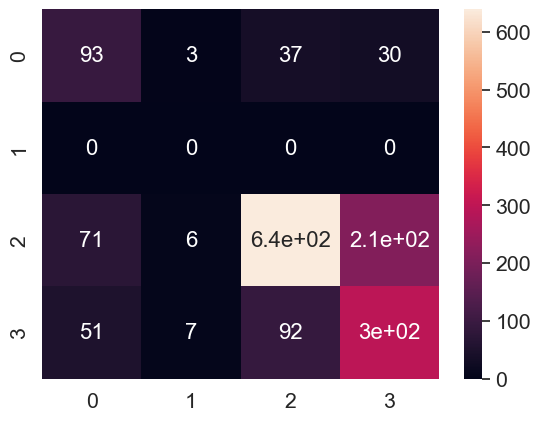

In [17]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [18]:
files = []
categories = []

for directory_path in glob.glob('C:/Users/Natalie/Desktop/Project/Alzheimer_s Dataset_1/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename          Category
0     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
1     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
2     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
3     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
4     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
...                                                 ...               ...
1274  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1275  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1276  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1277  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1278  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented

[1279 rows x 2 columns]

In [19]:
df.head()

Filename      Category
0  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
1  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
2  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
3  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
4  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented

In [20]:
df['Category'].value_counts()

NonDemented         640
VeryMildDemented    448
MildDemented        179
ModerateDemented     12
Name: Category, dtype: int64

In [21]:
df.shape

(1279, 2)

In [22]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [23]:
y = le.transform(df['Category'])

In [24]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|          | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 1/1279 [00:00<03:32,  6.03it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 2/1279 [00:00<07:03,  3.02it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 3/1279 [00:00<05:12,  4.09it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 4/1279 [00:00<04:12,  5.06it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 5/1279 [00:01<03:38,  5.83it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 6/1279 [00:01<03:25,  6.21it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 7/1279 [00:01<03:13,  6.56it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 8/1279 [00:01<03:02,  6.97it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 9/1279 [00:01<03:04,  6.88it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 10/1279 [00:01<03:06,  6.81it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 11/1279 [00:01<03:10,  6.66it/s]

1/1 [==============================] - 0s 68ms/step


  1%|          | 12/1279 [00:01<03:04,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 13/1279 [00:02<03:05,  6.83it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 14/1279 [00:02<03:10,  6.65it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 15/1279 [00:02<03:06,  6.78it/s]

1/1 [==============================] - 0s 59ms/step


  1%|▏         | 16/1279 [00:02<03:01,  6.96it/s]

1/1 [==============================] - 0s 54ms/step


  1%|▏         | 17/1279 [00:02<03:00,  6.98it/s]

1/1 [==============================] - 0s 82ms/step


  1%|▏         | 18/1279 [00:02<03:06,  6.78it/s]

1/1 [==============================] - 0s 66ms/step


  1%|▏         | 19/1279 [00:03<03:06,  6.76it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 20/1279 [00:03<03:04,  6.84it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 21/1279 [00:03<03:03,  6.87it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 22/1279 [00:03<03:00,  6.96it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 23/1279 [00:03<03:06,  6.75it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 24/1279 [00:03<02:57,  7.07it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 25/1279 [00:03<03:00,  6.95it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▏         | 26/1279 [00:04<02:59,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 27/1279 [00:04<02:58,  7.03it/s]

1/1 [==============================] - 0s 77ms/step


  2%|▏         | 28/1279 [00:04<03:04,  6.77it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 29/1279 [00:04<03:14,  6.41it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▏         | 30/1279 [00:04<03:15,  6.40it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 31/1279 [00:04<03:16,  6.37it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 32/1279 [00:04<03:06,  6.67it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 33/1279 [00:05<02:57,  7.01it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 34/1279 [00:05<03:03,  6.79it/s]

1/1 [==============================] - 0s 59ms/step


  3%|▎         | 35/1279 [00:05<03:04,  6.74it/s]

1/1 [==============================] - 0s 74ms/step


  3%|▎         | 36/1279 [00:05<03:01,  6.85it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 37/1279 [00:05<03:02,  6.81it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 38/1279 [00:05<03:03,  6.75it/s]

1/1 [==============================] - 0s 57ms/step


  3%|▎         | 39/1279 [00:05<03:00,  6.86it/s]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 40/1279 [00:06<03:02,  6.77it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 41/1279 [00:06<03:16,  6.31it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 42/1279 [00:06<03:09,  6.53it/s]

1/1 [==============================] - 0s 57ms/step


  3%|▎         | 43/1279 [00:06<03:05,  6.66it/s]

1/1 [==============================] - 0s 62ms/step


  3%|▎         | 44/1279 [00:06<03:02,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▎         | 45/1279 [00:06<03:02,  6.75it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▎         | 46/1279 [00:07<03:06,  6.61it/s]

1/1 [==============================] - 0s 59ms/step


  4%|▎         | 47/1279 [00:07<03:09,  6.49it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 48/1279 [00:07<02:58,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 49/1279 [00:07<02:59,  6.86it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 50/1279 [00:07<03:01,  6.77it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 51/1279 [00:07<03:01,  6.76it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 52/1279 [00:07<02:56,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


  4%|▍         | 53/1279 [00:08<02:58,  6.88it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 54/1279 [00:08<03:02,  6.71it/s]

1/1 [==============================] - 0s 67ms/step


  4%|▍         | 55/1279 [00:08<03:00,  6.79it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 56/1279 [00:08<03:00,  6.76it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 57/1279 [00:08<03:03,  6.67it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▍         | 58/1279 [00:08<03:01,  6.72it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▍         | 59/1279 [00:08<02:57,  6.88it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▍         | 60/1279 [00:09<02:57,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


  5%|▍         | 61/1279 [00:09<02:54,  6.99it/s]

1/1 [==============================] - 0s 65ms/step


  5%|▍         | 62/1279 [00:09<02:52,  7.05it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▍         | 63/1279 [00:09<02:56,  6.90it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▌         | 64/1279 [00:09<02:57,  6.84it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▌         | 65/1279 [00:09<03:02,  6.65it/s]

1/1 [==============================] - 0s 86ms/step


  5%|▌         | 66/1279 [00:09<03:05,  6.54it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▌         | 67/1279 [00:10<03:00,  6.70it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 68/1279 [00:10<02:45,  7.30it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▌         | 69/1279 [00:10<02:44,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


  5%|▌         | 70/1279 [00:10<02:39,  7.56it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 71/1279 [00:10<02:40,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 72/1279 [00:10<02:31,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 73/1279 [00:10<02:31,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 74/1279 [00:10<02:31,  7.97it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 75/1279 [00:11<02:27,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 76/1279 [00:11<02:34,  7.77it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▌         | 77/1279 [00:11<02:35,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 78/1279 [00:11<02:37,  7.62it/s]

1/1 [==============================] - 0s 68ms/step


  6%|▌         | 79/1279 [00:11<02:38,  7.59it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▋         | 80/1279 [00:11<02:38,  7.58it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▋         | 81/1279 [00:11<02:38,  7.57it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▋         | 82/1279 [00:12<02:41,  7.39it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 83/1279 [00:12<02:44,  7.29it/s]

1/1 [==============================] - 0s 65ms/step


  7%|▋         | 84/1279 [00:12<02:39,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


  7%|▋         | 85/1279 [00:12<02:39,  7.46it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 86/1279 [00:12<02:38,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 87/1279 [00:12<02:36,  7.60it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 88/1279 [00:12<02:33,  7.74it/s]

1/1 [==============================] - 0s 65ms/step


  7%|▋         | 89/1279 [00:12<02:34,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 90/1279 [00:13<02:35,  7.63it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 91/1279 [00:13<02:36,  7.59it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 92/1279 [00:13<02:30,  7.87it/s]

1/1 [==============================] - 0s 71ms/step


  7%|▋         | 93/1279 [00:13<02:30,  7.86it/s]

1/1 [==============================] - 0s 68ms/step


  7%|▋         | 94/1279 [00:13<02:29,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 95/1279 [00:13<02:24,  8.17it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 96/1279 [00:13<02:27,  8.03it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 97/1279 [00:13<02:30,  7.87it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 98/1279 [00:14<02:34,  7.65it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 99/1279 [00:14<02:31,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 100/1279 [00:14<02:35,  7.57it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 101/1279 [00:14<02:38,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 102/1279 [00:14<02:38,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 103/1279 [00:14<02:40,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 104/1279 [00:14<02:37,  7.46it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 105/1279 [00:15<02:33,  7.65it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 106/1279 [00:15<02:30,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 107/1279 [00:15<02:37,  7.46it/s]

1/1 [==============================] - 0s 61ms/step


  8%|▊         | 108/1279 [00:15<02:38,  7.39it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 109/1279 [00:15<02:34,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▊         | 110/1279 [00:15<02:37,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▊         | 111/1279 [00:15<02:32,  7.65it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 112/1279 [00:15<02:33,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 113/1279 [00:16<02:33,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 114/1279 [00:16<02:36,  7.47it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 115/1279 [00:16<02:33,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 116/1279 [00:16<02:33,  7.59it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 117/1279 [00:16<02:29,  7.79it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 118/1279 [00:16<02:33,  7.58it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 119/1279 [00:16<02:35,  7.44it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 120/1279 [00:17<02:35,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 121/1279 [00:17<02:32,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 122/1279 [00:17<02:33,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 123/1279 [00:17<02:30,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 124/1279 [00:17<02:30,  7.69it/s]

1/1 [==============================] - 0s 74ms/step


 10%|▉         | 125/1279 [00:17<02:52,  6.69it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 126/1279 [00:17<02:47,  6.89it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 127/1279 [00:18<02:39,  7.21it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 128/1279 [00:18<02:42,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 10%|█         | 129/1279 [00:18<02:40,  7.14it/s]

1/1 [==============================] - 0s 97ms/step


 10%|█         | 130/1279 [00:18<02:51,  6.71it/s]

1/1 [==============================] - 0s 75ms/step


 10%|█         | 131/1279 [00:18<02:55,  6.53it/s]

1/1 [==============================] - 0s 58ms/step


 10%|█         | 132/1279 [00:18<02:57,  6.45it/s]

1/1 [==============================] - 0s 66ms/step


 10%|█         | 133/1279 [00:18<02:58,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 134/1279 [00:19<03:04,  6.21it/s]

1/1 [==============================] - 0s 66ms/step


 11%|█         | 135/1279 [00:19<03:13,  5.92it/s]

1/1 [==============================] - 0s 66ms/step


 11%|█         | 136/1279 [00:19<03:14,  5.87it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 137/1279 [00:19<03:13,  5.91it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 138/1279 [00:19<03:06,  6.12it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█         | 139/1279 [00:19<02:58,  6.38it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 140/1279 [00:20<02:53,  6.58it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 141/1279 [00:20<02:43,  6.95it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 142/1279 [00:20<02:42,  7.00it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 143/1279 [00:20<02:41,  7.03it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█▏        | 144/1279 [00:20<02:38,  7.14it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█▏        | 145/1279 [00:20<02:31,  7.50it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█▏        | 146/1279 [00:20<02:41,  7.02it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█▏        | 147/1279 [00:21<02:39,  7.10it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 148/1279 [00:21<02:33,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 149/1279 [00:21<02:37,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 150/1279 [00:21<02:38,  7.12it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 151/1279 [00:21<02:38,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 152/1279 [00:21<02:39,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 153/1279 [00:21<02:47,  6.71it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 154/1279 [00:22<02:45,  6.80it/s]

1/1 [==============================] - 0s 65ms/step


 12%|█▏        | 155/1279 [00:22<02:50,  6.58it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 156/1279 [00:22<02:47,  6.70it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 157/1279 [00:22<02:44,  6.81it/s]

1/1 [==============================] - 0s 81ms/step


 12%|█▏        | 158/1279 [00:22<02:42,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 159/1279 [00:22<02:37,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 160/1279 [00:22<02:40,  6.99it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 161/1279 [00:23<02:34,  7.24it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 162/1279 [00:23<02:37,  7.07it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 163/1279 [00:23<02:37,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 164/1279 [00:23<02:43,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 165/1279 [00:23<02:36,  7.14it/s]

1/1 [==============================] - 0s 68ms/step


 13%|█▎        | 166/1279 [00:23<02:31,  7.35it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 167/1279 [00:23<02:30,  7.40it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█▎        | 168/1279 [00:24<02:35,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 169/1279 [00:24<02:33,  7.25it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 170/1279 [00:24<02:31,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 171/1279 [00:24<02:30,  7.37it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█▎        | 172/1279 [00:24<02:34,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▎        | 173/1279 [00:24<02:36,  7.05it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 174/1279 [00:24<02:41,  6.86it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 175/1279 [00:25<02:40,  6.89it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▍        | 176/1279 [00:25<02:39,  6.93it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 177/1279 [00:25<02:33,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 178/1279 [00:25<02:37,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 179/1279 [00:25<02:30,  7.33it/s]

1/1 [==============================] - 0s 83ms/step


 14%|█▍        | 180/1279 [00:25<02:36,  7.02it/s]

1/1 [==============================] - 0s 59ms/step


 14%|█▍        | 181/1279 [00:25<02:34,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 182/1279 [00:26<02:39,  6.88it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 183/1279 [00:26<02:37,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 184/1279 [00:26<02:36,  6.99it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 185/1279 [00:26<02:30,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▍        | 186/1279 [00:26<02:32,  7.18it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▍        | 187/1279 [00:26<02:30,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▍        | 188/1279 [00:26<02:27,  7.37it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▍        | 189/1279 [00:26<02:24,  7.53it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▍        | 190/1279 [00:27<02:32,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 191/1279 [00:27<02:27,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 15%|█▌        | 192/1279 [00:27<02:29,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▌        | 193/1279 [00:27<02:28,  7.32it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▌        | 194/1279 [00:27<02:29,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 195/1279 [00:27<02:22,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▌        | 196/1279 [00:27<02:21,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 197/1279 [00:28<02:21,  7.65it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 198/1279 [00:28<02:21,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 199/1279 [00:28<02:25,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 200/1279 [00:28<02:27,  7.30it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 201/1279 [00:28<02:34,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 202/1279 [00:28<02:36,  6.90it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 203/1279 [00:28<02:33,  7.02it/s]

1/1 [==============================] - 0s 65ms/step


 16%|█▌        | 204/1279 [00:29<02:40,  6.70it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 205/1279 [00:29<02:35,  6.91it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▌        | 206/1279 [00:29<02:38,  6.75it/s]

1/1 [==============================] - 0s 112ms/step


 16%|█▌        | 207/1279 [00:29<03:10,  5.62it/s]

1/1 [==============================] - 0s 85ms/step


 16%|█▋        | 208/1279 [00:29<03:12,  5.56it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▋        | 209/1279 [00:29<03:12,  5.56it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█▋        | 210/1279 [00:30<03:10,  5.62it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▋        | 211/1279 [00:30<03:07,  5.69it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 212/1279 [00:30<03:00,  5.91it/s]

1/1 [==============================] - 0s 63ms/step


 17%|█▋        | 213/1279 [00:30<02:51,  6.23it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 214/1279 [00:30<02:45,  6.43it/s]

1/1 [==============================] - 0s 65ms/step


 17%|█▋        | 215/1279 [00:30<02:47,  6.35it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 216/1279 [00:31<02:42,  6.55it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 217/1279 [00:31<02:47,  6.35it/s]

1/1 [==============================] - 0s 61ms/step


 17%|█▋        | 218/1279 [00:31<02:46,  6.36it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 219/1279 [00:31<02:40,  6.60it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 220/1279 [00:31<02:41,  6.55it/s]

1/1 [==============================] - 0s 71ms/step


 17%|█▋        | 221/1279 [00:31<02:37,  6.72it/s]

1/1 [==============================] - 0s 83ms/step


 17%|█▋        | 222/1279 [00:31<02:40,  6.57it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 223/1279 [00:32<02:38,  6.66it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 224/1279 [00:32<02:42,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 225/1279 [00:32<02:40,  6.57it/s]

1/1 [==============================] - 0s 73ms/step


 18%|█▊        | 226/1279 [00:32<02:46,  6.33it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 227/1279 [00:32<02:49,  6.20it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 228/1279 [00:32<02:52,  6.09it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 229/1279 [00:33<02:48,  6.25it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 230/1279 [00:33<02:42,  6.47it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 231/1279 [00:33<02:40,  6.53it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 232/1279 [00:33<02:36,  6.68it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 233/1279 [00:33<02:41,  6.47it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 234/1279 [00:33<02:40,  6.51it/s]

1/1 [==============================] - 0s 62ms/step


 18%|█▊        | 235/1279 [00:33<02:41,  6.47it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 236/1279 [00:34<02:45,  6.31it/s]

1/1 [==============================] - 0s 68ms/step


 19%|█▊        | 237/1279 [00:34<02:40,  6.49it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▊        | 238/1279 [00:34<02:44,  6.34it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▊        | 239/1279 [00:34<02:43,  6.35it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 240/1279 [00:34<02:38,  6.54it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 241/1279 [00:34<02:35,  6.69it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▉        | 242/1279 [00:35<02:40,  6.47it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▉        | 243/1279 [00:35<02:42,  6.39it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 244/1279 [00:35<02:41,  6.41it/s]

1/1 [==============================] - 0s 72ms/step


 19%|█▉        | 245/1279 [00:35<02:43,  6.31it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 246/1279 [00:35<02:40,  6.44it/s]

1/1 [==============================] - 0s 68ms/step


 19%|█▉        | 247/1279 [00:35<02:38,  6.52it/s]

1/1 [==============================] - 0s 83ms/step


 19%|█▉        | 248/1279 [00:36<02:39,  6.47it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 249/1279 [00:36<02:38,  6.52it/s]

1/1 [==============================] - 0s 76ms/step


 20%|█▉        | 250/1279 [00:36<02:42,  6.34it/s]

1/1 [==============================] - 0s 63ms/step


 20%|█▉        | 251/1279 [00:36<02:39,  6.45it/s]

1/1 [==============================] - 0s 92ms/step


 20%|█▉        | 252/1279 [00:36<02:43,  6.30it/s]

1/1 [==============================] - 0s 81ms/step


 20%|█▉        | 253/1279 [00:36<02:42,  6.32it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 254/1279 [00:36<02:47,  6.12it/s]

1/1 [==============================] - 0s 73ms/step


 20%|█▉        | 255/1279 [00:37<02:42,  6.29it/s]

1/1 [==============================] - 0s 68ms/step


 20%|██        | 256/1279 [00:37<02:48,  6.08it/s]

1/1 [==============================] - 0s 67ms/step


 20%|██        | 257/1279 [00:37<02:43,  6.26it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 258/1279 [00:37<02:45,  6.18it/s]

1/1 [==============================] - 0s 70ms/step


 20%|██        | 259/1279 [00:37<02:39,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 260/1279 [00:37<02:34,  6.60it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 261/1279 [00:38<02:33,  6.63it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 262/1279 [00:38<02:30,  6.76it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 263/1279 [00:38<02:36,  6.49it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 264/1279 [00:38<02:29,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 265/1279 [00:38<02:29,  6.80it/s]

1/1 [==============================] - 0s 83ms/step


 21%|██        | 266/1279 [00:38<02:31,  6.70it/s]

1/1 [==============================] - 0s 73ms/step


 21%|██        | 267/1279 [00:38<02:35,  6.50it/s]

1/1 [==============================] - 0s 68ms/step


 21%|██        | 268/1279 [00:39<02:31,  6.65it/s]

1/1 [==============================] - 0s 71ms/step


 21%|██        | 269/1279 [00:39<02:30,  6.71it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██        | 270/1279 [00:39<02:30,  6.71it/s]

1/1 [==============================] - 0s 71ms/step


 21%|██        | 271/1279 [00:39<02:31,  6.64it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██▏       | 272/1279 [00:39<02:40,  6.27it/s]

1/1 [==============================] - 0s 52ms/step


 21%|██▏       | 273/1279 [00:39<02:35,  6.49it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██▏       | 274/1279 [00:39<02:28,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 275/1279 [00:40<02:25,  6.89it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 276/1279 [00:40<02:27,  6.80it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 277/1279 [00:40<02:25,  6.89it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 278/1279 [00:40<02:22,  7.04it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 279/1279 [00:40<02:19,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 280/1279 [00:40<02:23,  6.98it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 281/1279 [00:40<02:24,  6.90it/s]

1/1 [==============================] - 0s 67ms/step


 22%|██▏       | 282/1279 [00:41<02:24,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▏       | 283/1279 [00:41<02:25,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 284/1279 [00:41<02:24,  6.90it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 285/1279 [00:41<02:25,  6.81it/s]

1/1 [==============================] - 0s 67ms/step


 22%|██▏       | 286/1279 [00:41<02:26,  6.78it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 287/1279 [00:41<02:22,  6.98it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 288/1279 [00:42<02:23,  6.90it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 289/1279 [00:42<02:22,  6.92it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 290/1279 [00:42<02:28,  6.67it/s]

1/1 [==============================] - 0s 76ms/step


 23%|██▎       | 291/1279 [00:42<02:28,  6.65it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 292/1279 [00:42<02:29,  6.58it/s]

1/1 [==============================] - 0s 67ms/step


 23%|██▎       | 293/1279 [00:42<02:27,  6.68it/s]

1/1 [==============================] - 0s 59ms/step


 23%|██▎       | 294/1279 [00:42<02:22,  6.91it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 295/1279 [00:43<02:17,  7.14it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 296/1279 [00:43<02:08,  7.64it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 297/1279 [00:43<02:08,  7.63it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 298/1279 [00:43<02:10,  7.52it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 299/1279 [00:43<02:04,  7.88it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 300/1279 [00:43<02:07,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▎       | 301/1279 [00:43<02:07,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▎       | 302/1279 [00:43<02:05,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▎       | 303/1279 [00:44<02:07,  7.66it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 304/1279 [00:44<02:05,  7.79it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 305/1279 [00:44<02:09,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 306/1279 [00:44<02:08,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 307/1279 [00:44<02:06,  7.67it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▍       | 308/1279 [00:44<02:09,  7.49it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 309/1279 [00:44<02:07,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▍       | 310/1279 [00:44<02:08,  7.57it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 311/1279 [00:45<02:10,  7.41it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 312/1279 [00:45<02:14,  7.18it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▍       | 313/1279 [00:45<02:22,  6.78it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▍       | 314/1279 [00:45<02:23,  6.73it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 315/1279 [00:45<02:20,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▍       | 316/1279 [00:45<02:24,  6.66it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 317/1279 [00:46<02:24,  6.67it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▍       | 318/1279 [00:46<02:15,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▍       | 319/1279 [00:46<02:17,  7.00it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▌       | 320/1279 [00:46<03:26,  4.65it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 321/1279 [00:46<03:07,  5.11it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 322/1279 [00:46<02:54,  5.50it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 323/1279 [00:47<02:35,  6.17it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 324/1279 [00:47<02:28,  6.45it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 325/1279 [00:47<02:19,  6.83it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 326/1279 [00:47<02:28,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 327/1279 [00:47<02:28,  6.40it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 328/1279 [00:47<02:18,  6.89it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 329/1279 [00:47<02:18,  6.87it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 330/1279 [00:48<02:07,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 331/1279 [00:48<02:09,  7.31it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 332/1279 [00:48<02:15,  6.99it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 333/1279 [00:48<02:13,  7.11it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▌       | 334/1279 [00:48<02:15,  6.99it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██▌       | 335/1279 [00:48<02:17,  6.87it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▋       | 336/1279 [00:48<02:09,  7.31it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▋       | 337/1279 [00:49<02:10,  7.22it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▋       | 338/1279 [00:49<02:11,  7.16it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 339/1279 [00:49<02:13,  7.03it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 340/1279 [00:49<02:13,  7.03it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 341/1279 [00:49<02:12,  7.06it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 342/1279 [00:49<02:16,  6.88it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██▋       | 343/1279 [00:49<02:19,  6.72it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 344/1279 [00:50<02:19,  6.69it/s]

1/1 [==============================] - 0s 71ms/step


 27%|██▋       | 345/1279 [00:50<02:19,  6.68it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 346/1279 [00:50<02:20,  6.63it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 347/1279 [00:50<02:17,  6.77it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 348/1279 [00:50<02:15,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 349/1279 [00:50<02:12,  7.03it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 350/1279 [00:50<02:11,  7.05it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 351/1279 [00:51<02:09,  7.15it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 352/1279 [00:51<02:13,  6.95it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 353/1279 [00:51<02:15,  6.83it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 354/1279 [00:51<02:14,  6.87it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 355/1279 [00:51<02:12,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 356/1279 [00:51<02:06,  7.32it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 357/1279 [00:51<02:09,  7.10it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 358/1279 [00:52<02:11,  6.98it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 359/1279 [00:52<02:11,  7.00it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 360/1279 [00:52<02:10,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 361/1279 [00:52<02:11,  6.97it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 362/1279 [00:52<02:12,  6.92it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 363/1279 [00:52<02:13,  6.85it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 364/1279 [00:52<02:11,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▊       | 365/1279 [00:53<02:16,  6.68it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▊       | 366/1279 [00:53<02:11,  6.95it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▊       | 367/1279 [00:53<02:06,  7.19it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 368/1279 [00:53<02:09,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 369/1279 [00:53<02:07,  7.16it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 370/1279 [00:53<02:07,  7.14it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 371/1279 [00:53<02:10,  6.98it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 372/1279 [00:54<02:09,  6.99it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 373/1279 [00:54<02:09,  6.99it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 374/1279 [00:54<02:08,  7.04it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▉       | 375/1279 [00:54<02:10,  6.92it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 376/1279 [00:54<02:14,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 377/1279 [00:54<02:07,  7.05it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 378/1279 [00:54<02:05,  7.18it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 379/1279 [00:55<02:07,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 380/1279 [00:55<02:03,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 381/1279 [00:55<02:08,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 382/1279 [00:55<02:05,  7.16it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 383/1279 [00:55<02:04,  7.22it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 384/1279 [00:55<02:00,  7.45it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 385/1279 [00:55<02:02,  7.30it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 386/1279 [00:56<02:01,  7.36it/s]

1/1 [==============================] - 0s 68ms/step


 30%|███       | 387/1279 [00:56<02:00,  7.37it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 388/1279 [00:56<02:06,  7.05it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███       | 389/1279 [00:56<02:11,  6.78it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 390/1279 [00:56<02:06,  7.01it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 391/1279 [00:56<02:08,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 392/1279 [00:56<02:07,  6.97it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 393/1279 [00:57<02:06,  7.01it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 394/1279 [00:57<02:02,  7.23it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 395/1279 [00:57<02:05,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 396/1279 [00:57<02:09,  6.84it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███       | 397/1279 [00:57<02:04,  7.09it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███       | 398/1279 [00:57<02:10,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 399/1279 [00:57<02:07,  6.92it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███▏      | 400/1279 [00:58<02:08,  6.85it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███▏      | 401/1279 [00:58<02:04,  7.06it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███▏      | 402/1279 [00:58<02:00,  7.30it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 403/1279 [00:58<01:56,  7.50it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 404/1279 [00:58<01:58,  7.39it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 405/1279 [00:58<01:58,  7.39it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▏      | 406/1279 [00:58<01:59,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 407/1279 [00:59<01:56,  7.47it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 408/1279 [00:59<01:58,  7.32it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 409/1279 [00:59<02:00,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 410/1279 [00:59<02:02,  7.09it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 411/1279 [00:59<01:58,  7.30it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 412/1279 [00:59<02:02,  7.11it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 413/1279 [00:59<01:57,  7.36it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 414/1279 [00:59<01:57,  7.39it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 415/1279 [01:00<01:54,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 416/1279 [01:00<01:55,  7.50it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 417/1279 [01:00<01:54,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 418/1279 [01:00<01:54,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 419/1279 [01:00<01:52,  7.67it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 420/1279 [01:00<01:53,  7.60it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 421/1279 [01:00<01:51,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 422/1279 [01:01<01:51,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 423/1279 [01:01<01:50,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 424/1279 [01:01<01:47,  7.98it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 425/1279 [01:01<01:49,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 426/1279 [01:01<01:51,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 427/1279 [01:01<01:55,  7.38it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 428/1279 [01:01<01:52,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 429/1279 [01:01<01:52,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 430/1279 [01:02<01:52,  7.53it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▎      | 431/1279 [01:02<01:50,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 432/1279 [01:02<01:50,  7.63it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 433/1279 [01:02<01:49,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 434/1279 [01:02<01:52,  7.48it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 435/1279 [01:02<01:54,  7.36it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 436/1279 [01:02<01:51,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 437/1279 [01:03<01:54,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 438/1279 [01:03<01:49,  7.69it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 439/1279 [01:03<01:51,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 440/1279 [01:03<01:50,  7.62it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 441/1279 [01:03<01:52,  7.45it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 442/1279 [01:03<01:47,  7.76it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 443/1279 [01:03<01:49,  7.66it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 444/1279 [01:03<01:47,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 445/1279 [01:04<01:42,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 446/1279 [01:04<01:39,  8.41it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▍      | 447/1279 [01:04<01:44,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 448/1279 [01:04<01:45,  7.90it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 449/1279 [01:04<01:42,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 450/1279 [01:04<01:40,  8.24it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▌      | 451/1279 [01:04<01:49,  7.56it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▌      | 452/1279 [01:04<01:47,  7.70it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 453/1279 [01:05<01:47,  7.66it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▌      | 454/1279 [01:05<01:48,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 455/1279 [01:05<01:48,  7.57it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 456/1279 [01:05<01:51,  7.36it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 457/1279 [01:05<01:50,  7.42it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▌      | 458/1279 [01:05<02:10,  6.29it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 459/1279 [01:05<02:05,  6.51it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 460/1279 [01:06<02:01,  6.76it/s]

1/1 [==============================] - 0s 115ms/step


 36%|███▌      | 461/1279 [01:06<02:17,  5.93it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 462/1279 [01:06<02:24,  5.66it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 463/1279 [01:06<02:18,  5.87it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▋      | 464/1279 [01:06<02:08,  6.36it/s]

1/1 [==============================] - 0s 75ms/step


 36%|███▋      | 465/1279 [01:06<02:05,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▋      | 466/1279 [01:07<01:56,  6.96it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 467/1279 [01:07<01:54,  7.12it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 468/1279 [01:07<01:47,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 469/1279 [01:07<01:43,  7.80it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 470/1279 [01:07<01:43,  7.81it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 471/1279 [01:07<01:38,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 472/1279 [01:07<01:39,  8.13it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 473/1279 [01:07<01:37,  8.27it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 474/1279 [01:08<01:36,  8.32it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 475/1279 [01:08<01:37,  8.23it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 476/1279 [01:08<01:38,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 477/1279 [01:08<01:38,  8.12it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 478/1279 [01:08<01:37,  8.21it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 479/1279 [01:08<01:38,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 480/1279 [01:08<01:40,  7.96it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 481/1279 [01:08<01:39,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 482/1279 [01:08<01:37,  8.14it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 483/1279 [01:09<01:36,  8.27it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 484/1279 [01:09<01:36,  8.20it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 485/1279 [01:09<01:37,  8.14it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 486/1279 [01:09<01:37,  8.10it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 487/1279 [01:09<01:38,  8.05it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 488/1279 [01:09<01:40,  7.89it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 489/1279 [01:09<01:37,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 490/1279 [01:09<01:35,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 491/1279 [01:10<01:36,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 492/1279 [01:10<01:37,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 493/1279 [01:10<01:37,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 494/1279 [01:10<01:35,  8.24it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 495/1279 [01:10<01:34,  8.33it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 496/1279 [01:10<01:33,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 497/1279 [01:10<01:34,  8.26it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 498/1279 [01:10<01:35,  8.19it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 499/1279 [01:11<01:33,  8.30it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 500/1279 [01:11<01:35,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 501/1279 [01:11<01:35,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 502/1279 [01:11<01:35,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 503/1279 [01:11<01:38,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 504/1279 [01:11<01:35,  8.07it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 505/1279 [01:11<01:36,  8.06it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 506/1279 [01:11<01:37,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 507/1279 [01:12<01:35,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 508/1279 [01:12<01:33,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 509/1279 [01:12<01:32,  8.30it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 510/1279 [01:12<01:31,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 511/1279 [01:12<01:30,  8.45it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 512/1279 [01:12<01:32,  8.31it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 513/1279 [01:12<01:31,  8.37it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 514/1279 [01:12<01:32,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 515/1279 [01:13<01:29,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 516/1279 [01:13<01:29,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 517/1279 [01:13<01:29,  8.55it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 518/1279 [01:13<01:32,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 519/1279 [01:13<01:29,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 520/1279 [01:13<01:29,  8.47it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 521/1279 [01:13<01:29,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 522/1279 [01:13<01:26,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 523/1279 [01:13<01:23,  9.06it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 524/1279 [01:14<01:24,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 525/1279 [01:14<01:23,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 527/1279 [01:14<01:19,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 528/1279 [01:14<01:21,  9.24it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 529/1279 [01:14<01:22,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 530/1279 [01:14<01:22,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 531/1279 [01:14<01:22,  9.09it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 532/1279 [01:14<01:21,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 533/1279 [01:15<01:23,  8.95it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▏     | 534/1279 [01:15<01:41,  7.33it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 535/1279 [01:15<01:58,  6.29it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 536/1279 [01:15<02:01,  6.13it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▏     | 537/1279 [01:15<01:56,  6.38it/s]

1/1 [==============================] - 0s 117ms/step


 42%|████▏     | 538/1279 [01:15<02:03,  6.00it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 539/1279 [01:16<01:58,  6.22it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 540/1279 [01:16<01:49,  6.76it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 541/1279 [01:16<01:46,  6.93it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 542/1279 [01:16<01:43,  7.10it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 543/1279 [01:16<01:44,  7.04it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 544/1279 [01:16<01:47,  6.86it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 545/1279 [01:16<01:51,  6.56it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 546/1279 [01:17<01:51,  6.57it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 547/1279 [01:17<01:49,  6.68it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 548/1279 [01:17<01:46,  6.87it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 549/1279 [01:17<01:40,  7.25it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 550/1279 [01:17<01:36,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 551/1279 [01:17<01:33,  7.76it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 552/1279 [01:17<01:31,  7.92it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 553/1279 [01:17<01:30,  8.05it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 554/1279 [01:18<01:27,  8.29it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 555/1279 [01:18<01:27,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 556/1279 [01:18<01:26,  8.31it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 557/1279 [01:18<01:27,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 558/1279 [01:18<01:27,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 559/1279 [01:18<01:37,  7.41it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 560/1279 [01:18<01:40,  7.18it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 561/1279 [01:19<01:37,  7.36it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 562/1279 [01:19<01:39,  7.23it/s]

1/1 [==============================] - 0s 72ms/step


 44%|████▍     | 563/1279 [01:19<01:36,  7.39it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 564/1279 [01:19<01:38,  7.25it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████▍     | 565/1279 [01:19<01:38,  7.28it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 566/1279 [01:19<01:41,  7.06it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 567/1279 [01:19<01:37,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 568/1279 [01:19<01:30,  7.88it/s]

1/1 [==============================] - 0s 173ms/step


 44%|████▍     | 569/1279 [05:30<14:50:25, 75.25s/it]

1/1 [==============================] - 0s 112ms/step


 45%|████▍     | 570/1279 [05:30<10:23:14, 52.74s/it]

1/1 [==============================] - 0s 110ms/step


 45%|████▍     | 571/1279 [05:30<7:16:20, 36.98s/it] 

1/1 [==============================] - 0s 66ms/step


 45%|████▍     | 572/1279 [05:31<5:05:45, 25.95s/it]

1/1 [==============================] - 0s 89ms/step


 45%|████▍     | 573/1279 [05:31<3:34:27, 18.23s/it]

1/1 [==============================] - 0s 87ms/step


 45%|████▍     | 574/1279 [05:31<2:30:50, 12.84s/it]

1/1 [==============================] - 0s 265ms/step


 45%|████▍     | 575/1279 [05:32<1:46:58,  9.12s/it]

1/1 [==============================] - 0s 174ms/step


 45%|████▌     | 576/1279 [05:32<1:16:07,  6.50s/it]

1/1 [==============================] - 0s 136ms/step


 45%|████▌     | 577/1279 [05:32<54:09,  4.63s/it]  

1/1 [==============================] - 0s 65ms/step


 45%|████▌     | 578/1279 [05:32<38:39,  3.31s/it]

1/1 [==============================] - 0s 101ms/step


 45%|████▌     | 579/1279 [05:33<27:47,  2.38s/it]

1/1 [==============================] - 0s 118ms/step


 45%|████▌     | 580/1279 [05:33<20:13,  1.74s/it]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 581/1279 [05:33<14:55,  1.28s/it]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 582/1279 [05:33<11:08,  1.04it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 583/1279 [05:34<08:31,  1.36it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▌     | 584/1279 [05:34<06:34,  1.76it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 585/1279 [05:34<05:08,  2.25it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 586/1279 [05:34<04:12,  2.75it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 587/1279 [05:34<03:36,  3.20it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 588/1279 [05:34<03:08,  3.66it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▌     | 589/1279 [05:35<02:51,  4.02it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 590/1279 [05:35<02:44,  4.18it/s]

1/1 [==============================] - 0s 112ms/step


 46%|████▌     | 591/1279 [05:35<02:43,  4.22it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▋     | 592/1279 [05:35<02:35,  4.43it/s]

1/1 [==============================] - 0s 133ms/step


 46%|████▋     | 593/1279 [05:35<02:42,  4.23it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▋     | 594/1279 [05:36<02:28,  4.60it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 595/1279 [05:36<02:14,  5.07it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 596/1279 [05:36<02:09,  5.28it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 597/1279 [05:36<02:03,  5.54it/s]

1/1 [==============================] - 0s 68ms/step


 47%|████▋     | 598/1279 [05:36<01:57,  5.81it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 599/1279 [05:36<01:59,  5.70it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 600/1279 [05:37<01:58,  5.71it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 601/1279 [05:37<01:57,  5.78it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 602/1279 [05:37<01:48,  6.26it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 603/1279 [05:37<01:39,  6.77it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 604/1279 [05:37<01:40,  6.71it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 605/1279 [05:37<01:42,  6.55it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 606/1279 [05:38<01:38,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 607/1279 [05:38<01:36,  6.94it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 608/1279 [05:38<01:35,  7.02it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 609/1279 [05:38<01:35,  6.99it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 610/1279 [05:38<01:35,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 611/1279 [05:38<01:34,  7.03it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 612/1279 [05:38<01:38,  6.75it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 613/1279 [05:39<01:36,  6.90it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 614/1279 [05:39<01:37,  6.81it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 615/1279 [05:39<01:34,  7.01it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 616/1279 [05:39<01:39,  6.68it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 617/1279 [05:39<01:34,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 618/1279 [05:39<01:32,  7.18it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 619/1279 [05:39<01:32,  7.13it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 620/1279 [05:40<01:30,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▊     | 621/1279 [05:40<01:29,  7.34it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▊     | 622/1279 [05:40<01:32,  7.09it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▊     | 623/1279 [05:40<01:35,  6.87it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 624/1279 [05:40<01:32,  7.12it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 625/1279 [05:40<01:30,  7.25it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 626/1279 [05:40<01:32,  7.08it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 627/1279 [05:40<01:28,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 628/1279 [05:41<01:23,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 629/1279 [05:41<01:22,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 630/1279 [05:41<01:24,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 631/1279 [05:41<01:24,  7.69it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 632/1279 [05:41<01:26,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 633/1279 [05:41<01:28,  7.31it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 634/1279 [05:41<01:26,  7.44it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 635/1279 [05:42<01:24,  7.66it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 636/1279 [05:42<01:22,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 637/1279 [05:42<01:22,  7.79it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 638/1279 [05:42<01:19,  8.10it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 639/1279 [05:42<01:19,  8.08it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 640/1279 [05:42<01:19,  8.05it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 641/1279 [05:42<01:21,  7.84it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 642/1279 [05:42<01:23,  7.62it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 643/1279 [05:43<01:19,  8.02it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 644/1279 [05:43<01:18,  8.05it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 645/1279 [05:43<01:18,  8.12it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 646/1279 [05:43<01:18,  8.10it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 647/1279 [05:43<01:19,  7.96it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 648/1279 [05:43<01:19,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 649/1279 [05:43<01:21,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 650/1279 [05:43<01:21,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 651/1279 [05:44<01:24,  7.43it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 652/1279 [05:44<01:21,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 653/1279 [05:44<01:19,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████     | 654/1279 [05:44<01:18,  7.94it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 655/1279 [05:44<01:20,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 656/1279 [05:44<01:17,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 657/1279 [05:44<01:18,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 658/1279 [05:44<01:18,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 659/1279 [05:45<01:20,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 660/1279 [05:45<01:16,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 661/1279 [05:45<01:19,  7.79it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 662/1279 [05:45<01:19,  7.80it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 663/1279 [05:45<01:18,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 664/1279 [05:45<01:19,  7.78it/s]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 665/1279 [05:45<01:20,  7.62it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 666/1279 [05:45<01:19,  7.73it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 667/1279 [05:46<01:20,  7.58it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 668/1279 [05:46<01:21,  7.50it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 669/1279 [05:46<01:22,  7.39it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 670/1279 [05:46<01:20,  7.57it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 671/1279 [05:46<01:20,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 672/1279 [05:46<01:19,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 673/1279 [05:46<01:21,  7.47it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 674/1279 [05:47<01:20,  7.50it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 675/1279 [05:47<01:20,  7.47it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 676/1279 [05:47<01:23,  7.24it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 677/1279 [05:47<01:25,  7.03it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 678/1279 [05:47<01:20,  7.47it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 679/1279 [05:47<01:19,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 680/1279 [05:47<01:18,  7.60it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 681/1279 [05:47<01:21,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 682/1279 [05:48<01:21,  7.34it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 683/1279 [05:48<01:19,  7.46it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 684/1279 [05:48<01:18,  7.54it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▎    | 685/1279 [05:48<01:19,  7.44it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▎    | 686/1279 [05:48<01:18,  7.52it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 687/1279 [05:48<01:17,  7.66it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 688/1279 [05:48<01:21,  7.26it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 689/1279 [05:49<01:22,  7.15it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 690/1279 [05:49<01:20,  7.35it/s]

1/1 [==============================] - 0s 68ms/step


 54%|█████▍    | 691/1279 [05:49<01:19,  7.41it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 692/1279 [05:49<01:17,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 693/1279 [05:49<01:17,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 694/1279 [05:49<01:16,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 695/1279 [05:49<01:16,  7.63it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 696/1279 [05:49<01:15,  7.71it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 697/1279 [05:50<01:15,  7.73it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 698/1279 [05:50<01:17,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 699/1279 [05:50<01:18,  7.40it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 700/1279 [05:50<01:17,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 701/1279 [05:50<01:18,  7.33it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▍    | 702/1279 [05:50<01:26,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 703/1279 [05:50<01:22,  6.94it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 704/1279 [05:51<01:20,  7.16it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 705/1279 [05:51<01:15,  7.60it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 706/1279 [05:51<01:16,  7.44it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 707/1279 [05:51<01:15,  7.53it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 708/1279 [05:51<01:17,  7.39it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 709/1279 [05:51<01:15,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 710/1279 [05:51<01:12,  7.85it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 711/1279 [05:51<01:13,  7.73it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 712/1279 [05:52<01:14,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 713/1279 [05:52<01:14,  7.59it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 714/1279 [05:52<01:14,  7.58it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 715/1279 [05:52<01:15,  7.44it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 716/1279 [05:52<01:13,  7.68it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 717/1279 [05:52<01:13,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 718/1279 [05:52<01:14,  7.48it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 719/1279 [05:53<01:12,  7.77it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 720/1279 [05:53<01:09,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 721/1279 [05:53<01:10,  7.93it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▋    | 722/1279 [05:53<01:13,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 723/1279 [05:53<01:12,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 724/1279 [05:53<01:10,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 725/1279 [05:53<01:10,  7.82it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 726/1279 [05:53<01:10,  7.88it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 727/1279 [05:54<01:09,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 728/1279 [05:54<01:07,  8.12it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 729/1279 [05:54<01:06,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 730/1279 [05:54<01:05,  8.37it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 731/1279 [05:54<01:05,  8.36it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 732/1279 [05:54<01:04,  8.43it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 733/1279 [05:54<01:03,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 734/1279 [05:54<01:04,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 735/1279 [05:54<01:02,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 736/1279 [05:55<01:02,  8.65it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 737/1279 [05:55<01:02,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 738/1279 [05:55<01:03,  8.48it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 739/1279 [05:55<01:02,  8.58it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 740/1279 [05:55<01:04,  8.42it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 741/1279 [05:55<01:04,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 742/1279 [05:55<01:03,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 743/1279 [05:55<01:03,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 744/1279 [05:56<01:02,  8.52it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 745/1279 [05:56<01:02,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 746/1279 [05:56<01:02,  8.51it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 747/1279 [05:56<01:02,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 748/1279 [05:56<01:02,  8.55it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▊    | 749/1279 [05:56<01:01,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 750/1279 [05:56<01:01,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 751/1279 [05:56<01:00,  8.71it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 752/1279 [05:56<01:00,  8.67it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 753/1279 [05:57<01:00,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 754/1279 [05:57<01:00,  8.70it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 755/1279 [05:57<00:59,  8.77it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 756/1279 [05:57<00:58,  8.95it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 757/1279 [05:57<00:59,  8.76it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 758/1279 [05:57<00:59,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 759/1279 [05:57<00:59,  8.68it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 760/1279 [05:57<01:01,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 761/1279 [05:58<01:01,  8.46it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 762/1279 [05:58<01:00,  8.50it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 763/1279 [05:58<00:59,  8.74it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 764/1279 [05:58<00:58,  8.85it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 765/1279 [05:58<00:57,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 766/1279 [05:58<00:56,  9.07it/s]

1/1 [==============================] - 0s 68ms/step


 60%|█████▉    | 767/1279 [05:58<00:58,  8.73it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 768/1279 [05:58<00:59,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 769/1279 [05:58<00:58,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 770/1279 [05:59<01:00,  8.35it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 771/1279 [05:59<00:58,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 772/1279 [05:59<00:59,  8.53it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 773/1279 [05:59<00:58,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 774/1279 [05:59<00:58,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 775/1279 [05:59<00:57,  8.79it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 776/1279 [05:59<00:59,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 777/1279 [05:59<00:58,  8.63it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 778/1279 [05:59<00:56,  8.81it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 779/1279 [06:00<00:58,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 780/1279 [06:00<00:57,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 781/1279 [06:00<00:57,  8.71it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 782/1279 [06:00<00:57,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 783/1279 [06:00<00:57,  8.63it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████▏   | 784/1279 [06:00<00:59,  8.37it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████▏   | 785/1279 [06:00<00:59,  8.28it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████▏   | 786/1279 [06:00<01:00,  8.11it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 787/1279 [06:01<00:58,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 788/1279 [06:01<00:57,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 789/1279 [06:01<00:55,  8.78it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 790/1279 [06:01<00:58,  8.43it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 791/1279 [06:01<01:01,  7.92it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 792/1279 [06:01<01:03,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 793/1279 [06:01<01:02,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 794/1279 [06:01<01:04,  7.50it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 795/1279 [06:02<01:00,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 796/1279 [06:02<00:58,  8.31it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 797/1279 [06:02<00:59,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 798/1279 [06:02<00:58,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 799/1279 [06:02<00:58,  8.23it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 800/1279 [06:02<00:57,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 801/1279 [06:02<00:56,  8.48it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 802/1279 [06:02<00:56,  8.51it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 803/1279 [06:02<00:55,  8.55it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 804/1279 [06:03<00:55,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 805/1279 [06:03<00:55,  8.58it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 806/1279 [06:03<00:55,  8.50it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 807/1279 [06:03<00:56,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 808/1279 [06:03<00:58,  8.11it/s]

1/1 [==============================] - 0s 72ms/step


 63%|██████▎   | 809/1279 [06:03<00:59,  7.91it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 810/1279 [06:03<00:59,  7.93it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 811/1279 [06:03<00:58,  7.96it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 812/1279 [06:04<01:02,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 813/1279 [06:04<02:08,  3.63it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▎   | 814/1279 [06:04<01:46,  4.37it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 815/1279 [06:04<01:32,  5.02it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 816/1279 [06:05<01:23,  5.56it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 817/1279 [06:05<01:14,  6.22it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 818/1279 [06:05<01:09,  6.67it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 819/1279 [06:05<01:05,  7.02it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 820/1279 [06:05<01:03,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 821/1279 [06:05<01:01,  7.49it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 822/1279 [06:05<00:58,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 823/1279 [06:05<00:57,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 824/1279 [06:06<00:55,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▍   | 825/1279 [06:06<00:53,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 826/1279 [06:06<00:52,  8.60it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▍   | 827/1279 [06:06<00:52,  8.63it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 828/1279 [06:06<00:53,  8.45it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▍   | 829/1279 [06:06<00:53,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 830/1279 [06:06<00:55,  8.03it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 831/1279 [06:06<00:54,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 832/1279 [06:07<00:55,  8.06it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 833/1279 [06:07<00:56,  7.91it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 834/1279 [06:07<00:54,  8.10it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 835/1279 [06:07<00:55,  7.95it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 836/1279 [06:07<00:56,  7.80it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 837/1279 [06:07<00:56,  7.86it/s]

1/1 [==============================] - 0s 72ms/step


 66%|██████▌   | 838/1279 [06:07<00:55,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 839/1279 [06:07<00:55,  7.92it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 840/1279 [06:08<00:55,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▌   | 841/1279 [06:08<00:54,  8.08it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 842/1279 [06:08<00:53,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 843/1279 [06:08<00:51,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 844/1279 [06:08<00:50,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 845/1279 [06:08<00:51,  8.43it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 846/1279 [06:08<00:49,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 847/1279 [06:08<00:48,  8.94it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 848/1279 [06:08<00:50,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▋   | 849/1279 [06:09<00:49,  8.67it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▋   | 850/1279 [06:09<00:49,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 851/1279 [06:09<00:48,  8.77it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 852/1279 [06:09<00:50,  8.52it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 853/1279 [06:09<00:48,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 854/1279 [06:09<00:47,  9.01it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 855/1279 [06:09<00:48,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 856/1279 [06:09<00:46,  9.04it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 857/1279 [06:10<00:47,  8.96it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 858/1279 [06:10<00:47,  8.86it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 859/1279 [06:10<00:48,  8.73it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 860/1279 [06:10<00:48,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 861/1279 [06:10<00:49,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 862/1279 [06:10<00:49,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 863/1279 [06:10<00:48,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 864/1279 [06:10<00:47,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 865/1279 [06:10<00:47,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 866/1279 [06:11<00:48,  8.46it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 867/1279 [06:11<00:48,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 868/1279 [06:11<00:47,  8.71it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 869/1279 [06:11<00:47,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 870/1279 [06:11<00:47,  8.65it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 872/1279 [06:11<00:43,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 873/1279 [06:11<00:43,  9.35it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 874/1279 [06:11<00:43,  9.32it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 875/1279 [06:12<00:46,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 876/1279 [06:12<00:50,  8.02it/s]

1/1 [==============================] - 0s 84ms/step


 69%|██████▊   | 877/1279 [06:12<00:52,  7.61it/s]

1/1 [==============================] - 0s 84ms/step


 69%|██████▊   | 878/1279 [06:12<00:55,  7.18it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▊   | 879/1279 [06:12<00:53,  7.54it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 880/1279 [06:12<00:50,  7.83it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 881/1279 [06:12<00:48,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 882/1279 [06:12<00:46,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 884/1279 [06:13<00:41,  9.57it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 886/1279 [06:13<00:39, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 888/1279 [06:13<00:37, 10.50it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 890/1279 [06:13<00:36, 10.64it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 892/1279 [06:13<00:36, 10.61it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 894/1279 [06:14<00:36, 10.62it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 896/1279 [06:14<00:36, 10.59it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 898/1279 [06:14<00:36, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 900/1279 [06:14<00:35, 10.65it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 902/1279 [06:14<00:35, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 904/1279 [06:15<00:35, 10.66it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 906/1279 [06:15<00:35, 10.62it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 908/1279 [06:15<00:34, 10.71it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 910/1279 [06:15<00:34, 10.64it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 912/1279 [06:15<00:34, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 914/1279 [06:15<00:34, 10.54it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 916/1279 [06:16<00:34, 10.51it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 918/1279 [06:16<00:35, 10.29it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 920/1279 [06:16<00:34, 10.38it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 922/1279 [06:16<00:34, 10.37it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 924/1279 [06:16<00:34, 10.42it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 926/1279 [06:17<00:33, 10.44it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 928/1279 [06:17<00:37,  9.43it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 929/1279 [06:17<00:38,  9.04it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 930/1279 [06:17<00:38,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 931/1279 [06:17<00:38,  9.12it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 932/1279 [06:17<00:39,  8.82it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 933/1279 [06:17<00:38,  8.90it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 934/1279 [06:18<00:38,  8.99it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 935/1279 [06:18<00:37,  9.06it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 937/1279 [06:18<00:35,  9.56it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 938/1279 [06:18<00:35,  9.49it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 940/1279 [06:18<00:34,  9.79it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 942/1279 [06:18<00:33,  9.97it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▎  | 943/1279 [06:18<00:34,  9.86it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 944/1279 [06:19<00:35,  9.57it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 946/1279 [06:19<00:35,  9.44it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 947/1279 [06:19<00:36,  9.14it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 948/1279 [06:19<00:36,  9.00it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 949/1279 [06:19<00:37,  8.91it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 950/1279 [06:19<00:36,  9.08it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 951/1279 [06:19<00:37,  8.71it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 952/1279 [06:19<00:36,  8.92it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 953/1279 [06:20<00:36,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 954/1279 [06:20<00:36,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 955/1279 [06:20<00:37,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 956/1279 [06:20<00:37,  8.65it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▍  | 957/1279 [06:20<00:38,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▍  | 958/1279 [06:20<00:37,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 959/1279 [06:20<00:37,  8.53it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 960/1279 [06:20<00:36,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 961/1279 [06:21<00:35,  9.00it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▌  | 962/1279 [06:21<00:35,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 964/1279 [06:21<00:33,  9.42it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 965/1279 [06:21<00:32,  9.52it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 966/1279 [06:21<00:32,  9.58it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 967/1279 [06:21<00:33,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 969/1279 [06:21<00:32,  9.62it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 970/1279 [06:21<00:32,  9.52it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 971/1279 [06:22<00:33,  9.25it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 972/1279 [06:22<00:33,  9.21it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 973/1279 [06:22<00:35,  8.69it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 974/1279 [06:22<00:35,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 975/1279 [06:22<00:35,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▋  | 976/1279 [06:22<00:34,  8.86it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 977/1279 [06:22<00:34,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▋  | 978/1279 [06:22<00:34,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 979/1279 [06:22<00:33,  8.97it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 980/1279 [06:23<00:32,  9.20it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 981/1279 [06:23<00:32,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 983/1279 [06:23<00:30,  9.55it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 985/1279 [06:23<00:29,  9.94it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 986/1279 [06:23<00:29,  9.84it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 988/1279 [06:23<00:28, 10.04it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 990/1279 [06:24<00:28, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 992/1279 [06:24<00:28, 10.23it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 994/1279 [06:24<00:27, 10.35it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 996/1279 [06:24<00:26, 10.51it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 998/1279 [06:24<00:26, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 1000/1279 [06:25<00:26, 10.64it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 1002/1279 [06:25<00:26, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 1004/1279 [06:25<00:25, 10.64it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▊  | 1006/1279 [06:25<00:25, 10.58it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 1008/1279 [06:25<00:25, 10.55it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 1010/1279 [06:25<00:25, 10.67it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 1012/1279 [06:26<00:24, 10.71it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 1014/1279 [06:26<00:24, 10.77it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 1016/1279 [06:26<00:24, 10.79it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 1018/1279 [06:26<00:24, 10.85it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 1020/1279 [06:26<00:22, 11.35it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 1022/1279 [06:27<00:22, 11.36it/s]

1/1 [==============================] - 0s 72ms/step


 80%|████████  | 1024/1279 [06:27<00:25, 10.03it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 1026/1279 [06:27<00:27,  9.36it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 1027/1279 [06:27<00:27,  9.01it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 1028/1279 [06:27<00:27,  8.97it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 1029/1279 [06:27<00:27,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 1031/1279 [06:28<00:24, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 1033/1279 [06:28<00:21, 11.39it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 1035/1279 [06:28<00:20, 11.81it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 1037/1279 [06:28<00:19, 12.43it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 1039/1279 [06:28<00:19, 12.49it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 1041/1279 [06:28<00:18, 13.17it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 1043/1279 [06:28<00:17, 13.70it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 1045/1279 [06:29<00:16, 14.09it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 1047/1279 [06:29<00:16, 14.06it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 1049/1279 [06:29<00:17, 13.33it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 1051/1279 [06:29<00:17, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 1053/1279 [06:29<00:16, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 1055/1279 [06:29<00:16, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 1057/1279 [06:29<00:15, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 1059/1279 [06:30<00:15, 13.96it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1061/1279 [06:30<00:15, 14.26it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 1063/1279 [06:30<00:15, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 1065/1279 [06:30<00:15, 14.23it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 1067/1279 [06:30<00:15, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 1069/1279 [06:30<00:15, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 1071/1279 [06:30<00:15, 13.84it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1073/1279 [06:31<00:15, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 1075/1279 [06:31<00:15, 13.24it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 1077/1279 [06:31<00:14, 13.73it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 1079/1279 [06:31<00:14, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 1081/1279 [06:31<00:14, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 1083/1279 [06:31<00:14, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 1085/1279 [06:31<00:13, 13.98it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 1087/1279 [06:32<00:13, 14.01it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 1089/1279 [06:32<00:13, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 1091/1279 [06:32<00:13, 14.06it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 1093/1279 [06:32<00:12, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 1095/1279 [06:32<00:13, 13.80it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 1097/1279 [06:32<00:13, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 1099/1279 [06:32<00:12, 14.21it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 1101/1279 [06:33<00:12, 14.46it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 1103/1279 [06:33<00:12, 14.56it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 1105/1279 [06:33<00:11, 14.70it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1107/1279 [06:33<00:12, 13.70it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 1109/1279 [06:33<00:13, 12.94it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1111/1279 [06:33<00:13, 12.66it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1113/1279 [06:33<00:12, 13.05it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 1115/1279 [06:34<00:12, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 1117/1279 [06:34<00:12, 13.27it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1119/1279 [06:34<00:11, 13.54it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 1121/1279 [06:34<00:11, 13.46it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 1123/1279 [06:34<00:11, 13.00it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1125/1279 [06:34<00:12, 12.44it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 1127/1279 [06:35<00:12, 12.32it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 1129/1279 [06:35<00:12, 12.24it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1131/1279 [06:35<00:11, 12.34it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▊ | 1133/1279 [06:35<00:11, 12.19it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▊ | 1135/1279 [06:35<00:11, 12.00it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 1137/1279 [06:35<00:11, 11.99it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 1139/1279 [06:36<00:11, 12.37it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 1141/1279 [06:36<00:10, 12.62it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 1143/1279 [06:36<00:10, 13.04it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 1145/1279 [06:36<00:10, 12.92it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 1147/1279 [06:36<00:10, 13.05it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 1149/1279 [06:36<00:10, 12.92it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 1151/1279 [06:36<00:10, 12.80it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 1153/1279 [06:37<00:10, 12.38it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 1155/1279 [06:37<00:10, 12.27it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 1157/1279 [06:37<00:09, 12.36it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 1159/1279 [06:37<00:09, 12.66it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 1161/1279 [06:37<00:09, 12.63it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 1163/1279 [06:37<00:08, 13.28it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 1165/1279 [06:38<00:08, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 1167/1279 [06:38<00:07, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 1169/1279 [06:38<00:07, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1171/1279 [06:38<00:07, 14.37it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 1173/1279 [06:38<00:07, 14.52it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1175/1279 [06:38<00:07, 14.60it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1177/1279 [06:38<00:06, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 1179/1279 [06:38<00:06, 14.81it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1181/1279 [06:39<00:06, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1183/1279 [06:39<00:06, 14.75it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 1185/1279 [06:39<00:06, 15.04it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1187/1279 [06:39<00:06, 15.03it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 1189/1279 [06:39<00:06, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 1191/1279 [06:39<00:06, 14.64it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 1193/1279 [06:39<00:05, 15.00it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 1195/1279 [06:40<00:05, 15.03it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 1197/1279 [06:40<00:05, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 1199/1279 [06:40<00:05, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 1201/1279 [06:40<00:05, 14.81it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 1203/1279 [06:40<00:05, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 1205/1279 [06:40<00:05, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 1207/1279 [06:40<00:05, 14.39it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 1209/1279 [06:41<00:04, 14.51it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 1211/1279 [06:41<00:04, 14.71it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 1213/1279 [06:41<00:04, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 1215/1279 [06:41<00:04, 14.69it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 1217/1279 [06:41<00:04, 14.51it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 1219/1279 [06:41<00:04, 14.55it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 1221/1279 [06:41<00:03, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1223/1279 [06:41<00:03, 14.97it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1225/1279 [06:42<00:03, 14.99it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 1227/1279 [06:42<00:03, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1229/1279 [06:42<00:03, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1231/1279 [06:42<00:03, 14.54it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 1233/1279 [06:42<00:03, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1235/1279 [06:42<00:02, 14.81it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 1237/1279 [06:42<00:02, 14.82it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1239/1279 [06:43<00:02, 14.90it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1241/1279 [06:43<00:02, 14.93it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 1243/1279 [06:43<00:02, 14.92it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 1245/1279 [06:43<00:02, 14.95it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1247/1279 [06:43<00:02, 14.73it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 1249/1279 [06:43<00:02, 14.74it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 1251/1279 [06:43<00:01, 14.54it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 1253/1279 [06:44<00:01, 14.68it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 1255/1279 [06:44<00:01, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 1257/1279 [06:44<00:01, 14.63it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1259/1279 [06:44<00:01, 14.73it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 1261/1279 [06:44<00:01, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 1263/1279 [06:44<00:01, 15.16it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 1265/1279 [06:44<00:00, 15.15it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 1267/1279 [06:44<00:00, 14.82it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 1269/1279 [06:45<00:00, 14.81it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 1271/1279 [06:45<00:00, 14.86it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 1273/1279 [06:45<00:00, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 1275/1279 [06:45<00:00, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 1277/1279 [06:45<00:00, 14.73it/s]

1/1 [==============================] - 0s 33ms/step


100%|██████████| 1279/1279 [06:45<00:00,  3.15it/s]


In [25]:
x_test = pd.DataFrame(x_test)

In [26]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  504  505  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

         506  507  508  509  510  511  
0   0.000000  0.0  0.0  0.0  0.0  0.0  
1   8.247432  0.0  0.0  0.0  0.0  0.0  
2  18.454372  0.0  0.0  0.0  0.0  0.0  
3   8.135006  0.0  0.0  0.0  0.0  0.0  
4   0.000000  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [27]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_test.shape

(1279, 512)

In [29]:
y_pred = clf.predict(x_test)

In [30]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))

0.5222830336200156
0.261712742731214


In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred, average="macro")
recall = recall_score(y_test,y_pred, average="macro")
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.33682855329524425
Recall:  0.2860646947326417
